# Business case: the based on area to predict the house price  prediction and sales price
**These analyses can provide valuable insights for real estate businesses, property developers, investors, and other stakeholders involved in the housing market. Adjustments and additional analyses may be necessary based on the specific objectives and context of the business.

# import the basic libraries

In [1]:
#import  basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv(r"C:\Users\ssisi\Downloads\PRCP-1020-HousePricePred\Data\data.csv")

# basic checks on data

In [3]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[5 rows x 81 columns]

In [5]:
data.shape

(1460, 81)

In [6]:
data.head(pd.set_option("display.max_columns",None))

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
data.drop("Id",axis=1,inplace=True) # it has a unique values so we need to delete the column

In [9]:
data.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu","MasVnrType"],axis=1,inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [11]:
data.shape

(1460, 74)

In [12]:
data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315   
std      30.202904     20.645407   181.066207   456.098091   161.319273   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000   

         BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
mean    567.240411  1057.429452  1162.626712   346.992466      5.844521   
std     441.866955   438.705324   386.587738   436.528436     48.623081   
min       0.000000     0.000000   334.000000     0.000000      0.000000   
25%     223.000000   795.750000   882.000000     0.000000      0.000000   
50%     477.500000   991.500000  1087.000000     0.000000      0.000000   
75%     808.000000  1298.250000  1391.250000   728.000000      0.000000   
max    2336.000000  6110.000000  4692.000000  2065.000000    572.000000   

         GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath     HalfBath  \
count  1460.000000   1460.000000   1460.000000  1460.000000  1460.000000   
mean   1515.463699      0.425342      0.057534     1.565068     0.382877   
std     525.480383      0.518911      0.238753     0.550916     0.502885   
min     334.000000      0.000000      0.000000     0.000000     0.000000   
25%    1129.500000      0.000000      0.000000     1.000000     0.000000   
50%    1464.000000      0.000000      0.000000     2.000000     0.000000   
75%    1776.750000      1.000000      0.000000     2.000000     1.000000   
max    5642.000000      3.000000      2.000000     3.000000     2.000000   

       BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  GarageYrBlt  \
count   1460.000000   1460.000000   1460.000000  1460.000000  1379.000000   
mean       2.866438      1.046575      6.517808     0.613014  1978.506164   
std        0.815778      0.220338      1.625393     0.644666    24.689725   
min        0.000000      0.000000      2.000000     0.000000  1900.000000   
25%        2.000000      1.000000      5.000000     0.000000  1961.000000   
50%        3.000000      1.000000      6.000000     1.000000  1980.000000   
75%        3.000000      1.000000      7.000000     1.000000  2002.000000   
max        8.000000      3.000000     14.000000     3.000000  2010.000000   

        GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.767123   472.980137    94.244521    46.660274      21.954110   
std       0.747315   213.804841   125.338794    66.256028      61.119149   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       1.000000   334.500000     0.000000     0.000000       0.000000   
50%       2.000000   480.000000     0.000000    25.000000       0.000000   
75%       2.000000   576.000000   168.000000    68.000000   

In [13]:
data.describe(include="O")

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1460   1460     1460        1460      1460      1460      1460   
unique        5      2        4           4         2         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq       1151   1454      925        1311      1459      1052      1382   

       Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
count          1460       1460       1460     1460       1460      1460   
unique           25          9          8        5          8         6   
top           NAmes       Norm       Norm     1Fam     1Story     Gable   
freq            225       1260       1445     1220        726      1141   

       RoofMatl Exterior1st Exterior2nd ExterQual ExterCond Foundation  \
count      1460        1460        1460      1460      1460       1460   
unique        8          15          16         4         5          6   
top     CompShg     VinylSd     VinylSd        TA        TA      PConc   
freq       1434         515         504       906      1282        647   

       BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating  \
count      1423     1423         1422         1423         1422    1460   
unique        4        4            4            6            6       6   
top          TA       TA           No          Unf          Unf    GasA   
freq        649     1311          953          430         1256    1428   

       HeatingQC CentralAir Electrical KitchenQual Functional GarageType  \
count       1460       1460       1459        1460       1460       1379   
unique         5          2          5           4          7          6   
top           Ex          Y      SBrkr          TA        Typ     Attchd   
freq         741       1365       1334         735       1360        870   

       GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
count          1379       1379       1379       1460     1460          1460  
unique            3          5          5          3        9             6  
top             Unf         TA         TA          Y       WD        Normal  
freq            605       1311       1326       1340     1267          1198

# exploratary data analysis

In [14]:
#univariate analysis
#library for univariate analsysis

import sweetviz as sv #importing the sweetviz library

report = sv.analyze(data) # here we are initializing the graph flow

report.show_html('Myreport_22Jan.html') # the output is in the form of a  html file

                                             |                                                                …

Report Myreport_22Jan.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# bio variate

### bio variate on categorical column


In [15]:
num_col=data.select_dtypes(include=["int64","float64"])

In [16]:
num_col.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [17]:
numerical_data=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice']

In [18]:
cate_data=data.drop(numerical_data,axis=1)

In [19]:
group1 = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities','LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2','BldgType', 'HouseStyle']
group2 = ['RoofStyle','RoofMatl', 'Exterior1st','Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
group3 = [ 'Heating','HeatingQC','CentralAir', 'Electrical', 'KitchenQual', 'Functional','GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','SaleType', 'SaleCondition']

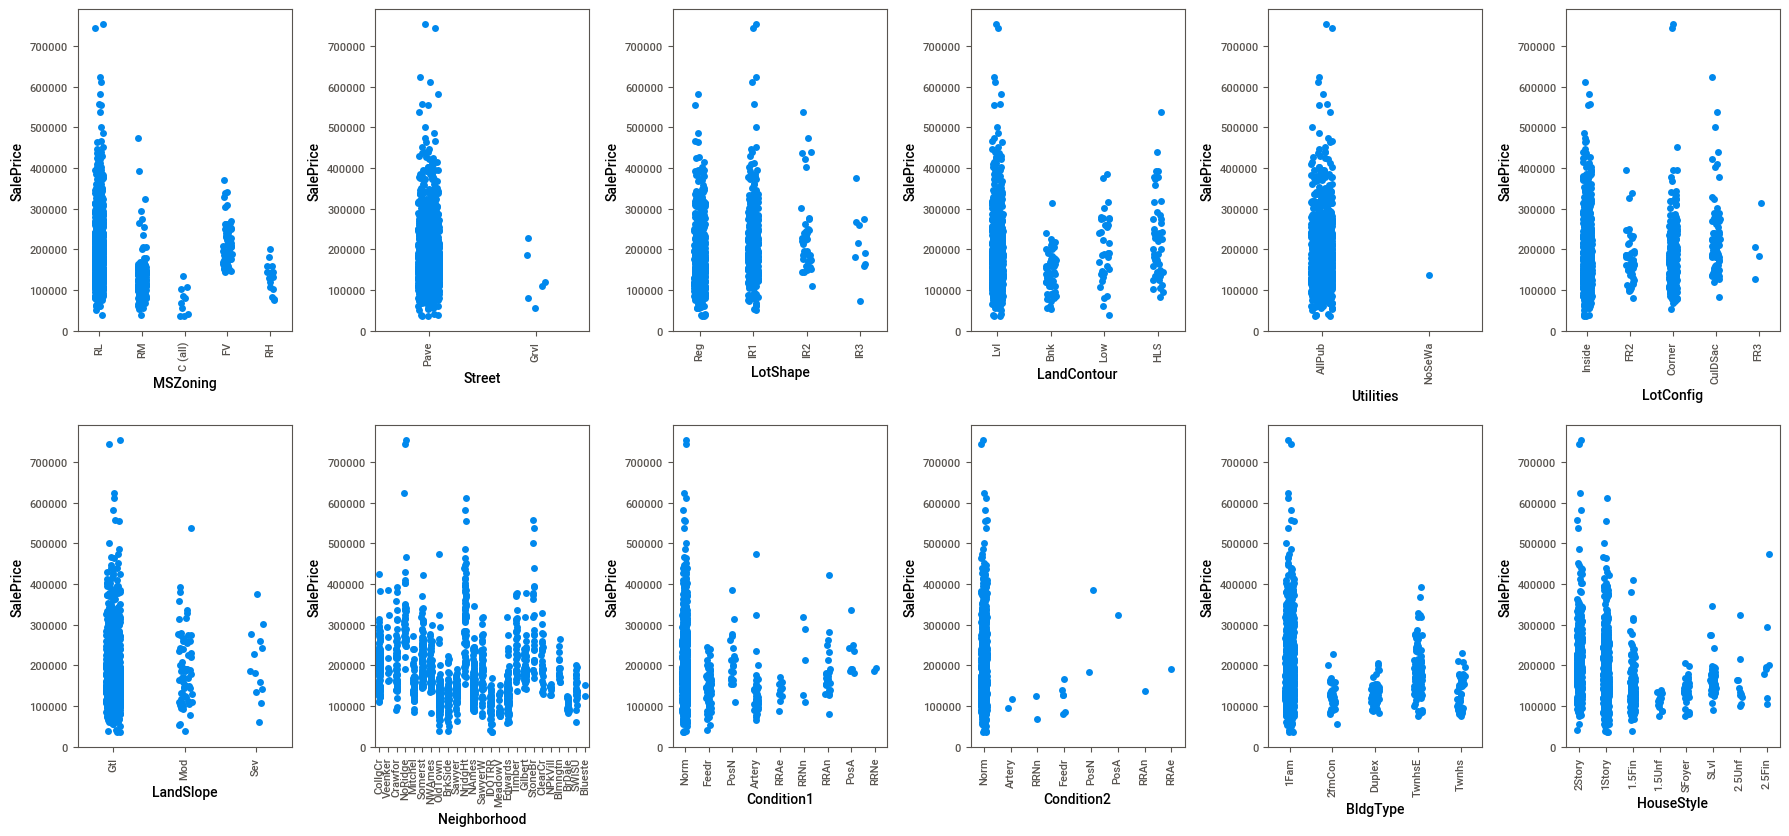

In [20]:
plt.figure(figsize=(18,16))
num = 1
for i in group1:
    plt.subplot(4,6,num)
    sns.stripplot(x=data[i],y=data["SalePrice"])
    plt.xticks(rotation=90)
    num+=1

plt.tight_layout()
plt.show()

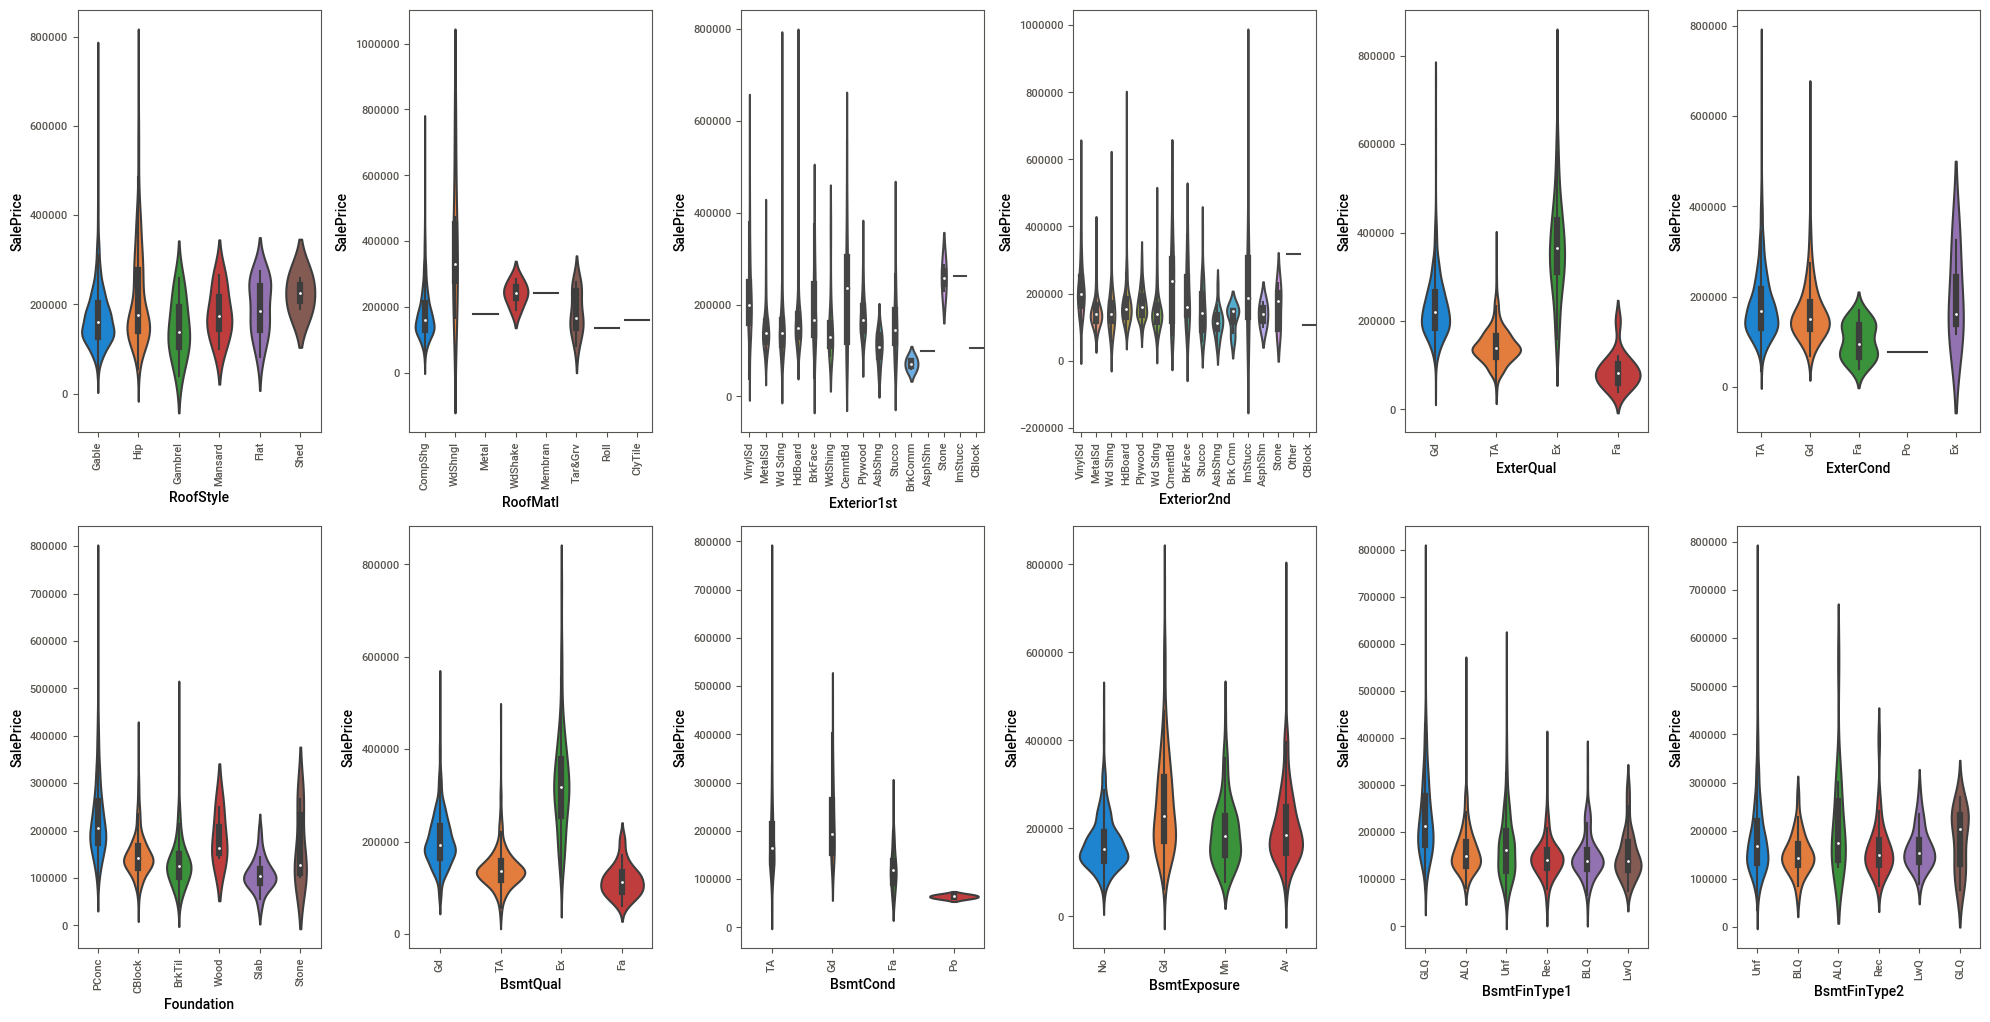

In [21]:
plt.figure(figsize=(20,20))
num = 1
for i in group2:
    plt.subplot(4,6,num)
    sns.violinplot(x=data[i],y=data["SalePrice"])
    plt.xticks(rotation=90)
    num+=1

plt.tight_layout()
plt.show()

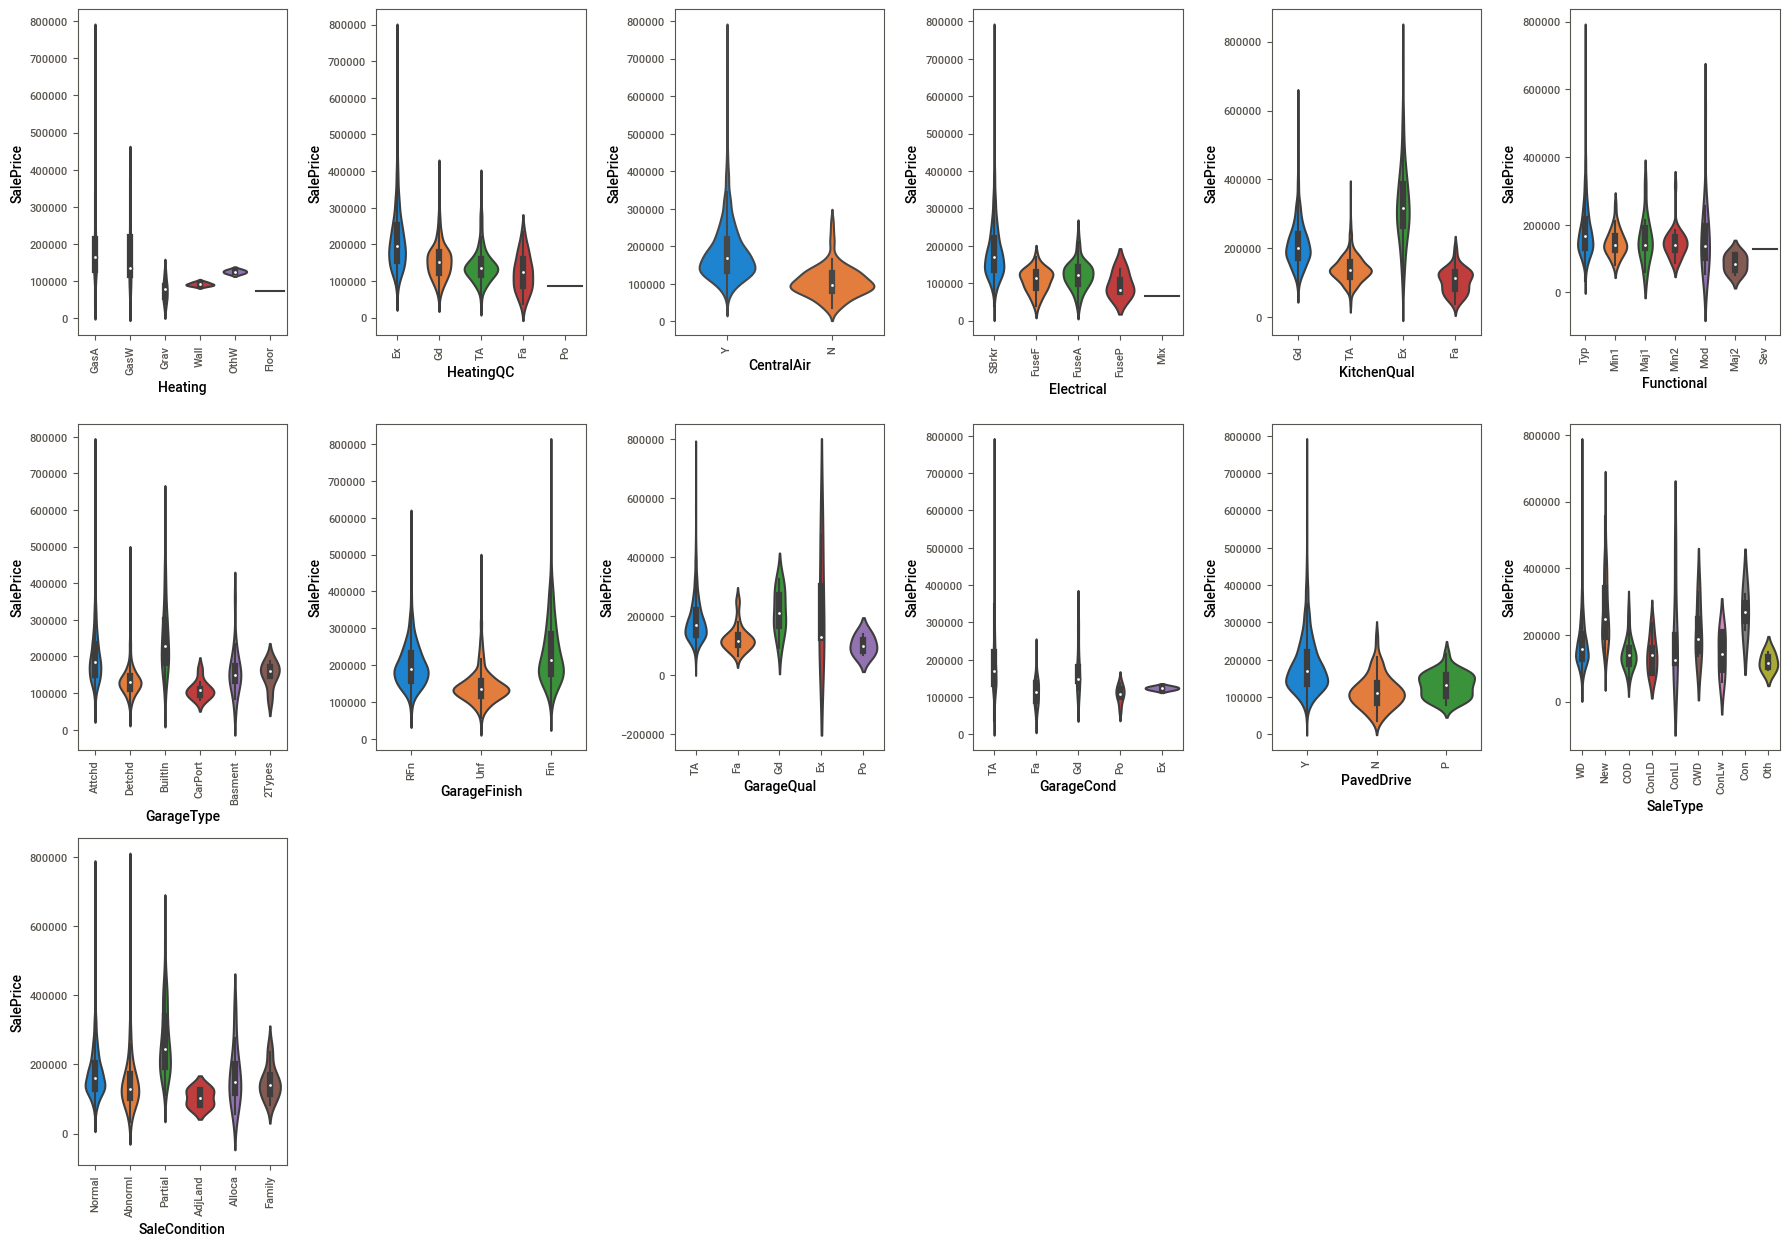

In [22]:
plt.figure(figsize=(18,16))
num = 1
for i in group3:
    plt.subplot(4,6,num)
    sns.violinplot(x=data[i],y=data["SalePrice"])
    plt.xticks(rotation=90)
    num+=1

plt.tight_layout()
plt.show()

In [23]:
cate_data.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
1     MetalSd     MetalSd        TA        TA     CBlock       Gd       TA   
2     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   
3     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA       Gd   
4     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir  \
0           No          GLQ          Unf    GasA        Ex          Y   
1           Gd          ALQ          Unf    GasA        Ex          Y   
2           Mn          GLQ          Unf    GasA        Ex          Y   
3           No          ALQ          Unf    GasA        Gd          Y   
4           Av          GLQ          Unf    GasA        Ex          Y   

  Electrical KitchenQual Functional GarageType GarageFinish GarageQual  \
0      SBrkr          Gd        Typ     Attchd          RFn         TA   
1      SBrkr          TA        Typ     Attchd          RFn         TA   
2      SBrkr          Gd        Typ     Attchd          RFn         TA   
3      SBrkr          Gd        Typ     Detchd          Unf         TA   
4      SBrkr          Gd        Typ     Attchd          RFn         TA   

  GarageCond PavedDrive SaleType SaleCondition  
0         TA          Y       WD        Normal  
1         TA          Y       WD        Normal  
2         TA          Y       WD        Normal  
3         TA          Y       WD       Abnorml  
4         TA          Y       WD        Normal

In [24]:
# find unique categories in categorical columns
for i in cate_data:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("**********************")

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
**********************
Street ['Pave' 'Grvl']
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
**********************
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
**********************
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
**********************
Utilities ['AllPub' 'NoSeWa']
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
**********************
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
**********************
LandSlope ['Gtl' 'Mod' 'Sev']
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64
********************

In [25]:
cate_data.shape

(1460, 37)

In [26]:
cate_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

# bio variate on numerical data

In [27]:
cat_col= data.select_dtypes(include='object')

In [28]:
cat_col.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [29]:
categeral_data=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

In [30]:
nume_data=data.drop(categeral_data,axis=1)

In [31]:
nume_data.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

In [32]:
list(nume_data)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [33]:
num_var_1 = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd', 'BsmtFinSF1']
num_var_2 = ['BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']
num_var_3 = ['BsmtFullBath','BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd']
num_var_4 = ['Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']
num_var_5 = ['3SsnPorch','ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold','SalePrice']

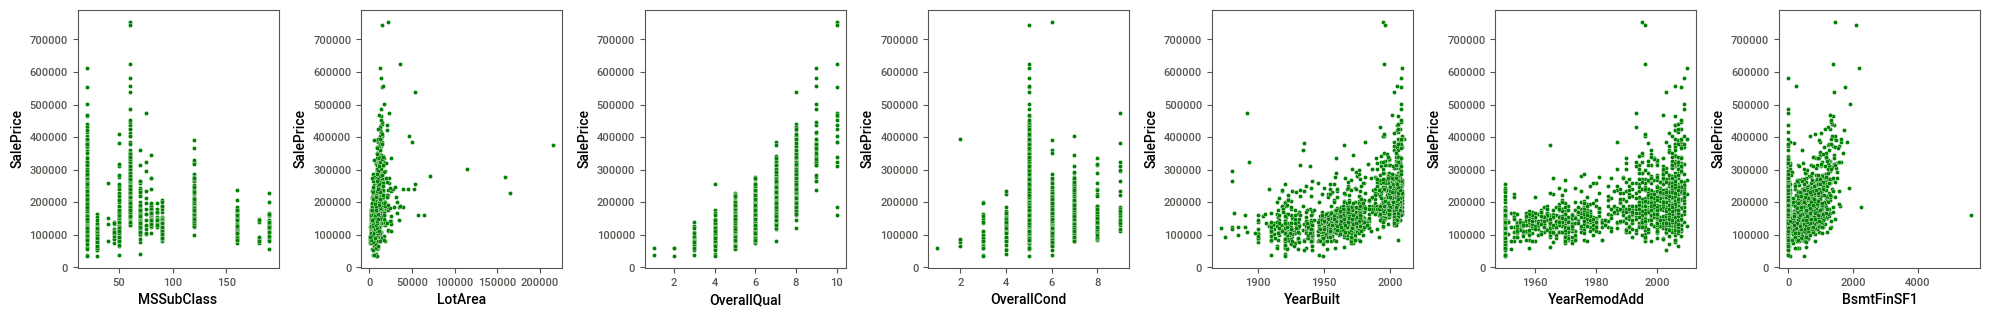

In [34]:
plt.figure(figsize=(20,6))
for i,col in enumerate(num_var_1, 1):
  plt.subplot(2,len(num_var_1),i)
  sns.scatterplot(x = data[col],y=data["SalePrice"],color = "green")

plt.tight_layout()
plt.show()


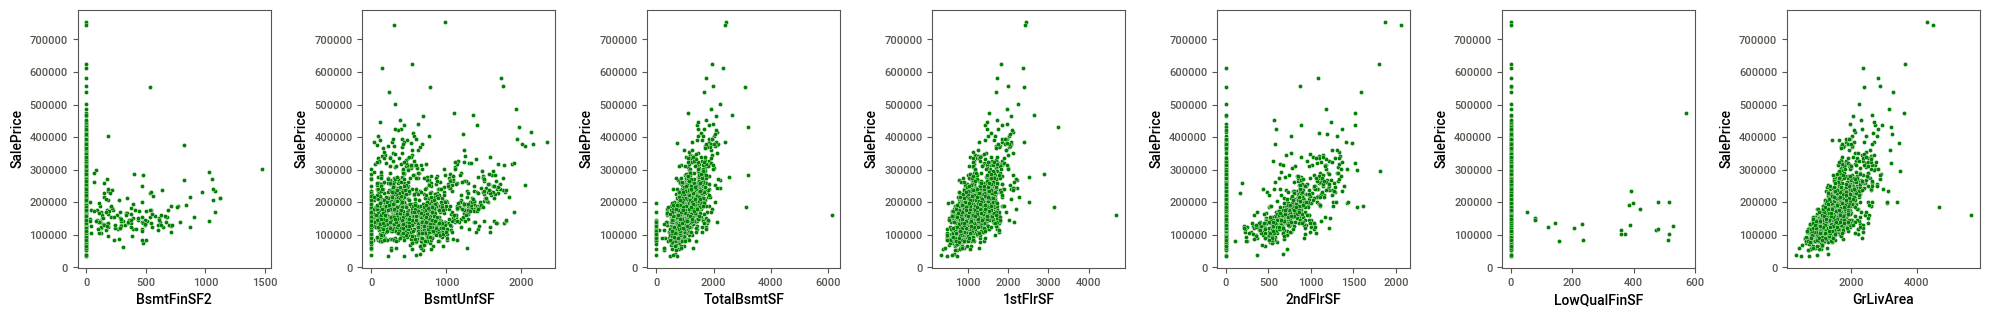

In [35]:
plt.figure(figsize=(20,6))
for i,col in enumerate(num_var_2, 1):
  plt.subplot(2,len(num_var_2),i)
  sns.scatterplot(x = data[col],y=data["SalePrice"],color = "green")

plt.tight_layout()
plt.show()

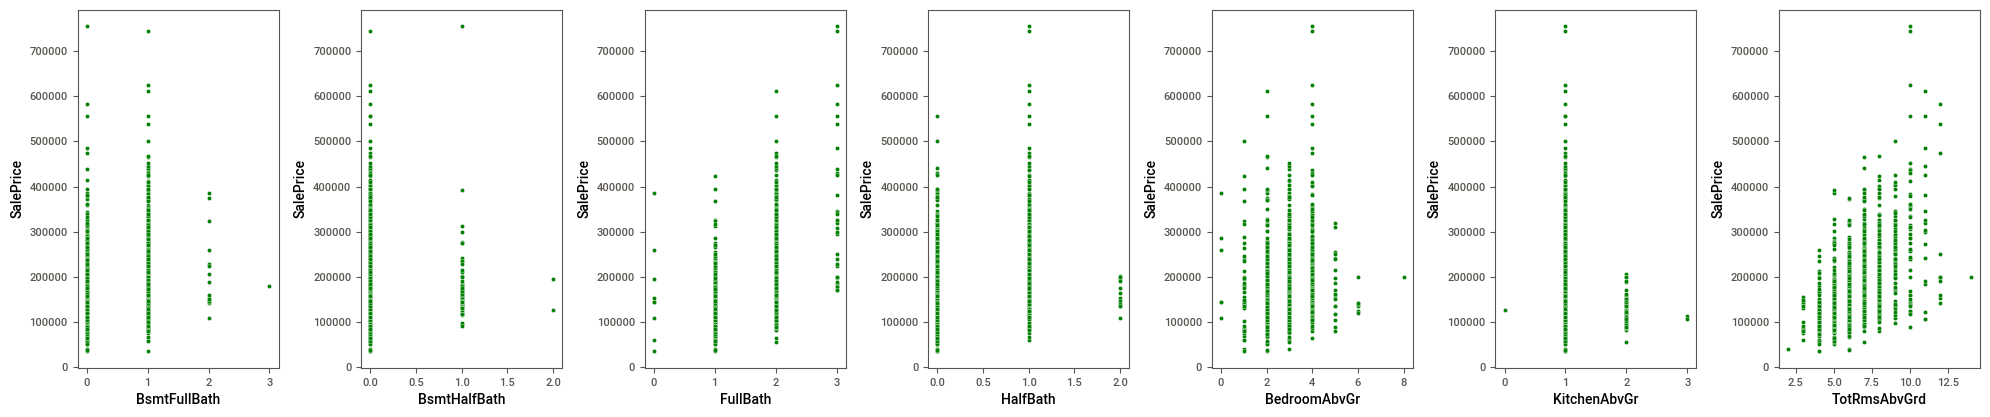

In [36]:
plt.figure(figsize=(20,8))
for i,col in enumerate(num_var_3, 1):
  plt.subplot(2,len(num_var_3),i)
  sns.scatterplot(x = data[col],y=data["SalePrice"],color = "green")

plt.tight_layout()
plt.show()

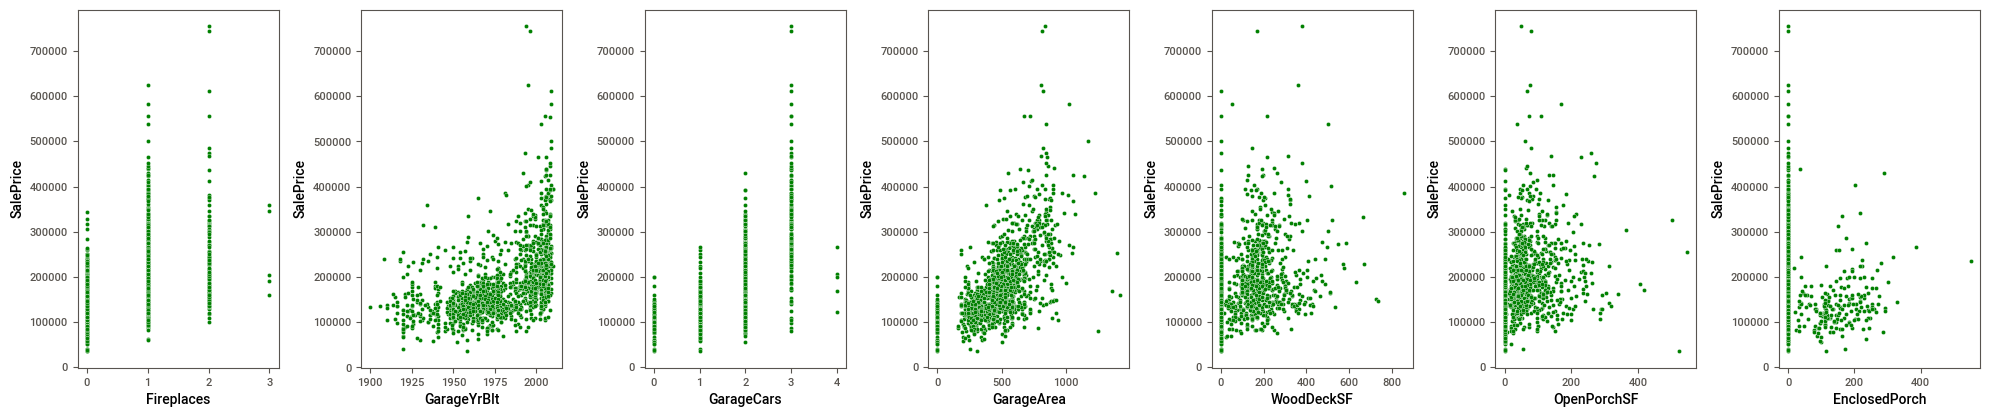

In [37]:
plt.figure(figsize=(20,8))
for i,col in enumerate(num_var_4, 1):
  plt.subplot(2,len(num_var_4),i)
  sns.scatterplot(x = data[col],y=data["SalePrice"],color = "green")

plt.tight_layout()
plt.show()

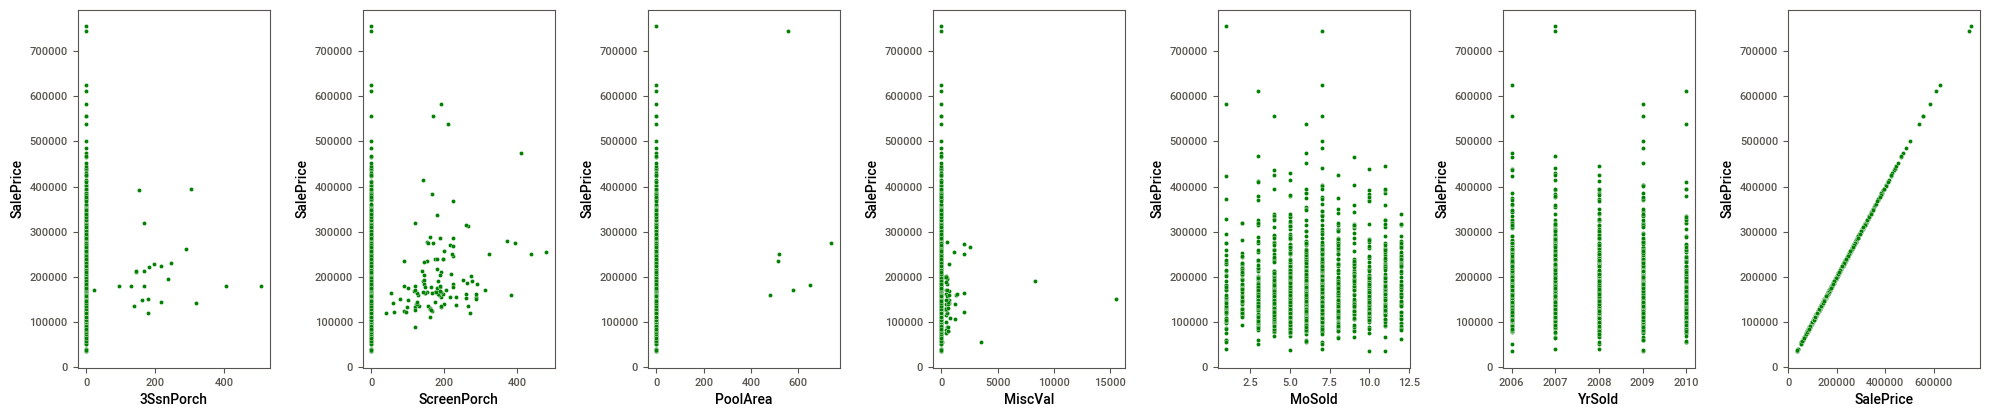

In [38]:
plt.figure(figsize=(20,8))
for i,col in enumerate(num_var_5, 1):
    plt.subplot(2,len(num_var_5),i)
    sns.scatterplot(x = data[col],y=data["SalePrice"],color = "green")

plt.tight_layout()
plt.show()

# data preprocessing pipe line

In [39]:
(data.isnull().sum()/len(data))* 100

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 74, dtype: float64

In [40]:
(nume_data.isnull().sum()/len(data))* 100

MSSubClass        0.000000
LotFrontage      17.739726
LotArea           0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
MasVnrArea        0.547945
BsmtFinSF1        0.000000
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
TotalBsmtSF       0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
TotRmsAbvGrd      0.000000
Fireplaces        0.000000
GarageYrBlt       5.547945
GarageCars        0.000000
GarageArea        0.000000
WoodDeckSF        0.000000
OpenPorchSF       0.000000
EnclosedPorch     0.000000
3SsnPorch         0.000000
ScreenPorch       0.000000
PoolArea          0.000000
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SalePrice         0.000000
d

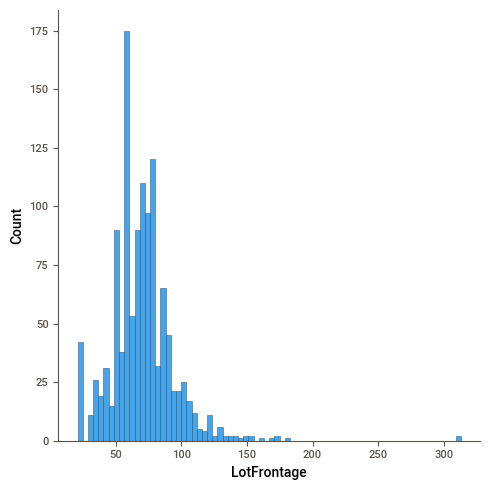

In [41]:
sns.displot(x=data['LotFrontage'])#handling null values on numerical data

In [42]:
data['LotFrontage'].mean()

70.04995836802665

In [43]:
data['LotFrontage'].median()

69.0

In [44]:
data['LotFrontage'].mode()

0    60.0
Name: LotFrontage, dtype: float64

In [45]:
data.loc[data['LotFrontage'].isnull()==True,'LotFrontage']=data['LotFrontage'].median()

In [46]:
data['LotFrontage'].isnull().sum()

0

In [47]:
data['MasVnrArea'].isnull().sum()

8

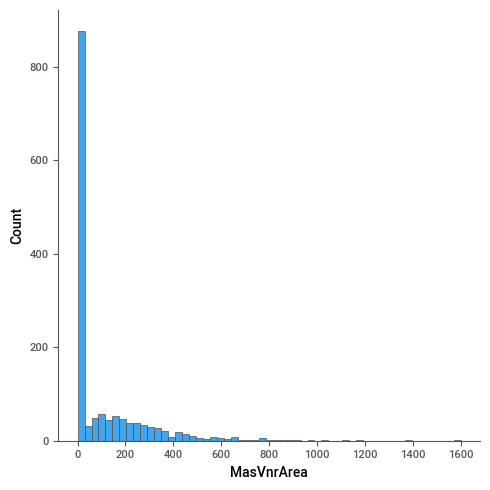

In [48]:
sns.displot(x=data["MasVnrArea"])#handling null values on numerical data 

In [49]:
data["MasVnrArea"].median()

0.0

In [50]:
data["MasVnrArea"].mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [51]:
data['MasVnrArea'].mean()

103.68526170798899

In [52]:
data.loc[data['MasVnrArea'].isnull()==True,'MasVnrArea']=data['MasVnrArea'].mean()

In [53]:
data['MasVnrArea'].isnull().sum()

0

In [54]:
data['GarageYrBlt'].isnull().sum()#handlig the null values on numerical data

81

<Axes: ylabel='Density'>

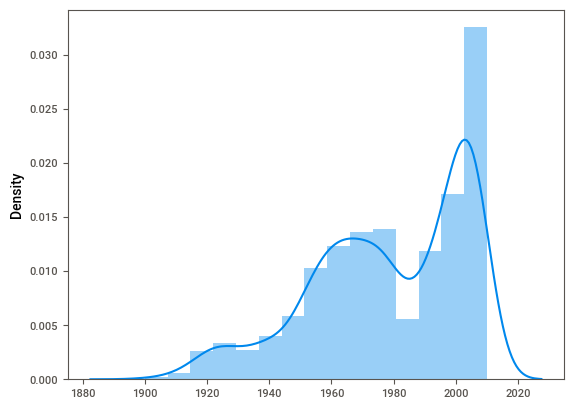

In [55]:
sns.distplot(x=data['GarageYrBlt'])

In [56]:
data['GarageYrBlt'].median()

1980.0

In [57]:
data['GarageYrBlt'].mean()

1978.5061638868744

In [58]:
data['GarageYrBlt'].mode()

0    2005.0
Name: GarageYrBlt, dtype: float64

In [59]:
data.loc[data['GarageYrBlt'].isnull()==True,'GarageYrBlt']=data['GarageYrBlt'].mean()

In [60]:
data['GarageYrBlt'].isnull().sum()

0

# handling null values on categerical data

In [61]:
cate_data.isnull().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [62]:
data["BsmtQual"].isnull().sum()#handling null values on categorical data

37

In [63]:
data["BsmtQual"].mode()

0    TA
Name: BsmtQual, dtype: object

In [64]:
data.loc[data["BsmtQual"].isnull()==True,"BsmtQual"]='TA'

In [65]:
data["BsmtQual"].isnull().sum()

0

In [66]:
data['BsmtCond'].isnull().sum()#handling null values on categorical data

37

In [67]:
data['BsmtCond'].mode()

0    TA
Name: BsmtCond, dtype: object

In [68]:
data.loc[data['BsmtCond'].isnull()==True,'BsmtCond']='TA'

In [69]:
data['BsmtCond'].isnull().sum()

0

In [70]:
data['BsmtExposure'].isnull().sum()#handling null values on categorical data

38

In [71]:
data['BsmtExposure'].mode()

0    No
Name: BsmtExposure, dtype: object

In [72]:
data.loc[data['BsmtExposure'].isnull()==True,'BsmtExposure']='No'

In [73]:
data['BsmtExposure'].isnull().sum()

0

In [74]:
data['BsmtFinType1'].isnull().sum()#handling null values on categorical data

37

In [75]:
data['BsmtFinType1'].mode()

0    Unf
Name: BsmtFinType1, dtype: object

In [76]:
data.loc[data['BsmtFinType1'].isnull()==True,'BsmtFinType1']='Unf'

In [77]:
data['BsmtFinType1'].isnull().sum()

0

In [78]:
data['BsmtFinType2'].isnull().sum()#handling null values on categorical data

38

In [79]:
data['BsmtFinType2'].mode()

0    Unf
Name: BsmtFinType2, dtype: object

In [80]:
data.loc[data['BsmtFinType2'].isnull()==True,'BsmtFinType2']='Unf'

In [81]:
data['BsmtFinType2'].isnull().sum()

0

In [82]:
data['GarageType'].isnull().sum()#handling null values on categorical data

81

In [83]:
data['GarageType'].mode()

0    Attchd
Name: GarageType, dtype: object

In [84]:
data.loc[data['GarageType'].isnull()==True,'GarageType']='Attchd'

In [85]:
data['GarageType'].isnull().sum()

0

In [86]:
data['GarageFinish'].isnull().sum()#handling null values on categorical data

81

In [87]:
data['GarageFinish'].mode()

0    Unf
Name: GarageFinish, dtype: object

In [88]:
data.loc[data['GarageFinish'].isnull()==True,'GarageFinish']="Unf"

In [89]:
data['GarageFinish'].isnull().sum()

0

In [90]:
data['GarageQual'].isnull().sum()#handling null values on categorical data

81

In [91]:
data['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [92]:
data.loc[data['GarageQual'].isnull()==True,'GarageQual']='TA'

In [93]:
data['GarageQual'].isnull().sum()

0

In [94]:
data['GarageCond'].isnull().sum()#handling null values on categorical data

81

In [95]:
data['GarageCond'].mode()

0    TA
Name: GarageCond, dtype: object

In [96]:
data.loc[data['GarageCond'].isnull()==True,'GarageCond']='TA'

In [97]:
data['GarageCond'].isnull().sum()

0

In [98]:
data['Electrical'].isnull().sum()#handling null values on categorical data

1

In [99]:
data['Electrical'].mode()

0    SBrkr
Name: Electrical, dtype: object

In [100]:
data.loc[data['Electrical'].isnull()==True,'Electrical']='SBrkr'

In [101]:
data['Electrical'].isnull().sum()

0

In [102]:
data.duplicated().sum()#checking the duplicate values

0

# handling the outliers on data

In [103]:
nume_data.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

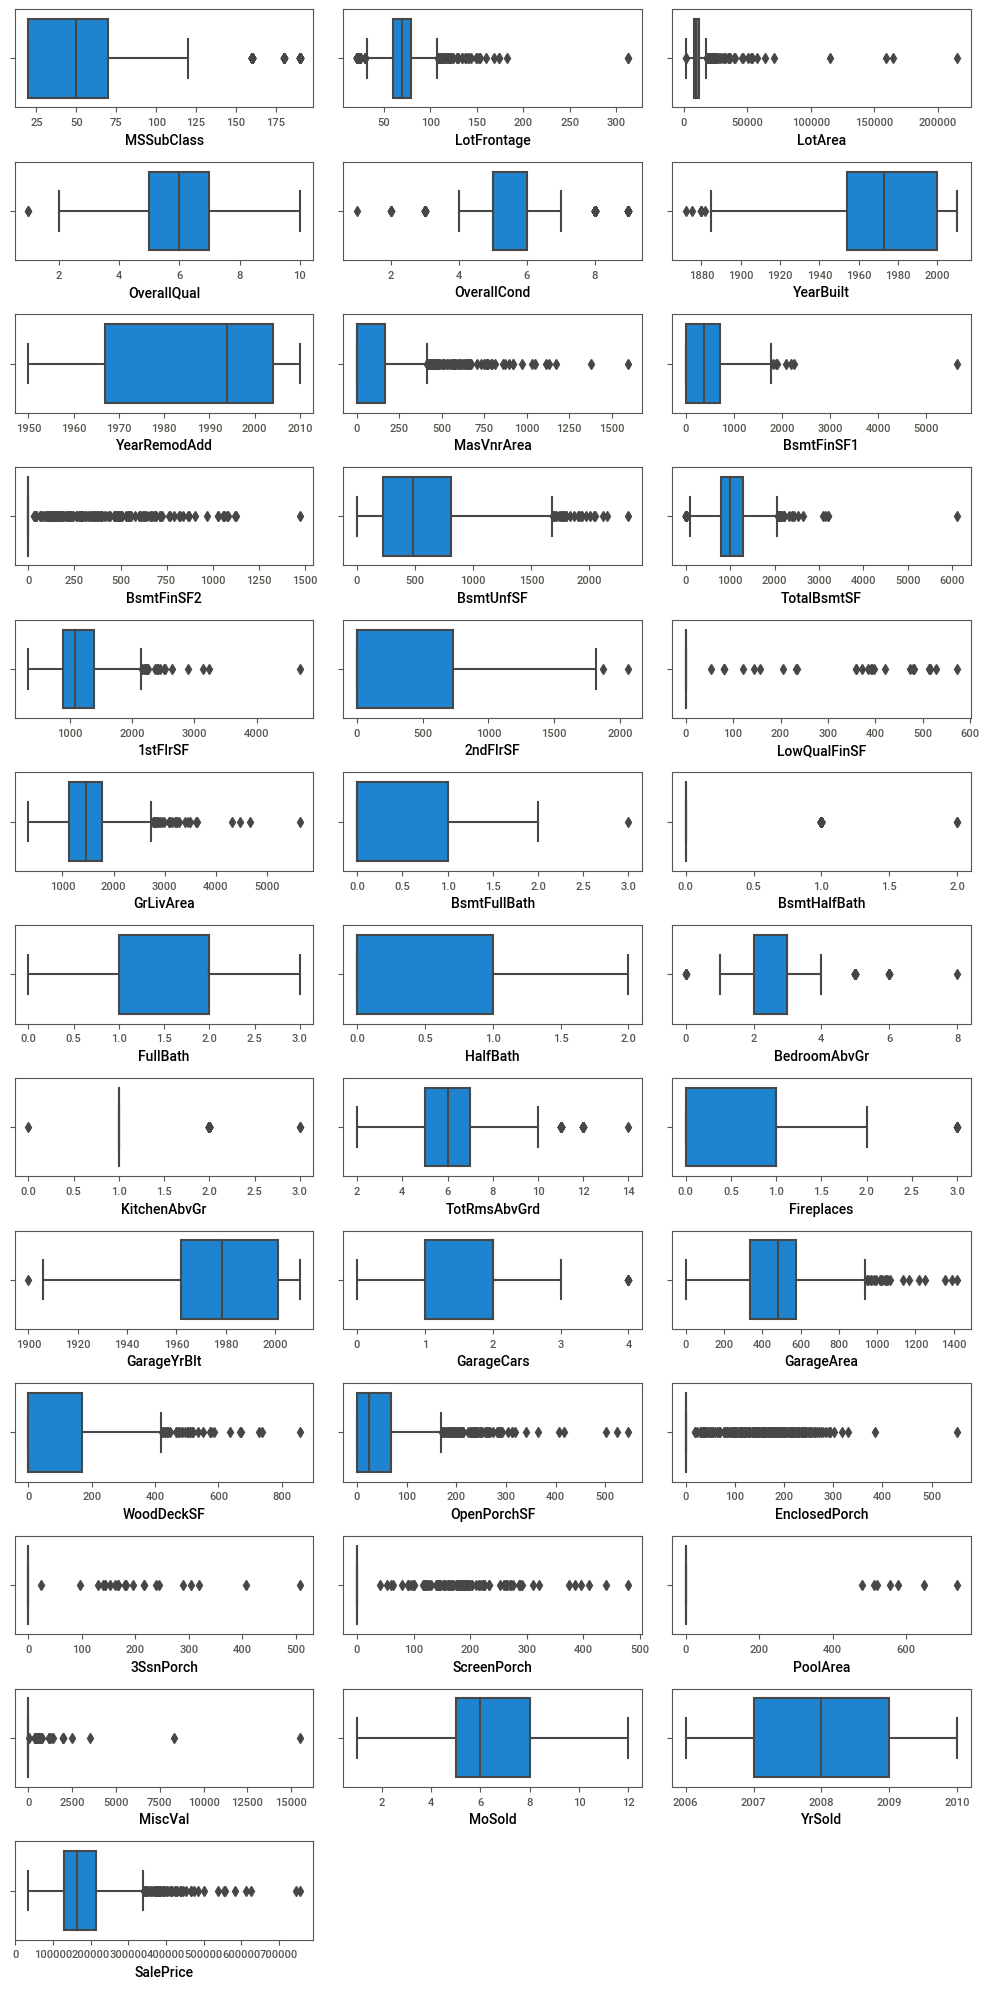

In [104]:
plt.figure(figsize=(10,20))
num=1
for i in nume_data:
    plt.subplot(13,3,num)
    sns.boxplot(x=data[i])
    num+=1
plt.tight_layout()    

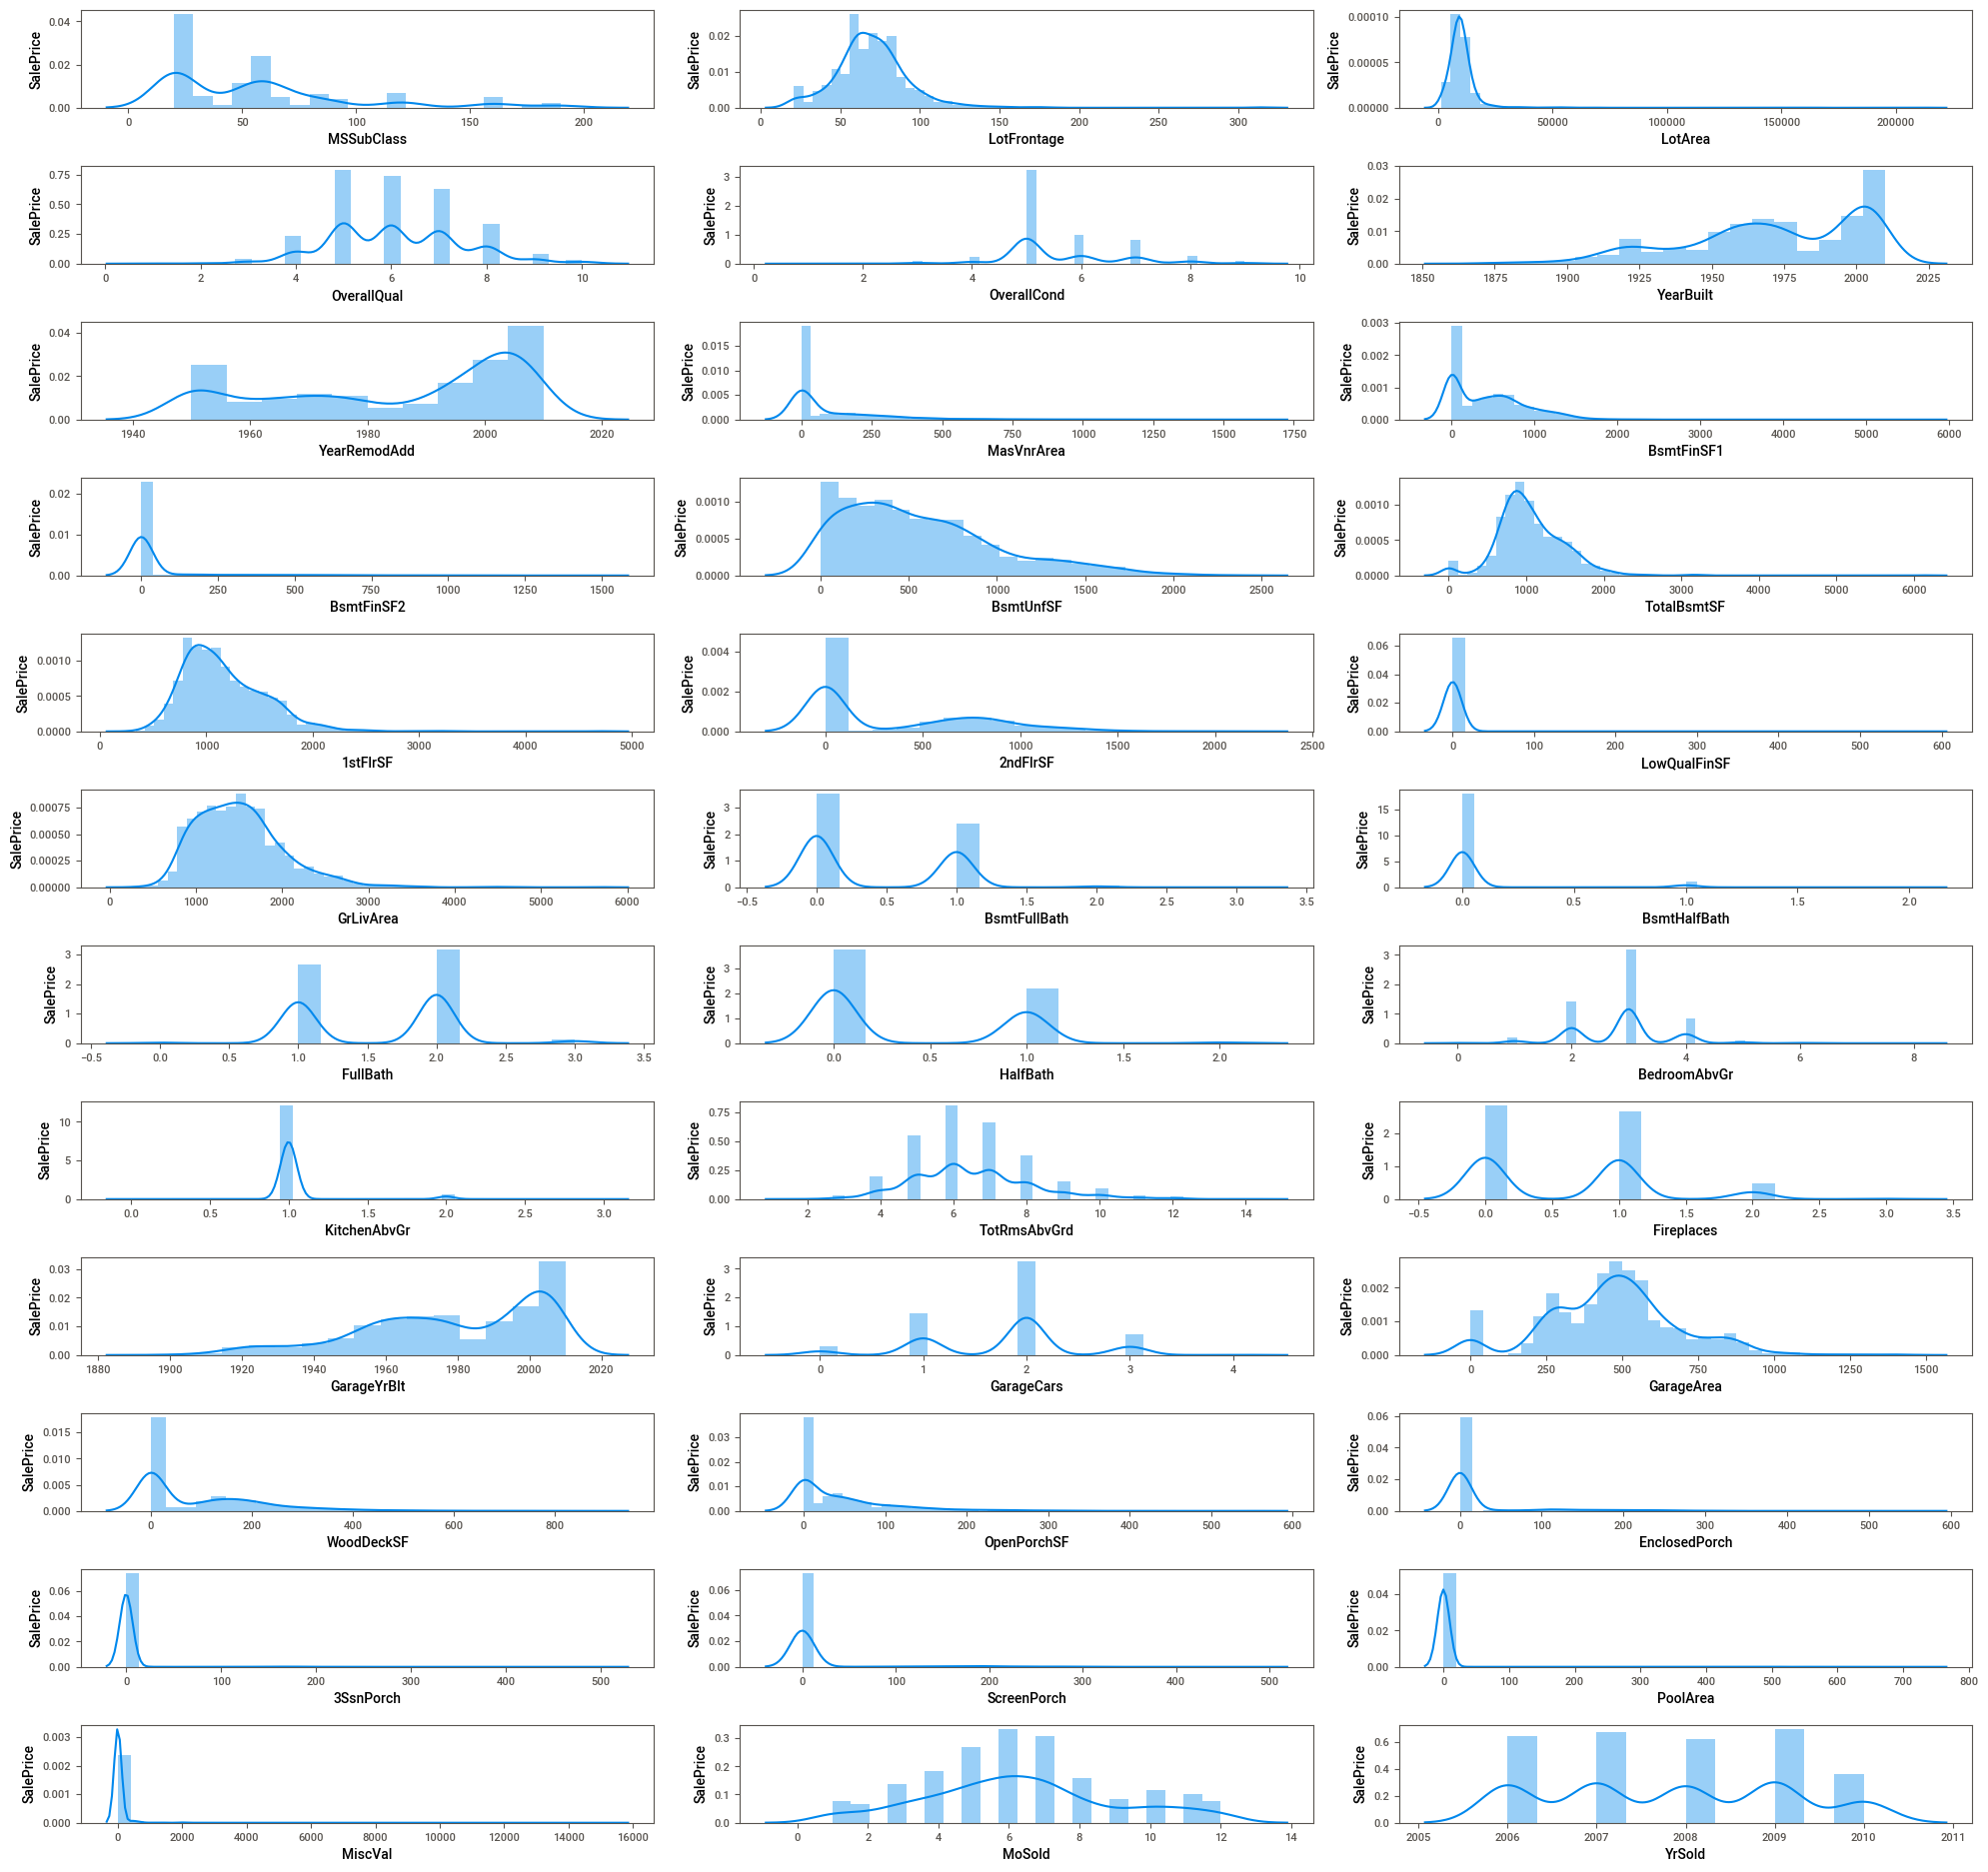

In [105]:
plt.figure(figsize=(20,20))#analyzing the numerical analysis
plotnum = 1
for column in nume_data.drop('SalePrice',axis=1):
  if plotnum <= 37:
    ax = plt.subplot(13,3,plotnum)
    sns.distplot(x = nume_data[column])
    plt.xlabel(column,fontsize = 10)
    plt.ylabel('SalePrice')
  plotnum+=1
plt.tight_layout()

In [106]:
data['MSSubClass'].median()#handling out liers on data

50.0

In [107]:
data['MSSubClass'].mean()

56.897260273972606

In [108]:
data['MSSubClass'].mode()

0    20
Name: MSSubClass, dtype: int64

In [109]:
q1=data['MSSubClass'].quantile(0.25)
q1

20.0

In [110]:
q2=data['MSSubClass'].quantile(0.50)
q2

50.0

In [111]:
q3=data['MSSubClass'].quantile(0.75)
q3

70.0

In [112]:
iqr=q3-q1
iqr

50.0

In [113]:
lower_limit=q1-1.5*iqr
lower_limit

-55.0

In [114]:
upper_limit=q3+1.5*iqr
upper_limit

145.0

In [115]:
data.loc[data['MSSubClass']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [116]:
data.loc[data['MSSubClass']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
9            190       RL         50.0     7420   Pave      Reg         Lvl   
48           190       RM         33.0     4456   Pave      Reg         Lvl   
56           160       FV         24.0     2645   Pave      Reg         Lvl   
75           180       RM         21.0     1596   Pave      Reg         Lvl   
87           160       FV         40.0     3951   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1378         160       RM         21.0     1953   Pave      Reg         Lvl   
1393         190       RM         60.0    10800   Pave      Reg         Lvl   
1416         190       RM         60.0    11340   Pave      Reg         Lvl   
1449         180       RM         21.0     1533   Pave      Reg         Lvl   
1452         180       RM         35.0     3675   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
9       AllPub    Corner       Gtl      BrkSide     Artery     Artery   
48      AllPub    Inside       Gtl      OldTown       Norm       Norm   
56      AllPub    Inside       Gtl      Somerst       Norm       Norm   
75      AllPub    Inside       Gtl      MeadowV       Norm       Norm   
87      AllPub    Corner       Gtl      Somerst       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1378    AllPub    Inside       Gtl       BrDale       Norm       Norm   
1393    AllPub    Inside       Gtl      OldTown       Norm       Norm   
1416    AllPub    Inside       Gtl      OldTown       Norm       Norm   
1449    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1452    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
9      2fmCon     1.5Unf            5            6       1939          1950   
48     2fmCon     2Story            4            5       1920          2008   
56      Twnhs     2Story            8            5       1999          2000   
75      Twnhs       SLvl            4            5       1973          1973   
87     TwnhsE     2Story            6            5       2009          2009   
...       ...        ...          ...          ...        ...           ...   
1378    Twnhs     2Story            6            5       1973          1973   
1393   2fmCon     1.5Fin            6            7       1905          2000   
1416   2fmCon     2Story            4            6       1885          1950   
1449    Twnhs     SFoyer            5            7       1970          1970   
1452   TwnhsE       SLvl            5            5       2005          2005   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
9        Gable  CompShg     MetalSd     MetalSd         0.0        TA   
48       Gable  CompShg     MetalSd     MetalSd         0.0        TA   
56       Gable  CompShg     MetalSd     MetalSd       456.0        Gd   
75       Gable  CompShg     CemntBd     CmentBd         0.0        TA   
87       Gable  CompShg     VinylSd     VinylSd        76.0        Gd   
...        ...      ...         ...         ...         ...       ...   
1378     Gable  CompShg     HdBoard     HdBoard       408.0        TA   
1393     Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
1416     Gable  CompShg     VinylSd     AsbShng         0.0        TA   
1449     Gable  CompShg     CemntBd     CmentBd         0.0        TA   
1452     Gable  CompShg     VinylSd     VinylSd        80.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
9           TA     BrkTil       TA       TA           No          GLQ   
48          TA     BrkTil       TA       TA           No          Unf   
56          TA      PConc       Gd       TA           No          GLQ   
75          TA     CBlock       Gd       TA           Gd      

In [117]:
data.loc[data["MSSubClass"]>upper_limit,"MSSubClass"]=data["MSSubClass"].median()

In [118]:
data.loc[data['MSSubClass']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='MSSubClass'>

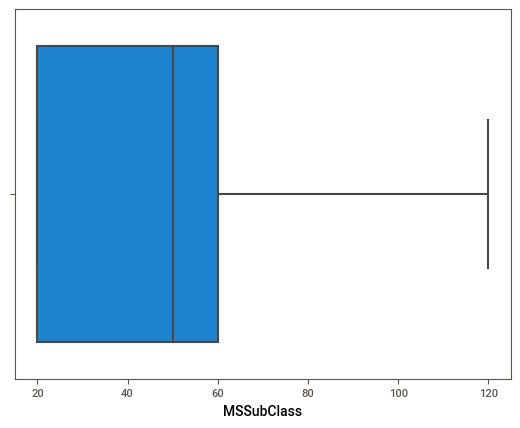

In [119]:
sns.boxplot(x=data['MSSubClass'])

In [120]:
data['LotFrontage'].median()

69.0

In [121]:
data['LotFrontage'].mean()

69.86369863013698

In [122]:
data['LotFrontage'].mode()

0    69.0
Name: LotFrontage, dtype: float64

In [123]:
q1=data['LotFrontage'].quantile(0.25)
q1

60.0

In [124]:
q2=data['LotFrontage'].quantile(0.50)
q2

69.0

In [125]:
q3=data['LotFrontage'].quantile(0.75)
q3

79.0

In [126]:
iqr=q3-q1
iqr

19.0

In [127]:
lower_limit=q1-1.5*iqr
lower_limit

31.5

In [128]:
upper_limit=q3+1.5*iqr
upper_limit

107.5

In [129]:
data.loc[data['LotFrontage']<lower_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
56            50       FV         24.0     2645   Pave      Reg         Lvl   
75            50       RM         21.0     1596   Pave      Reg         Lvl   
145           50       RM         24.0     2522   Pave      Reg         Lvl   
193           50       RM         24.0     2522   Pave      Reg         Lvl   
195           50       RL         24.0     2280   Pave      Reg         Lvl   
225           50       RM         21.0     1680   Pave      Reg         Lvl   
227           50       RM         21.0     1869   Pave      Reg         Lvl   
232           50       RM         21.0     1680   Pave      Reg         Lvl   
235           50       RM         21.0     1680   Pave      Reg         Lvl   
264           30       RM         30.0     5232   Pave      IR3         Bnk   
363           50       RM         21.0     1680   Pave      Reg         Lvl   
430           50       RM         21.0     1680   Pave      Reg         Lvl   
432           50       RM         24.0     1920   Pave      Reg         Lvl   
434           50       RM         21.0     1890   Pave      Reg         Lvl   
489           50       RM         21.0     1526   Pave      Reg         Lvl   
500           50       RM         21.0     1890   Pave      Reg         Lvl   
504           50       RL         24.0     2308   Pave      Reg         Lvl   
599           50       RM         24.0     1950   Pave      Reg         Lvl   
603           50       FV         30.0     3182   Pave      Reg         Lvl   
614           50       RM         21.0     1491   Pave      Reg         Lvl   
649           50       RM         21.0     1936   Pave      Reg         Lvl   
655           50       RM         21.0     1680   Pave      Reg         Lvl   
675           50       RL         24.0     2289   Pave      Reg         Lvl   
758           50       FV         24.0     2280   Pave      Reg         Lvl   
764          120       RL         30.0     9549   Pave      IR1         Lvl   
829           50       FV         24.0     2544   Pave      Reg         Lvl   
831           50       FV         30.0     3180   Pave      Reg         Lvl   
837           50       RM         21.0     1680   Pave      Reg         Lvl   
914           50       FV         30.0     3000   Pave      Reg         Lvl   
915           50       RM         21.0     2001   Pave      Reg         Lvl   
956           50       RM         24.0     1300   Pave      Reg         Lvl   
959           50       FV         24.0     2572   Pave      Reg         Lvl   
962           50       RL         24.0     2308   Pave      Reg         Lvl   
1007          50       RM         21.0     2217   Pave      Reg         Lvl   
1029          50       RM         21.0     1680   Pave      Reg         Lvl   
1038          50       RM         21.0     1533   Pave      Reg         Lvl   
1039          50       RM         21.0     1477   Pave      Reg         Lvl   
1088          50       RM         24.0     2522   Pave      Reg         Lvl   
1091          50       FV         24.0     2160   Pave      Reg         Lvl   
1104          50       RM         24.0     2016   Pave      Reg         Lvl   
1160          50       RL         24.0     2280   Pave      Reg         Lvl   
1191          50       FV         24.0     2645   Pave      Reg         Lvl   
1219          50       RM         21.0     1680   Pave      Reg         Lvl   
1291          50       RM         21.0     1680   Pave      Reg         Lvl   
1334          50       RM         24.0     2368   Pave      Reg         Lvl   
1364          50       FV         30.0     3180   Pave      Reg         Lvl   
1378          50       RM         21.0     1953   Pave      Reg         Lvl   
1449          50       RM         21.0     1533   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
56      AllPub    Inside       Gtl      Somerst       Norm   

In [130]:
data.loc[data['LotFrontage']<lower_limit,'LotFrontage']=data['LotFrontage'].mean()

In [131]:
data.loc[data['LotFrontage']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [132]:
data.loc[data['LotFrontage']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
25            20       RL        110.0    14230   Pave      Reg         Lvl   
35            60       RL        108.0    13418   Pave      Reg         Lvl   
36            20       RL        112.0    10859   Pave      Reg         Lvl   
41            20       RL        115.0    16905   Pave      Reg         Lvl   
52            90       RM        110.0     8472   Grvl      IR2         Bnk   
85            60       RL        121.0    16059   Pave      Reg         Lvl   
86            60       RL        122.0    11911   Pave      IR2         Lvl   
150           20       RL        120.0    10356   Pave      Reg         Lvl   
159           60       RL        134.0    19378   Pave      IR1         HLS   
161           60       RL        110.0    13688   Pave      IR1         Lvl   
171           20       RL        141.0    31770   Pave      IR1         Lvl   
197           75       RL        174.0    25419   Pave      Reg         Lvl   
231           60       RL        174.0    15138   Pave      IR1         Lvl   
260           80       RL        120.0    19296   Pave      Reg         Lvl   
276           20       RL        129.0     9196   Pave      IR1         Lvl   
277           20       RL        140.0    19138   Pave      Reg         Lvl   
290           60       RL        120.0    15611   Pave      Reg         Lvl   
302           20       RL        118.0    13704   Pave      IR1         Lvl   
306           60       RL        116.0    13474   Pave      Reg         Lvl   
313           20       RL        150.0   215245   Pave      IR3         Low   
320           60       RL        111.0    16259   Pave      Reg         Lvl   
408           60       RL        109.0    14154   Pave      Reg         Lvl   
429           20       RL        130.0    11457   Pave      IR1         Lvl   
446           20       RL        137.0    16492   Pave      IR1         Lvl   
473           20       RL        110.0    14977   Pave      IR1         Lvl   
523           60       RL        130.0    40094   Pave      IR1         Bnk   
662           20       RL        120.0    13560   Pave      Reg         Lvl   
673           20       RL        110.0    14442   Pave      Reg         Lvl   
774           20       RL        110.0    14226   Pave      Reg         Lvl   
807           70       RL        144.0    21384   Pave      Reg         Lvl   
825           20       RL        114.0    14803   Pave      Reg         Lvl   
889           20       RL        128.0    12160   Pave      Reg         Lvl   
906           20       RL        116.0    13501   Pave      IR1         Lvl   
909           60       RL        149.0    12589   Pave      IR2         Lvl   
934           20       RL        313.0    27650   Pave      IR2         HLS   
963           20       RL        122.0    11923   Pave      IR1         Lvl   
966           50       RL        130.0     9600   Pave      IR1         HLS   
991           70       RM        121.0    17671   Pave      Reg         Lvl   
1010          50       RL        115.0    21286   Pave      Reg         Lvl   
1061          30  C (all)        120.0    18000   Grvl      Reg         Low   
1106          20       RL        114.0    10357   Pave      IR1         Lvl   
1107          60       RL        168.0    23257   Pave      IR3         HLS   
1127          20       RL        182.0    14572   Pave      IR3         Lvl   
1151          20       RL        134.0    17755   Pave      Reg         Lvl   
1162          20       RL        109.0     8724   Pave      Reg         Lvl   
1168          70       RL        120.0    13728   Pave      Reg         Lvl   
1169          60       RL        118.0    35760   Pave      IR1         Lvl   
1173          50       RL        138.0    18030   Pave      IR1         Bnk   
1182          60       RL        160.0    15623   Pave      IR1         Lvl   
1211          50       RL        152.0    12134   Pave  

In [133]:
data.loc[data['LotFrontage']>upper_limit,'LotFrontage']=data['LotFrontage'].mean()

In [134]:
data.loc[data['LotFrontage']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='LotFrontage'>

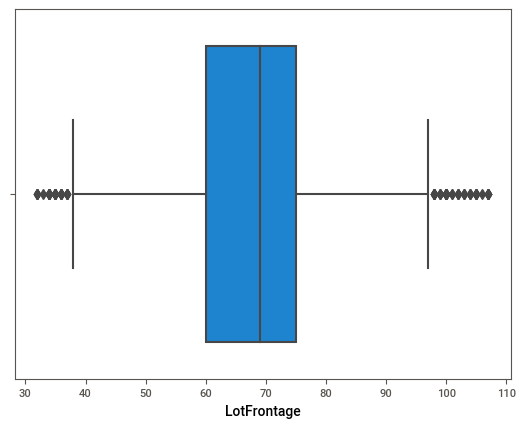

In [135]:
sns.boxplot(x=data['LotFrontage'])

In [136]:
data['LotArea'].median()

9478.5

In [137]:
data['LotArea'].mean()

10516.828082191782

In [138]:
q1=data['LotArea'].quantile(0.25)
q1

7553.5

In [139]:
q2=data['LotArea'].quantile(0.50)
q2

9478.5

In [140]:
q3=data['LotArea'].quantile(0.75)
q3

11601.5

In [141]:
lower_limit=q1-1.5*iqr
lower_limit

7525.0

In [142]:
upper_limit=q3+1.5*iqr
upper_limit

11630.0

In [143]:
data.loc[data['LotArea']<lower_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
8             50       RM    51.000000     6120   Pave      Reg         Lvl   
9             50       RL    50.000000     7420   Pave      Reg         Lvl   
15            45       RM    51.000000     6120   Pave      Reg         Lvl   
21            45       RM    57.000000     7449   Pave      Reg         Bnk   
23           120       RM    44.000000     4224   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1438          20       RM    90.000000     7407   Pave      Reg         Lvl   
1441         120       RM    69.000000     4426   Pave      Reg         Lvl   
1449          50       RM    69.863699     1533   Pave      Reg         Lvl   
1452          50       RM    35.000000     3675   Pave      Reg         Lvl   
1454          20       FV    62.000000     7500   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
8       AllPub    Inside       Gtl      OldTown     Artery       Norm   
9       AllPub    Corner       Gtl      BrkSide     Artery     Artery   
15      AllPub    Corner       Gtl      BrkSide       Norm       Norm   
21      AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
23      AllPub    Inside       Gtl      MeadowV       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1438    AllPub    Inside       Gtl      OldTown     Artery       Norm   
1441    AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1449    AllPub    Inside       Gtl      MeadowV       Norm       Norm   
1452    AllPub    Inside       Gtl      Edwards       Norm       Norm   
1454    AllPub    Inside       Gtl      Somerst       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
8        1Fam     1.5Fin            7            5       1931          1950   
9      2fmCon     1.5Unf            5            6       1939          1950   
15       1Fam     1.5Unf            7            8       1929          2001   
21       1Fam     1.5Unf            7            7       1930          1950   
23     TwnhsE     1Story            5            7       1976          1976   
...       ...        ...          ...          ...        ...           ...   
1438     1Fam     1Story            6            7       1957          1996   
1441   TwnhsE     1Story            6            5       2004          2004   
1449    Twnhs     SFoyer            5            7       1970          1970   
1452   TwnhsE       SLvl            5            5       2005          2005   
1454     1Fam     1Story            7            5       2004          2005   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
8        Gable  CompShg     BrkFace     Wd Shng         0.0        TA   
9        Gable  CompShg     MetalSd     MetalSd         0.0        TA   
15       Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
21       Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
23       Gable  CompShg     CemntBd     CmentBd         0.0        TA   
...        ...      ...         ...         ...         ...       ...   
1438     Gable  CompShg     MetalSd     MetalSd         0.0        TA   
1441     Gable  CompShg     VinylSd     VinylSd       147.0        Gd   
1449     Gable  CompShg     CemntBd     CmentBd         0.0        TA   
1452     Gable  CompShg     VinylSd     VinylSd        80.0        TA   
1454     Gable  CompShg     VinylSd     VinylSd         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
8           TA     BrkTil       TA       TA           No          Unf   
9           TA     BrkTil       TA       TA           No          GLQ   
15          TA     BrkTil       TA       TA           No          Unf   
21          TA      PConc       TA       TA           No      

In [144]:
data.loc[data['LotArea']<lower_limit,'LotArea']=data['LotArea'].median()

In [145]:
data.loc[data['LotArea']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [146]:
data.loc[data['LotArea']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
4             60       RL         84.0  14260.0   Pave      IR1         Lvl   
5             50       RL         85.0  14115.0   Pave      IR1         Lvl   
11            60       RL         85.0  11924.0   Pave      IR1         Lvl   
12            20       RL         69.0  12968.0   Pave      IR2         Lvl   
18            20       RL         66.0  13695.0   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1437          20       RL         96.0  12444.0   Pave      Reg         Lvl   
1446          20       RL         69.0  26142.0   Pave      IR1         Lvl   
1448          50       RL         70.0  11767.0   Pave      Reg         Lvl   
1453          20       RL         90.0  17217.0   Pave      Reg         Lvl   
1456          20       RL         85.0  13175.0   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
4       AllPub       FR2       Gtl      NoRidge       Norm       Norm   
5       AllPub    Inside       Gtl      Mitchel       Norm       Norm   
11      AllPub    Inside       Gtl      NridgHt       Norm       Norm   
12      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
18      AllPub    Inside       Gtl      SawyerW       RRAe       Norm   
...        ...       ...       ...          ...        ...        ...   
1437    AllPub       FR2       Gtl      NridgHt       Norm       Norm   
1446    AllPub   CulDSac       Gtl      Mitchel       Norm       Norm   
1448    AllPub    Inside       Gtl      Edwards       Norm       Norm   
1453    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
4        1Fam     2Story            8            5       2000          2000   
5        1Fam     1.5Fin            5            5       1993          1995   
11       1Fam     2Story            9            5       2005          2006   
12       1Fam     1Story            5            6       1962          1962   
18       1Fam     1Story            5            5       2004          2004   
...       ...        ...          ...          ...        ...           ...   
1437     1Fam     1Story            8            5       2008          2008   
1446     1Fam     1Story            5            7       1962          1962   
1448     1Fam     2Story            4            7       1910          2000   
1453     1Fam     1Story            5            5       2006          2006   
1456     1Fam     1Story            6            6       1978          1988   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
4        Gable  CompShg     VinylSd     VinylSd       350.0        Gd   
5        Gable  CompShg     VinylSd     VinylSd         0.0        TA   
11         Hip  CompShg     WdShing     Wd Shng       286.0        Ex   
12         Hip  CompShg     HdBoard     Plywood         0.0        TA   
18       Gable  CompShg     VinylSd     VinylSd         0.0        TA   
...        ...      ...         ...         ...         ...       ...   
1437       Hip  CompShg     VinylSd     VinylSd       426.0        Ex   
1446     Gable  CompShg     HdBoard     HdBoard       189.0        TA   
1448     Gable  CompShg     MetalSd     HdBoard         0.0        TA   
1453     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1456     Gable  CompShg     Plywood     Plywood       119.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
4           TA      PConc       Gd       TA           Av          GLQ   
5           TA       Wood       Gd       TA           No          GLQ   
11          TA      PConc       Ex       TA           No          GLQ   
12          TA     CBlock       TA       TA           No      

In [147]:
data.loc[data['LotArea']>upper_limit,'LotArea']=data['LotArea'].median()

In [148]:
data.loc[data['LotArea']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='LotArea'>

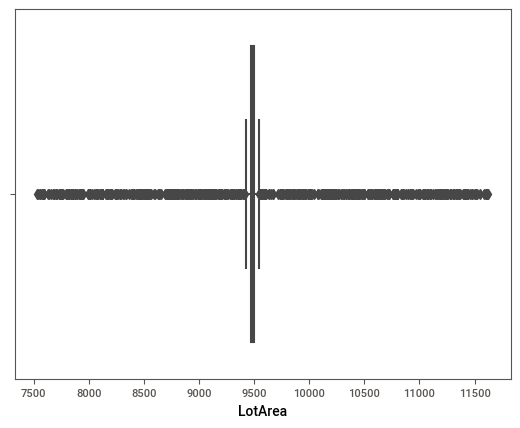

In [149]:
sns.boxplot(x=data['LotArea'])

In [150]:
data['OverallQual'].median()

6.0

In [151]:
data['OverallQual'].mean()

6.0993150684931505

In [152]:
data['OverallQual'].mode()

0    5
Name: OverallQual, dtype: int64

In [153]:
q1=data['OverallQual'].quantile(0.25)
q1

5.0

In [154]:
q2=data['OverallQual'].quantile(0.50)
q2

6.0

In [155]:
q3=data['OverallQual'].quantile(0.75)
q3

7.0

In [156]:
iqr=q3-q1
iqr

2.0

In [157]:
lower_limit=q1-1.5*iqr
lower_limit

2.0

In [158]:
upper_limit=q3+1.5*iqr
upper_limit

10.0

In [159]:
data.loc[data['OverallQual']<lower_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
375          30       RL         69.0  10020.0   Pave      IR1         Low   
533          20       RL         50.0   9478.5   Pave      Reg         Low   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
375    AllPub    Inside       Sev      Edwards       Norm       Norm     1Fam   
533    AllPub    Inside       Mod      BrkSide       Norm       Norm     1Fam   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
375     1Story            1            1       1922          1950     Gable   
533     1Story            1            3       1946          1950     Gable   

    RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
375  CompShg     Wd Sdng     Wd Sdng         0.0        Fa        Fa   
533  CompShg     VinylSd     VinylSd         0.0        Fa        Fa   

    Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
375     BrkTil       Fa       Po           Gd          BLQ         350   
533       Slab       TA       TA           No          Unf           0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
375          Unf           0        333          683    GasA        Gd   
533          Unf           0          0            0    GasA        Fa   

    CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
375          N      FuseA       904         0             0        904   
533          N      FuseF       334         0             0        334   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
375             1             0         0         1             1   
533             0             0         1         0             1   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
375             1          Fa             4       Maj1           0     Attchd   
533             1          Fa             2        Typ           0     Attchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
375  1978.506164          Unf           0           0         TA         TA   
533  1978.506164          Unf           0           0         TA         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
375          Y           0            0              0          0   
533          N           0            0              0          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
375            0         0        0       3    2009       WD        Normal   
533            0         0        0       1    2007       WD        Normal   

     SalePrice  
375      61000  
533      39300

In [160]:
data.loc[data['OverallQual']<lower_limit,'OverallQual']=data['OverallQual'].median()

In [161]:
data.loc[data['OverallQual']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [162]:
data.loc[data['OverallQual']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='OverallQual'>

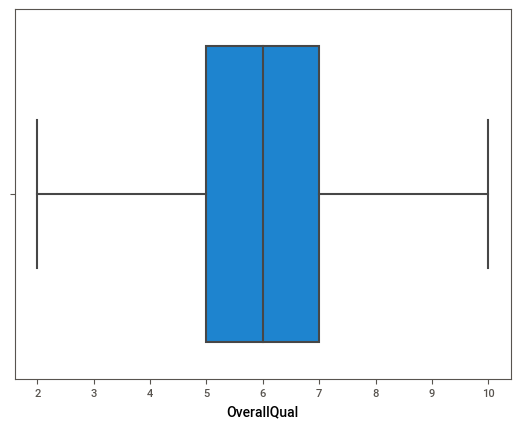

In [163]:
sns.boxplot(x=data['OverallQual'])

In [164]:
data['OverallCond'].median()

5.0

In [165]:
data['OverallCond'].mean()

5.575342465753424

In [166]:
data['OverallCond'].mode()

0    5
Name: OverallCond, dtype: int64

In [167]:
q1=data['OverallCond'].quantile(0.25)
q1

5.0

In [168]:
q3=data['OverallCond'].quantile(0.75)
q3

6.0

In [169]:
iqr=q3-q1
iqr

1.0

In [170]:
lower_limit=q1-1.5*iqr
lower_limit

3.5

In [171]:
upper_limit=q3+1.5*iqr
upper_limit

7.5

In [172]:
data.loc[data['OverallCond']<lower_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
88            50  C (all)   105.000000   8470.00   Pave      IR1         Lvl   
91            20       RL    85.000000   8500.00   Pave      Reg         Lvl   
235           50       RM    69.863699   9478.50   Pave      Reg         Lvl   
250           30       RL    55.000000   9478.50   Pave      IR1         Lvl   
344           50       RM    36.000000   9478.50   Pave      Reg         Lvl   
375           30       RL    69.000000  10020.00   Pave      IR1         Low   
378           20       RL    88.000000  11394.00   Pave      Reg         Lvl   
383           45       RH    60.000000   9000.00   Pave      Reg         Lvl   
386           50       RL    58.000000   8410.00   Pave      Reg         Lvl   
398           30       RM    60.000000   8967.00   Pave      Reg         Lvl   
410           20       RL    68.000000   9571.00   Pave      Reg         Lvl   
529           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
533           20       RL    50.000000   9478.50   Pave      Reg         Low   
620           30       RL    45.000000   8248.00   Pave      Reg         Lvl   
636           30       RM    51.000000   9478.50   Pave      Reg         Lvl   
662           20       RL    71.394149   9479.25   Pave      Reg         Lvl   
676           70       RM    60.000000   9600.00   Pave      Reg         Lvl   
749           50       RL    50.000000   8405.00   Pave      Reg         Lvl   
916           20  C (all)    50.000000   9000.00   Pave      Reg         Lvl   
942           90       RL    42.000000   7711.00   Pave      IR1         Lvl   
1000          20       RL    74.000000  10206.00   Pave      Reg         Lvl   
1006          20       RL    69.000000   9479.25   Pave      IR3         Lvl   
1031          75       RL   102.000000   9479.25   Pave      Reg         Lvl   
1035          20       RL    69.000000  11500.00   Pave      IR1         Lvl   
1072          50       RL    50.000000   7585.00   Pave      Reg         Lvl   
1122          20       RL    69.000000   8926.00   Pave      IR1         Lvl   
1130          50       RL    65.000000   7804.00   Pave      Reg         Lvl   
1143          20       RL    69.000000   9000.00   Pave      Reg         Lvl   
1223          20       RL    89.000000  10680.00   Pave      Reg         Lvl   
1320          20       RL    70.000000   8400.00   Pave      Reg         Lvl   
1380          30       RL    45.000000   8212.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
88      AllPub    Corner       Gtl       IDOTRR      Feedr      Feedr   
91      AllPub    Inside       Gtl        NAmes       Norm       Norm   
235     AllPub    Inside       Gtl       BrDale       Norm       Norm   
250     AllPub    Inside       Gtl      BrkSide       Norm       Norm   
344     AllPub    Inside       Gtl      MeadowV       Norm       Norm   
375     AllPub    Inside       Sev      Edwards       Norm       Norm   
378     AllPub    Corner       Gtl      StoneBr       Norm       Norm   
383     AllPub    Corner       Gtl      SawyerW       Norm       Norm   
386     AllPub       FR2       Gtl      Edwards      Feedr       Norm   
398     AllPub    Corner       Gtl       IDOTRR       Norm       Norm   
410     AllPub    Inside       Gtl      Edwards       Norm       Norm   
529     AllPub   CulDSac       Gtl      Crawfor       Norm       Norm   
533     AllPub    Inside       Mod      BrkSide       Norm       Norm   
620     AllPub    Inside       Gtl      Edwards       Norm       Norm   
636     AllPub    Inside       Gtl      BrkSide       Norm       Norm   
662     AllPub    Corner       Gtl        NAmes       Norm       Norm   
676     AllPub    Inside       Gtl      OldTown       Norm       Norm   
749     AllPub    Inside       Gtl      Edwards       Norm       Norm   
916     AllPub    Inside       Gtl       IDOTRR       Norm

In [173]:
data.loc[data['OverallCond']<lower_limit,'OverallCond']=data['OverallCond'].median()

In [174]:
data.loc[data['OverallCond']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [175]:
data.loc[data['OverallCond']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1             20       RL         80.0   9600.0   Pave      Reg         Lvl   
15            45       RM         51.0   9478.5   Pave      Reg         Lvl   
24            20       RL         69.0   8246.0   Pave      IR1         Lvl   
95            60       RL         69.0   9765.0   Pave      IR2         Lvl   
114           70       RL         61.0   9478.5   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1385          50       RM         40.0   9478.5   Pave      Reg         Lvl   
1397          70       RM         51.0   9478.5   Pave      Reg         Lvl   
1411          50       RL         80.0   9600.0   Pave      Reg         Lvl   
1435          20       RL         80.0   8400.0   Pave      Reg         Lvl   
1457          70       RL         66.0   9042.0   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
15      AllPub    Corner       Gtl      BrkSide       Norm       Norm   
24      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
95      AllPub    Corner       Gtl      Gilbert       Norm       Norm   
114     AllPub    Inside       Mod      Crawfor       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1385    AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
1397    AllPub    Inside       Gtl      BrkSide       Norm       Norm   
1411    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1435    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1457    AllPub    Inside       Gtl      Crawfor       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1        1Fam     1Story            6            8       1976          1976   
15       1Fam     1.5Unf            7            8       1929          2001   
24       1Fam     1Story            5            8       1968          2001   
95       1Fam     2Story            6            8       1993          1993   
114      1Fam     2Story            6            8       1945          2002   
...       ...        ...          ...          ...        ...           ...   
1385     1Fam     1.5Fin            4            8       1922          2007   
1397     1Fam     2Story            5            8       1920          2004   
1411     1Fam     1.5Fin            6            8       1950          2005   
1435     1Fam     1Story            6            9       1962          2005   
1457     1Fam     2Story            7            9       1941          2006   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
1        Gable  CompShg     MetalSd     MetalSd         0.0        TA   
15       Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
24       Gable  CompShg     Plywood     Plywood         0.0        TA   
95       Gable  CompShg     VinylSd     VinylSd        68.0        Ex   
114    Gambrel  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
...        ...      ...         ...         ...         ...       ...   
1385     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1397     Gable  CompShg     MetalSd     MetalSd         0.0        TA   
1411     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1435     Gable  CompShg     Wd Sdng     Wd Sdng       237.0        Gd   
1457     Gable  CompShg     CemntBd     CmentBd         0.0        Ex   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
1           TA     CBlock       Gd       TA           Gd          ALQ   
15          TA     BrkTil       TA       TA           No          Unf   
24          Gd     CBlock       TA       TA           Mn          Rec   
95          Gd      PConc       Gd       Gd           No      

In [176]:
data.loc[data['OverallCond']>upper_limit,'OverallCond']=data['OverallCond'].median()

In [177]:
data.loc[data['OverallCond']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='OverallCond'>

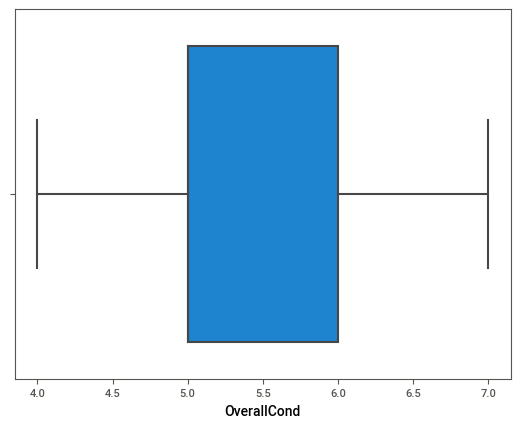

In [178]:
sns.boxplot(x=data['OverallCond'])

In [179]:
data['YearBuilt'].median()

1973.0

In [180]:
data['YearBuilt'].mean()

1971.267808219178

In [181]:
data['YearBuilt'].mode()

0    2006
Name: YearBuilt, dtype: int64

In [182]:
q1=data['YearBuilt'].quantile(0.25)
q1

1954.0

In [183]:
q3=data['YearBuilt'].quantile(0.75)
q3

2000.0

In [184]:
iqr=q3-q1
iqr

46.0

In [185]:
lower_limit=q1-1.5*iqr
lower_limit

1885.0

In [186]:
upper_limit=q3+1.5*iqr
upper_limit

2069.0

In [187]:
data.loc[data['YearBuilt']<lower_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
304           75       RM    87.000000  9479.25   Pave      Reg         Lvl   
630           70       RM    50.000000  9000.00   Pave      Reg         Lvl   
747           70       RM    65.000000  9479.25   Pave      IR1         Lvl   
991           70       RM    71.394149  9479.25   Pave      Reg         Lvl   
1132          70       RM    90.000000  9900.00   Pave      Reg         Lvl   
1137          50       RL    54.000000  9478.50   Pave      Reg         Lvl   
1349          70       RM    50.000000  9478.50   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
304     AllPub    Inside       Gtl      OldTown       Norm       Norm   
630     AllPub    Corner       Gtl      OldTown     Artery       Norm   
747     AllPub    Corner       Gtl      OldTown       Norm       Norm   
991     AllPub    Corner       Gtl      OldTown     Artery       Norm   
1132    AllPub    Inside       Gtl      OldTown       Norm       Norm   
1137    AllPub    Inside       Gtl       Sawyer      Feedr       Norm   
1349    AllPub    Inside       Gtl      OldTown       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
304      1Fam     2.5Fin            7            5       1880          2002   
630      1Fam     2Story            5            6       1880          1991   
747      1Fam     2Story            7            7       1880          2003   
991      1Fam     2Story            8            5       1882          1986   
1132     1Fam     2Story            6            4       1880          1950   
1137     1Fam     1.5Fin            5            5       1875          1996   
1349     1Fam     2Story            8            5       1872          1987   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
304      Gable  CompShg     CemntBd     CmentBd         0.0        TA   
630      Gable  CompShg     VinylSd     VinylSd         0.0        TA   
747    Mansard  CompShg      Stucco      Stucco         0.0        Gd   
991      Gable  CompShg     Wd Sdng     Wd Sdng         0.0        Gd   
1132     Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
1137     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1349     Gable  CompShg     MetalSd     MetalSd         0.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
304         TA     BrkTil       TA       TA           No          Unf   
630         TA     BrkTil       Fa       Fa           No          Unf   
747         TA      Stone       TA       Fa           No          Unf   
991         Gd     BrkTil       TA       TA           No          BLQ   
1132        TA     BrkTil       TA       TA           Mn          Unf   
1137        Gd     CBlock       TA       TA           No          Unf   
1349        Gd     BrkTil       TA       Fa           No          LwQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
304            0          Unf           0       1470         1470    GasA   
630            0          Unf           0        636          636    GasA   
747            0          Unf           0       1240         1240    GasW   
991          216          Unf           0        700          916    GasA   
1132           0          Unf           0       1008         1008    GasW   
1137           0          Unf           0        780          780    GasA   
1349         259          Unf           0        425          684    OthW   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
304         Ex          Y      SBrkr      1675      1818             0   
630         TA          Y      FuseA      1089       661             0   
747         TA          N      SBrkr      1320      1320             0   
991         Gd          Y      SBrkr       916       826             0  

In [188]:
data.loc[data['YearBuilt']<lower_limit,'YearBuilt']=data['YearBuilt'].median()

In [189]:
data.loc[data['YearBuilt']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [190]:
data.loc[data['YearBuilt']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='YearBuilt'>

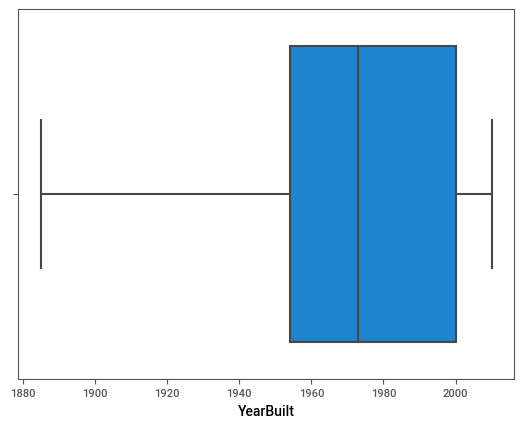

In [191]:
sns.boxplot(x=data['YearBuilt'])

In [192]:
data['MasVnrArea'].median()

0.0

In [193]:
data['MasVnrArea'].mean()

103.68526170798899

In [194]:
data['MasVnrArea'].mode()

0    0.0
Name: MasVnrArea, dtype: float64

In [195]:
q1=data['MasVnrArea'].quantile(0.25)
q1

0.0

In [196]:
q3=data['MasVnrArea'].quantile(0.75)
q3

164.25

In [197]:
iqr=q3-q1
iqr

164.25

In [198]:
lower_limit=q1-1.5*iqr
lower_limit

-246.375

In [199]:
upper_limit=q3+1.5*iqr
upper_limit

410.625

In [200]:
data.loc[data['MasVnrArea']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [201]:
data.loc[data['MasVnrArea']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
25            20       RL    71.394149   9479.25   Pave      Reg         Lvl   
37            20       RL    74.000000   8532.00   Pave      Reg         Lvl   
45           120       RL    61.000000   7658.00   Pave      Reg         Lvl   
56            50       FV    69.863699   9478.50   Pave      Reg         Lvl   
58            60       RL    66.000000   9479.25   Pave      IR2         HLS   
...          ...      ...          ...       ...    ...      ...         ...   
1417          60       RL    69.000000   9479.25   Pave      IR1         Lvl   
1420          60       RL    90.000000   9479.25   Pave      Reg         Lvl   
1426          60       RL    81.000000  10944.00   Pave      IR1         Lvl   
1437          20       RL    96.000000   9479.25   Pave      Reg         Lvl   
1447          60       RL    80.000000  10000.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
25      AllPub    Corner       Gtl      NridgHt       Norm       Norm   
37      AllPub    Inside       Gtl        NAmes       Norm       Norm   
45      AllPub    Inside       Gtl      NridgHt       Norm       Norm   
56      AllPub    Inside       Gtl      Somerst       Norm       Norm   
58      AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1417    AllPub    Inside       Gtl      NoRidge       Norm       Norm   
1420    AllPub    Corner       Gtl       NWAmes       Norm       Norm   
1426    AllPub    Inside       Gtl      NoRidge       Norm       Norm   
1437    AllPub       FR2       Gtl      NridgHt       Norm       Norm   
1447    AllPub    Inside       Gtl      CollgCr       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
25       1Fam     1Story            8            5       2007          2007   
37       1Fam     1Story            5            6       1954          1990   
45     TwnhsE     1Story            9            5       2005          2005   
56      Twnhs     2Story            8            5       1999          2000   
58       1Fam     2Story           10            5       2006          2006   
...       ...        ...          ...          ...        ...           ...   
1417     1Fam     2Story            8            5       1998          1998   
1420     1Fam     2Story            6            6       1968          1968   
1426     1Fam     2Story            7            5       1994          1994   
1437     1Fam     1Story            8            5       2008          2008   
1447     1Fam     2Story            8            5       1995          1996   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
25       Gable  CompShg     VinylSd     VinylSd       640.0        Gd   
37         Hip  CompShg     Wd Sdng     Wd Sdng       650.0        TA   
45         Hip  CompShg     MetalSd     MetalSd       412.0        Ex   
56       Gable  CompShg     MetalSd     MetalSd       456.0        Gd   
58         Hip  CompShg     VinylSd     VinylSd      1031.0        Ex   
...        ...      ...         ...         ...         ...       ...   
1417     Gable  CompShg     VinylSd     VinylSd       731.0        Gd   
1420     Gable  CompShg     HdBoard     HdBoard       420.0        TA   
1426     Gable  CompShg     VinylSd     VinylSd       448.0        Gd   
1437       Hip  CompShg     VinylSd     VinylSd       426.0        Ex   
1447     Gable  CompShg     VinylSd     VinylSd       438.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
25          TA      PConc       Gd       TA           No          Unf   
37          TA     CBlock       TA       TA           No          Rec   
45          TA      PConc       Ex       TA           No          GLQ   
56          TA      PConc       Gd       TA       

In [202]:
data.loc[data['MasVnrArea']>upper_limit,'MasVnrArea']=data['MasVnrArea'].mean()

In [203]:
data.loc[data['MasVnrArea']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='MasVnrArea'>

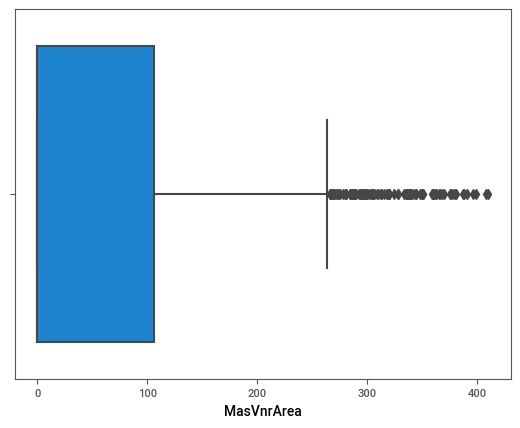

In [204]:
sns.boxplot(x=data['MasVnrArea'])

In [205]:
data['BsmtFinSF1'].median()

383.5

In [206]:
data['BsmtFinSF1'].mean()

443.6397260273973

In [207]:
data['BsmtFinSF1'].mode()

0    0
Name: BsmtFinSF1, dtype: int64

In [208]:
q1=data['BsmtFinSF1'].quantile(0.25)
q1

0.0

In [209]:
q3=data['BsmtFinSF1'].quantile(0.75)
q3

712.25

In [210]:
iqr=q3-q1
iqr

712.25

In [211]:
lower_limit=q1-1.5*iqr
lower_limit

-1068.375

In [212]:
upper_limit=q3+1.5*iqr
upper_limit

1780.625

In [213]:
data.loc[data['BsmtFinSF1']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [214]:
data.loc[data['BsmtFinSF1']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
53            20       RL    68.000000  9479.25   Pave      IR1         Low   
70            20       RL    95.000000  9479.25   Pave      IR1         Lvl   
178           20       RL    63.000000  9479.25   Pave      IR1         Lvl   
523           60       RL    71.394149  9479.25   Pave      IR1         Bnk   
898           20       RL   100.000000  9479.25   Pave      IR1         Lvl   
1182          60       RL    71.394149  9479.25   Pave      IR1         Lvl   
1298          60       RL    71.394149  9479.25   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
53      AllPub    Inside       Gtl      Veenker       Norm       Norm   
70      AllPub    Inside       Gtl        NAmes       Norm       Norm   
178     AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   
523     AllPub    Inside       Gtl      Edwards       PosN       PosN   
898     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
53       1Fam     1Story            9            5       1981          1987   
70       1Fam     1Story            7            6       1973          1973   
178      1Fam     1Story            9            5       2008          2009   
523      1Fam     2Story           10            5       2007          2008   
898      1Fam     1Story            9            5       2009          2010   
1182     1Fam     2Story           10            5       1996          1996   
1298     1Fam     2Story           10            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
53       Gable  WdShngl     WdShing     Wd Shng    0.000000        Gd   
70       Gable  CompShg     Plywood     Plywood  103.685262        TA   
178        Hip  CompShg     VinylSd     VinylSd  103.685262        Ex   
523        Hip  CompShg     CemntBd     CmentBd  103.685262        Ex   
898        Hip  CompShg     VinylSd     VinylSd  103.685262        Ex   
1182       Hip  CompShg     Wd Sdng     ImStucc    0.000000        Gd   
1298       Hip  ClyTile      Stucco      Stucco  103.685262        Ex   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
53          TA     CBlock       Ex       TA           Gd          GLQ   
70          Gd     CBlock       Gd       TA           Gd          ALQ   
178         TA      PConc       Ex       TA           No          GLQ   
523         TA      PConc       Ex       TA           Gd          GLQ   
898         TA      PConc       Ex       TA           Gd          GLQ   
1182        TA      PConc       Ex       TA           Av          GLQ   
1298        TA      PConc       Ex       TA           Gd          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
53          1810          Unf           0         32         1842    GasA   
70          1880          Unf           0        343         2223    GasA   
178         1904          Unf           0        312         2216    GasA   
523         2260          Unf           0        878         3138    GasA   
898         2188          Unf           0        142         2330    GasA   
1182        2096          Unf           0        300         2396    GasA   
1298        5644          Unf           0        466         6110    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
53          Gd          Y      SBrkr      1842         0             0   
70          Ex          Y      SBrkr      2223         0             0   
178         Ex          Y      SBrkr      2234         0             0   
523         Ex          Y      SBrkr      3138      1538             0  

In [215]:
data.loc[data['BsmtFinSF1']>upper_limit,'BsmtFinSF1']=data['BsmtFinSF1'].median()

In [216]:
data.loc[data['BsmtFinSF1']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='BsmtFinSF1'>

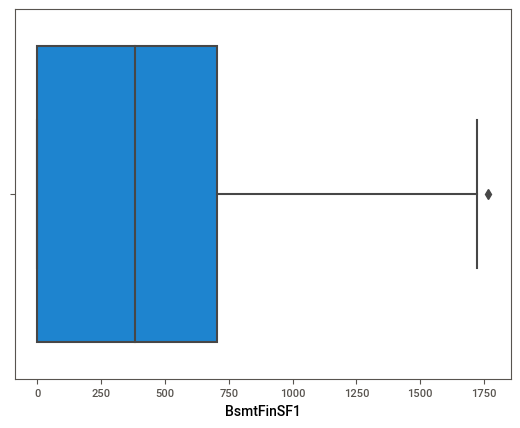

In [217]:
sns.boxplot(x=data['BsmtFinSF1'])

In [218]:
data['BsmtFinSF2'].median()

0.0

In [219]:
data['BsmtFinSF2'].mean()

46.54931506849315

In [220]:
data['BsmtFinSF2'].mode()

0    0
Name: BsmtFinSF2, dtype: int64

In [221]:
q1=data['BsmtFinSF2'].quantile(0.25)
q1

0.0

In [222]:
q3=data['BsmtFinSF2'].quantile(0.75)
q3

0.0

In [223]:
iqr=q3-q1
iqr

0.0

In [224]:
lower_limit=q1-1.5*iqr
lower_limit

0.0

In [225]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [226]:
data.loc[data['BsmtFinSF2']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [227]:
data.loc[data['BsmtFinSF2']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
7             60       RL         69.0  10382.00   Pave      IR1         Lvl   
24            20       RL         69.0   8246.00   Pave      IR1         Lvl   
26            20       RL         60.0   9478.50   Pave      Reg         Lvl   
42            85       RL         69.0   9180.00   Pave      IR1         Lvl   
43            20       RL         69.0   9200.00   Pave      IR1         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1439          60       RL         80.0  11584.00   Pave      Reg         Lvl   
1445          85       RL         70.0   8400.00   Pave      Reg         Lvl   
1456          20       RL         85.0   9479.25   Pave      Reg         Lvl   
1458          20       RL         68.0   9717.00   Pave      Reg         Lvl   
1459          20       RL         75.0   9937.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
7       AllPub    Corner       Gtl       NWAmes       PosN       Norm   
24      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
26      AllPub    Corner       Gtl        NAmes       Norm       Norm   
42      AllPub   CulDSac       Gtl      SawyerW       Norm       Norm   
43      AllPub   CulDSac       Gtl      CollgCr       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1439    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1445    AllPub    Inside       Gtl       Sawyer       Norm       Norm   
1456    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1459    AllPub    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
7        1Fam     2Story            7            6       1973          1973   
24       1Fam     1Story            5            5       1968          2001   
26       1Fam     1Story            5            7       1951          2000   
42       1Fam     SFoyer            5            7       1983          1983   
43       1Fam     1Story            5            6       1975          1980   
...       ...        ...          ...          ...        ...           ...   
1439     1Fam       SLvl            7            6       1979          1979   
1445     1Fam     SFoyer            6            5       1966          1966   
1456     1Fam     1Story            6            6       1978          1988   
1458     1Fam     1Story            5            6       1950          1996   
1459     1Fam     1Story            5            6       1965          1965   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
7        Gable  CompShg     HdBoard     HdBoard       240.0        TA   
24       Gable  CompShg     Plywood     Plywood         0.0        TA   
26       Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
42       Gable  CompShg     HdBoard     HdBoard         0.0        TA   
43         Hip  CompShg     VinylSd     VinylSd         0.0        TA   
...        ...      ...         ...         ...         ...       ...   
1439       Hip  CompShg     HdBoard     HdBoard        96.0        TA   
1445     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1456     Gable  CompShg     Plywood     Plywood       119.0        TA   
1458       Hip  CompShg     MetalSd     MetalSd         0.0        TA   
1459     Gable  CompShg     HdBoard     HdBoard         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
7           TA     CBlock       Gd       TA           Mn          ALQ   
24          Gd     CBlock       TA       TA           Mn          Rec   
26          TA     CBlock       TA       TA           Mn          BLQ   
42          TA     CBlock       Gd       TA       

In [228]:
data.loc[data['BsmtFinSF2']>upper_limit,'BsmtFinSF2']=data['BsmtFinSF2'].median()

In [229]:
data.loc[data['BsmtFinSF2']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='BsmtFinSF2'>

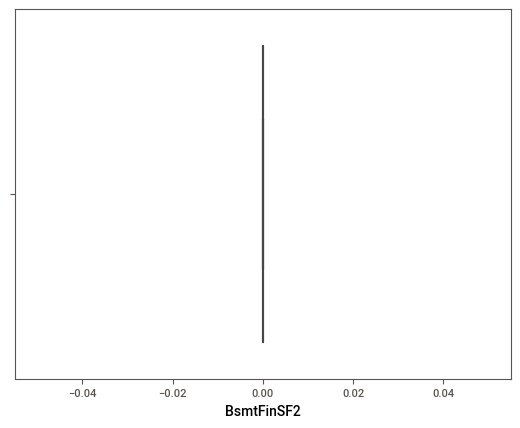

In [230]:
sns.boxplot(x=data['BsmtFinSF2'])

In [231]:
data['BsmtUnfSF'].median()

477.5

In [232]:
data['BsmtUnfSF'].mean()

567.2404109589041

In [233]:
data['BsmtUnfSF'].mode()

0    0
Name: BsmtUnfSF, dtype: int64

In [234]:
q1=data['BsmtUnfSF'].quantile(0.25)
q1

223.0

In [235]:
q3=data['BsmtUnfSF'].quantile(0.75)
q3

808.0

In [236]:
iqr=q3-q1
iqr

585.0

In [237]:
lower_limit=q1-1.5*iqr
lower_limit

-654.5

In [238]:
upper_limit=q3+1.5*iqr
upper_limit

1685.5

In [239]:
data.loc[data['BsmtUnfSF']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [240]:
data.loc[data['BsmtUnfSF']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
22            20       RL    75.000000   9742.00   Pave      Reg         Lvl   
78            90       RL    72.000000  10778.00   Pave      Reg         Lvl   
137           90       RL    82.000000  11070.00   Pave      Reg         Lvl   
169           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
224           20       RL   103.000000   9479.25   Pave      Reg         Lvl   
238           20       RL    93.000000   9479.25   Pave      Reg         Lvl   
278           20       RL   107.000000   9479.25   Pave      Reg         Lvl   
350          120       RL    68.000000   7820.00   Pave      IR1         Lvl   
477           60       RL   105.000000   9479.25   Pave      Reg         Lvl   
496           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
552           20       RL    87.000000  11146.00   Pave      IR1         Lvl   
581           20       RL    98.000000   9479.25   Pave      Reg         Lvl   
618           20       RL    90.000000   9479.25   Pave      Reg         Lvl   
678           20       RL    80.000000   9479.25   Pave      IR1         Lvl   
768           20       RL    70.000000   9100.00   Pave      Reg         Lvl   
774           20       RL    71.394149   9479.25   Pave      Reg         Lvl   
798           60       RL   104.000000   9479.25   Pave      Reg         Lvl   
803           60       RL   107.000000   9479.25   Pave      Reg         Lvl   
843           90       RL    80.000000   8000.00   Pave      Reg         Lvl   
928           20       RL    69.000000   9479.25   Pave      Reg         Lvl   
932           20       RL    84.000000   9479.25   Pave      IR1         Lvl   
963           20       RL    71.394149   9479.25   Pave      IR1         Lvl   
1008          20       RL    43.000000   9479.25   Pave      IR1         Lvl   
1046          60       RL    85.000000   9479.25   Pave      IR1         Lvl   
1166          20       RL    64.000000  10475.00   Pave      IR1         Lvl   
1241          20       RL    83.000000   9849.00   Pave      Reg         Lvl   
1267          20       RL    89.000000   9479.25   Pave      IR1         HLS   
1318          20       RL    69.000000   9479.25   Pave      IR2         Lvl   
1324          20       RL    75.000000   9986.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
22      AllPub    Inside       Gtl      CollgCr       Norm       Norm   
78      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
137     AllPub    Inside       Gtl      Mitchel       Norm       Norm   
169     AllPub    Corner       Gtl       Timber       Norm       Norm   
224     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
238     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
278     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
350     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
477     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
496     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
552     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
581     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
618     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
678     AllPub    Inside       Gtl      StoneBr       Norm       Norm   
768     AllPub    Inside       Gtl      CollgCr       Norm       Norm   
774     AllPub    Corner       Gtl      NridgHt       Norm       Norm   
798     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
803     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
843     AllPub    Corner       Gtl        NAmes     Artery       Norm   
928     AllPub    Inside       Gtl      CollgCr       Norm       Norm   
932     AllPub    Corner       Gtl      Somerst       RRNn       Norm   

In [241]:
data.loc[data['BsmtUnfSF']>upper_limit,'BsmtUnfSF']=data['BsmtUnfSF'].median()

In [242]:
data.loc[data['BsmtUnfSF']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='BsmtUnfSF'>

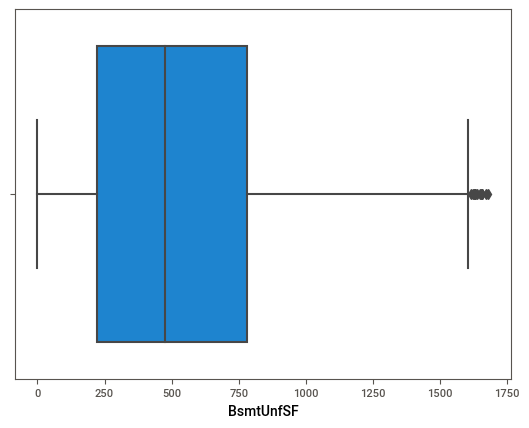

In [243]:
sns.boxplot(x=data['BsmtUnfSF'])

In [244]:
data['TotalBsmtSF'].median()

991.5

In [245]:
data['TotalBsmtSF'].mean()

1057.4294520547944

In [246]:
q1=data['TotalBsmtSF'].quantile(0.25)
q1

795.75

In [247]:
q3=data['TotalBsmtSF'].quantile(0.75)
q3

1298.25

In [248]:
iqr=q3-q1
iqr

502.5

In [249]:
lower_limit=q1-1.5*iqr
lower_limit

42.0

In [250]:
upper_limit=q3+1.5*iqr
upper_limit

2052.0

In [251]:
data.loc[data['TotalBsmtSF']<lower_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
17            90       RL         72.0  10791.00   Pave      Reg         Lvl   
39            90       RL         65.0   9478.50   Pave      Reg         Lvl   
90            20       RL         60.0   9478.50   Pave      Reg         Lvl   
102           90       RL         64.0   9478.50   Pave      Reg         Bnk   
156           20       RL         60.0   9478.50   Pave      Reg         Lvl   
182           20       RL         60.0   9060.00   Pave      Reg         Lvl   
259           20       RM         70.0   9479.25   Pave      Reg         Lvl   
342           90       RL         69.0   8544.00   Pave      Reg         Lvl   
362           85       RL         64.0   9478.50   Pave      Reg         Lvl   
371           50       RL         80.0   9479.25   Pave      Reg         Lvl   
392           20       RL         69.0   8339.00   Pave      IR1         Lvl   
520           50       RL         60.0  10800.00   Pave      Reg         Lvl   
532           20       RL         60.0   9478.50   Pave      Reg         Lvl   
533           20       RL         50.0   9478.50   Pave      Reg         Low   
553           20       RL         67.0   8777.00   Pave      Reg         Lvl   
646           20       RL         60.0   9478.50   Pave      Reg         Lvl   
705           50       RM         70.0   9478.50   Pave      Reg         Lvl   
736           90       RL         60.0   8544.00   Pave      Reg         Lvl   
749           50       RL         50.0   8405.00   Pave      Reg         Lvl   
778           90       RH         60.0   8400.00   Pave      Reg         Lvl   
868           60       RL         69.0   9479.25   Pave      IR2         Lvl   
894           90       RL         64.0   9478.50   Pave      Reg         Bnk   
897           90       RL         64.0   9478.50   Pave      Reg         Lvl   
984           90       RL         75.0  10125.00   Pave      Reg         Lvl   
1000          20       RL         74.0  10206.00   Pave      Reg         Lvl   
1011          90       RL         75.0   9825.00   Pave      Reg         Lvl   
1035          20       RL         69.0  11500.00   Pave      IR1         Lvl   
1045          20       RL         69.0   9479.25   Pave      IR1         Lvl   
1048          20       RL        100.0   9479.25   Pave      Reg         Lvl   
1049          20       RL         60.0  11100.00   Pave      Reg         Low   
1090          90       RL         60.0   8544.00   Pave      Reg         Lvl   
1179          20       RL         77.0   8335.00   Pave      Reg         Lvl   
1216          90       RM         68.0   8930.00   Pave      Reg         Lvl   
1218          50       RM         52.0   9478.50   Pave      Reg         Lvl   
1232          90       RL         70.0   9842.00   Pave      Reg         Lvl   
1321          20       RL         69.0   9478.50   Pave      IR1         Lvl   
1412          90       RL         60.0   9478.50   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
17      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
39      AllPub    Inside       Gtl      Edwards       Norm       Norm   
90      AllPub    Inside       Gtl        NAmes       Norm       Norm   
102     AllPub    Inside       Gtl      SawyerW       Norm       Norm   
156     AllPub    Inside       Gtl        NAmes       Norm       Norm   
182     AllPub    Inside       Gtl      Edwards     Artery       Norm   
259     AllPub    Inside       Gtl      OldTown       Norm       Norm   
342     AllPub    Inside       Gtl        NAmes       Norm       Norm   
362     AllPub    Corner       Gtl      Edwards       Norm       Norm   
371     AllPub    Inside       Gtl      ClearCr      Feedr       Norm   
392     AllPub    Inside       Gtl        NAmes       Norm       Norm   
520     AllPub    Inside       Gtl      OldTown       Norm       Norm   
532     AllPub  

In [252]:
data.loc[data['TotalBsmtSF']<lower_limit,'TotalBsmtSF']=data['TotalBsmtSF'].median()

In [253]:
data.loc[data['TotalBsmtSF']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [254]:
data.loc[data['TotalBsmtSF']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
70            20       RL    95.000000   9479.25   Pave      IR1         Lvl   
178           20       RL    63.000000   9479.25   Pave      IR1         Lvl   
224           20       RL   103.000000   9479.25   Pave      Reg         Lvl   
278           20       RL   107.000000   9479.25   Pave      Reg         Lvl   
313           20       RL    71.394149   9479.25   Pave      IR3         Low   
332           20       RL    85.000000  10655.00   Pave      IR1         Lvl   
440           20       RL   105.000000   9479.25   Pave      Reg         Lvl   
477           60       RL   105.000000   9479.25   Pave      Reg         Lvl   
496           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
523           60       RL    71.394149   9479.25   Pave      IR1         Bnk   
654           20       RL    91.000000  10437.00   Pave      IR1         Lvl   
664           20       RL    49.000000   9479.25   Pave      IR2         Lvl   
691           60       RL   104.000000   9479.25   Pave      IR1         Lvl   
825           20       RL    71.394149   9479.25   Pave      Reg         Lvl   
888           20       RL    95.000000   9479.25   Pave      IR1         Lvl   
898           20       RL   100.000000   9479.25   Pave      IR1         Lvl   
1044          20       RL    80.000000   9600.00   Pave      Reg         Lvl   
1182          60       RL    71.394149   9479.25   Pave      IR1         Lvl   
1205          20       RL    90.000000   9479.25   Pave      IR1         Lvl   
1223          20       RL    89.000000  10680.00   Pave      Reg         Lvl   
1243          20       RL   107.000000   9479.25   Pave      Reg         Lvl   
1250          20       RL    93.000000  11160.00   Pave      Reg         Lvl   
1298          60       RL    71.394149   9479.25   Pave      IR3         Bnk   
1373          20       RL    69.000000  11400.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
70      AllPub    Inside       Gtl        NAmes       Norm       Norm   
178     AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   
224     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
278     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
313     AllPub    Inside       Sev       Timber       Norm       Norm   
332     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
440     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
477     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
496     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
523     AllPub    Inside       Gtl      Edwards       PosN       PosN   
654     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
664     AllPub   CulDSac       Gtl      Somerst       RRAn       Norm   
691     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
825     AllPub    Inside       Gtl      NridgHt       PosN       PosN   
888     AllPub    Inside       Mod        NAmes       Norm       Norm   
898     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
1044    AllPub    Inside       Gtl       NWAmes       PosN       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1205    AllPub   CulDSac       Gtl      SawyerW       Norm       Norm   
1223    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1243    AllPub    Inside       Gtl      NridgHt       Norm       Norm   
1250    AllPub    Corner       Gtl        NAmes       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   
1373    AllPub    Inside       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
70       1Fam     1Story            7            6       1973          1973   
178      1Fam     1St

In [255]:
data.loc[data['TotalBsmtSF']>upper_limit,'TotalBsmtSF']=data['TotalBsmtSF'].median()

In [256]:
data.loc[data['TotalBsmtSF']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='TotalBsmtSF'>

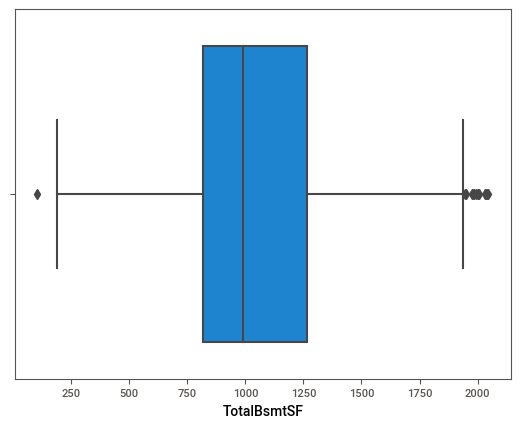

In [257]:
sns.boxplot(x=data['TotalBsmtSF'])

In [258]:
data['1stFlrSF'].median()

1087.0

In [259]:
data['1stFlrSF'].mean()

1162.626712328767

In [260]:
q1=data['1stFlrSF'].quantile(0.25)
q1

882.0

In [261]:
q3=data['1stFlrSF'].quantile(0.75)
q3

1391.25

In [262]:
iqr=q3-q1
iqr

509.25

In [263]:
lower_limit=q1-1.5*iqr
lower_limit

118.125

In [264]:
upper_limit=q3+1.5*iqr
upper_limit

2155.125

In [265]:
data.loc[data['1stFlrSF']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [266]:
data.loc[data['1stFlrSF']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
66            20       RL    69.000000   9479.25   Pave      Reg         Lvl   
70            20       RL    95.000000   9479.25   Pave      IR1         Lvl   
113           20       RL    69.000000   9479.25   Pave      Reg         Bnk   
175           20       RL    84.000000   9479.25   Pave      Reg         Lvl   
178           20       RL    63.000000   9479.25   Pave      IR1         Lvl   
224           20       RL   103.000000   9479.25   Pave      Reg         Lvl   
440           20       RL   105.000000   9479.25   Pave      Reg         Lvl   
496           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
523           60       RL    71.394149   9479.25   Pave      IR1         Bnk   
529           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
691           60       RL   104.000000   9479.25   Pave      IR1         Lvl   
888           20       RL    95.000000   9479.25   Pave      IR1         Lvl   
898           20       RL   100.000000   9479.25   Pave      IR1         Lvl   
1024          20       RL    69.000000   9479.25   Pave      IR1         Lvl   
1044          20       RL    80.000000   9600.00   Pave      Reg         Lvl   
1182          60       RL    71.394149   9479.25   Pave      IR1         Lvl   
1205          20       RL    90.000000   9479.25   Pave      IR1         Lvl   
1298          60       RL    71.394149   9479.25   Pave      IR3         Bnk   
1346          20       RL    69.000000   9479.25   Pave      IR2         Lvl   
1373          20       RL    69.000000  11400.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
66      AllPub    Inside       Gtl        NAmes       PosA       Norm   
70      AllPub    Inside       Gtl        NAmes       Norm       Norm   
113     AllPub    Corner       Gtl      Crawfor       Norm       Norm   
175     AllPub    Corner       Gtl      Edwards       Norm       Norm   
178     AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   
224     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
440     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
496     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
523     AllPub    Inside       Gtl      Edwards       PosN       PosN   
529     AllPub   CulDSac       Gtl      Crawfor       Norm       Norm   
691     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
888     AllPub    Inside       Mod        NAmes       Norm       Norm   
898     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
1024    AllPub    Corner       Gtl       Timber       Norm       Norm   
1044    AllPub    Inside       Gtl       NWAmes       PosN       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1205    AllPub   CulDSac       Gtl      SawyerW       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   
1346    AllPub   CulDSac       Gtl       NWAmes       PosN       Norm   
1373    AllPub    Inside       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
66       1Fam     1Story            7            5       1970          1989   
70       1Fam     1Story            7            6       1973          1973   
113      1Fam     1Story            6            5       1953          1953   
175      1Fam     1Story            6            7       1950          2001   
178      1Fam     1Story            9            5       2008          2009   
224      1Fam     1Story           10            5       2003          2003   
440      1Fam     1Story           10            5       2008          2008   
496      1Fam     1Story            8            5       1992          1993   
523      1Fam     2Story           10            5       2007          2008   
5

In [267]:
data.loc[data['1stFlrSF']>upper_limit,'1stFlrSF']=data['1stFlrSF'].median()

In [268]:
data.loc[data['1stFlrSF']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='1stFlrSF'>

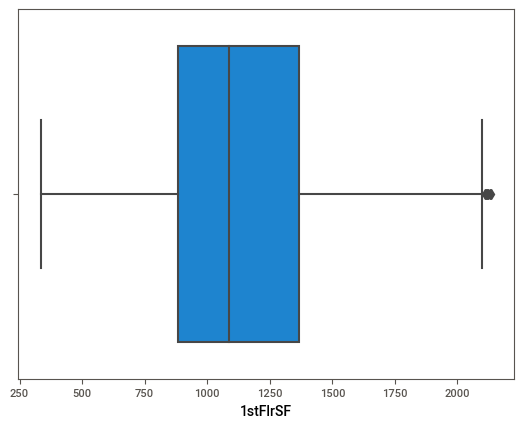

In [269]:
sns.boxplot(x=data['1stFlrSF'])

In [270]:
data['2ndFlrSF'].median()

0.0

In [271]:
data['2ndFlrSF'].mean()

346.99246575342465

In [272]:
q1=data['2ndFlrSF'].quantile(0.25)
q1

0.0

In [273]:
q3=data['2ndFlrSF'].quantile(0.75)
q3

728.0

In [274]:
iqr=q3-q1
iqr

728.0

In [275]:
lower_limit=q1-1.5*iqr
lower_limit

-1092.0

In [276]:
upper_limit=q3+1.5*iqr
upper_limit

1820.0

In [277]:
data.loc[data['2ndFlrSF']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [278]:
data.loc[data['2ndFlrSF']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
691           60       RL   104.000000  9479.25   Pave      IR1         Lvl   
1182          60       RL    71.394149  9479.25   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
691     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
691      1Fam     2Story           10            6       1994          1995   
1182     1Fam     2Story           10            5       1996          1996   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
691      Gable  WdShngl     HdBoard     HdBoard  103.685262        Ex   
1182       Hip  CompShg     Wd Sdng     ImStucc    0.000000        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
691         TA      PConc       Ex       TA           Gd          GLQ   
1182        TA      PConc       Ex       TA           Av          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
691       1455.0          Unf           0      989.0       991.75    GasA   
1182       383.5          Unf           0      300.0       991.75    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
691         Ex          Y      SBrkr      1087      1872             0   
1182        Ex          Y      SBrkr      1087      2065             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
691        4316             0             1         3         1             4   
1182       4476             1             0         3         1             4   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
691              1          Ex            10        Typ           2   
1182             1          Ex            10        Typ           2   

     GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
691      Attchd       1994.0          Fin           3         832         TA   
1182     Attchd       1996.0          Fin           3         813         TA   

     GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
691          TA          Y         382           50              0          0   
1182         TA          Y         171           78              0          0   

      ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
691             0         0        0       1    2007       WD        Normal   
1182            0       555        0       7    2007       WD       Abnorml   

      SalePrice  
691      755000  
1182     745000

In [279]:
data.loc[data['2ndFlrSF']>upper_limit,'2ndFlrSF']=data['2ndFlrSF'].median()

<Axes: xlabel='2ndFlrSF'>

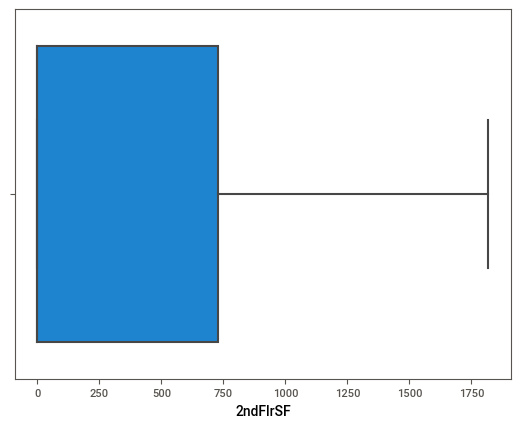

In [280]:
sns.boxplot(x=data['2ndFlrSF'])

In [281]:
data['LowQualFinSF'].median()

0.0

In [282]:
data['LowQualFinSF'].mean()

5.844520547945206

In [283]:
q1=data['LowQualFinSF'].quantile(0.25)
q1

0.0

In [284]:
q3=data['LowQualFinSF'].quantile(0.75)
q3

0.0

In [285]:
iqr=q3-q1
iqr

0.0

In [286]:
lower_limit=q1-1.5*iqr
lower_limit

0.0

In [287]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [288]:
data.loc[data['LowQualFinSF']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [289]:
data.loc[data['LowQualFinSF']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
51            50       RM    52.000000   9478.50   Pave      Reg         Lvl   
88            50  C (all)   105.000000   8470.00   Pave      IR1         Lvl   
125           50       RM    60.000000   9478.50   Pave      Reg         Lvl   
170           50       RM    69.000000   9479.25   Pave      IR1         Lvl   
185           75       RM    90.000000   9479.25   Pave      IR2         Lvl   
187           50       RL    60.000000  10410.00   Pave      Reg         Lvl   
197           75       RL    71.394149   9479.25   Pave      Reg         Lvl   
198           75       RM    92.000000   9478.50   Pave      Reg         Lvl   
263           50       RM    50.000000   9478.50   Pave      Reg         Lvl   
267           75       RL    60.000000   8400.00   Pave      Reg         Bnk   
406           50       RL    51.000000  10480.00   Pave      Reg         Lvl   
589           40       RM    50.000000   9100.00   Pave      Reg         Lvl   
635           50       RH    60.000000  10896.00   Pave      Reg         Bnk   
729           30       RM    52.000000   9478.50   Pave      Reg         Lvl   
829           50       FV    69.863699   9478.50   Pave      Reg         Lvl   
831           50       FV    69.863699   9478.50   Pave      Reg         Lvl   
868           60       RL    69.000000   9479.25   Pave      IR2         Lvl   
873           40       RL    60.000000   9479.25   Pave      Reg         Lvl   
883           75       RL    60.000000   9478.50   Pave      Reg         Bnk   
945           50       RM    98.000000   8820.00   Pave      Reg         Lvl   
1009          50       RL    60.000000   9478.50   Pave      Reg         Lvl   
1031          75       RL   102.000000   9479.25   Pave      Reg         Lvl   
1173          50       RL    71.394149   9479.25   Pave      IR1         Bnk   
1349          70       RM    50.000000   9478.50   Pave      Reg         Lvl   
1364          50       FV    69.863699   9478.50   Pave      Reg         Lvl   
1440          70       RL    79.000000  11526.00   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
51      AllPub    Inside       Gtl      BrkSide       Norm       Norm   
88      AllPub    Corner       Gtl       IDOTRR      Feedr      Feedr   
125     AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
170     AllPub    Inside       Gtl      OldTown      Feedr       Norm   
185     AllPub    Inside       Gtl      OldTown     Artery       Norm   
187     AllPub    Inside       Gtl      OldTown       Norm       Norm   
197     AllPub    Corner       Gtl        NAmes     Artery       Norm   
198     AllPub    Corner       Gtl      OldTown       Norm       Norm   
263     AllPub    Corner       Gtl      OldTown       Norm       Norm   
267     AllPub    Inside       Mod        SWISU       Norm       Norm   
406     AllPub    Inside       Gtl        SWISU       Norm       Norm   
589     AllPub    Inside       Gtl      BrkSide       RRAn      Feedr   
635     AllPub    Inside       Gtl        SWISU      Feedr       Norm   
729     AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
829     AllPub    Inside       Gtl      Somerst       Norm       Norm   
831     AllPub    Inside       Gtl      Somerst       Norm       Norm   
868     AllPub    Corner       Gtl      Gilbert      Feedr       Norm   
873     AllPub    Inside       Gtl        NAmes       Norm       Norm   
883     AllPub    Inside       Gtl        SWISU       Norm       Norm   
945     AllPub    Corner       Gtl      OldTown       Norm       Norm   
1009    AllPub    Inside       Gtl        SWISU       Norm       Norm   
1031    AllPub    Corner       Gtl        SWISU       Norm       Norm   
1173    AllPub    Inside       Gtl      ClearCr       Norm       Norm   
1349    AllPub    Inside       Gtl      OldTown       Norm       Norm   
1364    AllPub    In

In [290]:
data.loc[data['LowQualFinSF']>upper_limit,'LowQualFinSF']=data['LowQualFinSF'].median()

<Axes: xlabel='LowQualFinSF'>

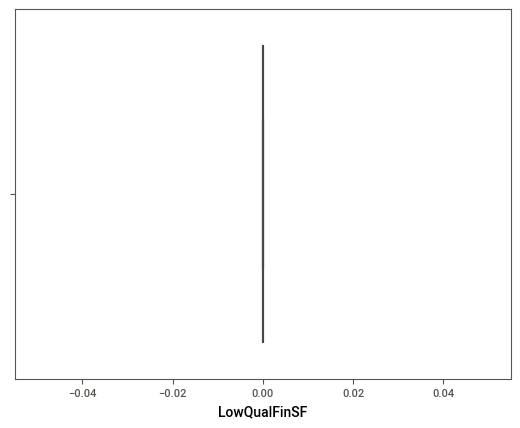

In [291]:
sns.boxplot(x=data['LowQualFinSF'])

In [292]:
data['GrLivArea'].median()

1464.0

In [293]:
data['GrLivArea'].mean()

1515.463698630137

In [294]:
q1=data['GrLivArea'].quantile(0.25)
q1

1129.5

In [295]:
q3=data['GrLivArea'].quantile(0.75)
q3

1776.75

In [296]:
iqr=q3-q1
iqr

647.25

In [297]:
lower_limit=q1-1.5*iqr
lower_limit

158.625

In [298]:
upper_limit=q3+1.5*iqr
upper_limit

2747.625

In [299]:
data.loc[data['GrLivArea']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [300]:
data.loc[data['GrLivArea']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
58            60       RL    66.000000   9479.25   Pave      IR2         HLS   
118           60       RL    90.000000   9479.25   Pave      Reg         Lvl   
185           75       RM    90.000000   9479.25   Pave      IR2         Lvl   
197           75       RL    71.394149   9479.25   Pave      Reg         Lvl   
231           60       RL    71.394149   9479.25   Pave      IR1         Lvl   
304           75       RM    87.000000   9479.25   Pave      Reg         Lvl   
324           80       RL    96.000000  11275.00   Pave      Reg         Lvl   
496           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
523           60       RL    71.394149   9479.25   Pave      IR1         Bnk   
583           75       RM    75.000000   9479.25   Pave      Reg         Lvl   
608           70       RL    78.000000   9479.25   Pave      Reg         HLS   
635           50       RH    60.000000  10896.00   Pave      Reg         Bnk   
691           60       RL   104.000000   9479.25   Pave      IR1         Lvl   
769           60       RL    47.000000   9479.25   Pave      IR2         HLS   
798           60       RL   104.000000   9479.25   Pave      Reg         Lvl   
803           60       RL   107.000000   9479.25   Pave      Reg         Lvl   
961           60       RL    69.000000   9479.25   Pave      IR1         Lvl   
1024          20       RL    69.000000   9479.25   Pave      IR1         Lvl   
1031          75       RL   102.000000   9479.25   Pave      Reg         Lvl   
1046          60       RL    85.000000   9479.25   Pave      IR1         Lvl   
1142          60       RL    77.000000   9965.00   Pave      Reg         Lvl   
1169          60       RL    71.394149   9479.25   Pave      IR1         Lvl   
1173          50       RL    71.394149   9479.25   Pave      IR1         Bnk   
1175          50       RL    85.000000  10678.00   Pave      Reg         Lvl   
1182          60       RL    71.394149   9479.25   Pave      IR1         Lvl   
1268          50       RL    69.000000   9479.25   Pave      IR1         Lvl   
1298          60       RL    71.394149   9479.25   Pave      IR3         Bnk   
1312          60       RL    69.000000   9572.00   Pave      IR1         Lvl   
1328          50       RM    60.000000  10440.00   Pave      Reg         Lvl   
1353          50       RL    56.000000   9479.25   Pave      IR1         Lvl   
1386          60       RL    80.000000   9479.25   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
58      AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   
118     AllPub    Corner       Gtl      SawyerW       Norm       Norm   
185     AllPub    Inside       Gtl      OldTown     Artery       Norm   
197     AllPub    Corner       Gtl        NAmes     Artery       Norm   
231     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
304     AllPub    Inside       Gtl      OldTown       Norm       Norm   
324     AllPub    Corner       Gtl        NAmes       PosN       Norm   
496     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
523     AllPub    Inside       Gtl      Edwards       PosN       PosN   
583     AllPub    Inside       Gtl      OldTown     Artery       PosA   
608     AllPub    Inside       Mod      Crawfor       Norm       Norm   
635     AllPub    Inside       Gtl        SWISU      Feedr       Norm   
691     AllPub    Corner       Gtl      NoRidge       Norm       Norm   
769     AllPub   CulDSac       Mod      StoneBr       Norm       Norm   
798     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
803     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
961     AllPub    Corner       Gtl       NWAmes       PosN       Norm   
1024    AllPub    Corner       Gtl       Timber       Norm       Norm   
1031    AllPub    Corner       Gtl        SWISU       Norm

In [301]:
data.loc[data['GrLivArea']>upper_limit,'GrLivArea']=data['GrLivArea'].median()

In [302]:
data.loc[data['GrLivArea']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='GrLivArea'>

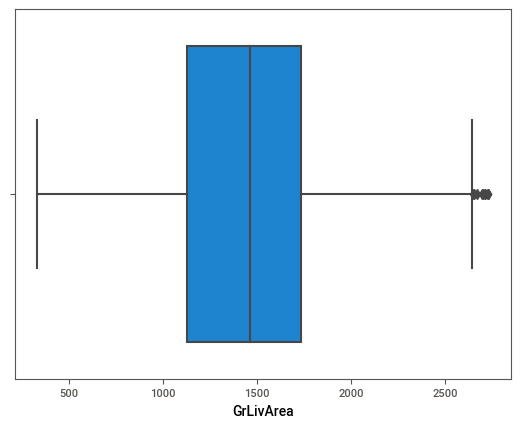

In [303]:
sns.boxplot(x=data['GrLivArea'])

In [304]:
data['BsmtFullBath'].median()

0.0

In [305]:
data['BsmtFullBath'].mean()

0.42534246575342466

In [306]:
q1=data['BsmtFullBath'].quantile(0.25)
q1

0.0

In [307]:
q3=data['BsmtFullBath'].quantile(0.75)
q3

1.0

In [308]:
iqr=q3-q1
iqr

1.0

In [309]:
lower_limit=q1-1.5*iqr
lower_limit

-1.5

In [310]:
upper_limit=q3+1.5*iqr
upper_limit

2.5

In [311]:
data.loc[data['BsmtFullBath']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
738          90       RL         60.0  10800.0   Pave      Reg         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
738    AllPub    Inside       Gtl      Edwards       Norm       Norm   Duplex   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
738     1Story            5            5       1987          1988     Gable   

    RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
738  CompShg     Plywood     Plywood         0.0        TA        TA   

    Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
738     CBlock       Gd       Gd           Gd          GLQ      1200.0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
738          Unf           0        0.0       1200.0    GasA        TA   

    CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
738          Y      SBrkr      1200         0             0       1200   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
738             3             0         3         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
738             1          TA             5        Typ           0     Attchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
738  1978.506164          Unf           0           0         TA         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
738          Y         120            0              0          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
738            0         0        0       3    2009       WD        Alloca   

     SalePrice  
738     179000

In [312]:
data.loc[data['BsmtFullBath']>upper_limit,'BsmtFullBath']=data['BsmtFullBath'].median()

<Axes: xlabel='BsmtFullBath'>

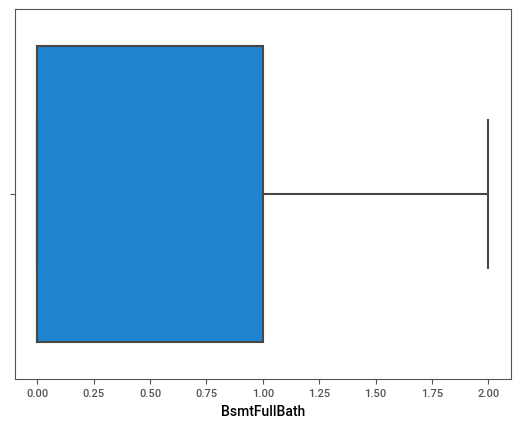

In [313]:
sns.boxplot(x=data['BsmtFullBath'])

In [314]:
data['BsmtHalfBath'].median()

0.0

In [315]:
data['BsmtHalfBath'].mean()

0.057534246575342465

In [316]:
q1=data['BsmtHalfBath'].quantile(0.25)
q1

0.0

In [317]:
q3=data['BsmtHalfBath'].quantile(0.75)
q3

0.0

In [318]:
iqr=q3-q1
iqr

0.0

In [319]:
lower_limit=q1-1.5*iqr
lower_limit

0.0

In [320]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [321]:
data.loc[data['BsmtHalfBath']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
1             20       RL    80.000000   9600.00   Pave      Reg         Lvl   
26            20       RL    60.000000   9478.50   Pave      Reg         Lvl   
33            20       RL    70.000000  10552.00   Pave      IR1         Lvl   
37            20       RL    74.000000   8532.00   Pave      Reg         Lvl   
41            20       RL    71.394149   9479.25   Pave      Reg         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1335          20       RL    80.000000   9650.00   Pave      Reg         Lvl   
1350          90       RL    91.000000   9479.25   Pave      Reg         Lvl   
1389          50       RM    60.000000   9478.50   Pave      Reg         Lvl   
1405         120       RM    44.000000   9478.50   Pave      IR1         HLS   
1415         120       RL    51.000000   9478.50   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
1       AllPub       FR2       Gtl      Veenker      Feedr       Norm   
26      AllPub    Corner       Gtl        NAmes       Norm       Norm   
33      AllPub    Inside       Gtl        NAmes       Norm       Norm   
37      AllPub    Inside       Gtl        NAmes       Norm       Norm   
41      AllPub    Inside       Gtl       Timber       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1335    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1350    AllPub    Inside       Gtl        NAmes     Artery       Norm   
1389    AllPub    Inside       Gtl      BrkSide       Norm       Norm   
1405    AllPub    Inside       Mod      Crawfor       Norm       Norm   
1415    AllPub    Inside       Gtl      Blmngtn       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1        1Fam     1Story            6            5       1976          1976   
26       1Fam     1Story            5            7       1951          2000   
33       1Fam     1Story            5            5       1959          1959   
37       1Fam     1Story            5            6       1954          1990   
41       1Fam     1Story            5            6       1959          1959   
...       ...        ...          ...          ...        ...           ...   
1335     1Fam     1Story            6            5       1977          1977   
1350   Duplex     2Story            5            5       1969          1969   
1389     1Fam     1.5Fin            6            6       1941          1950   
1405   TwnhsE     1Story            8            5       2004          2005   
1415   TwnhsE     1Story            7            5       2007          2007   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
1        Gable  CompShg     MetalSd     MetalSd    0.000000        TA   
26       Gable  CompShg     Wd Sdng     Wd Sdng    0.000000        TA   
33         Hip  CompShg     BrkFace     BrkFace    0.000000        TA   
37         Hip  CompShg     Wd Sdng     Wd Sdng  103.685262        TA   
41       Gable  CompShg     VinylSd     VinylSd    0.000000        TA   
...        ...      ...         ...         ...         ...       ...   
1335     Gable  CompShg     Plywood     Plywood  360.000000        TA   
1350     Gable  CompShg     MetalSd     MetalSd  368.000000        TA   
1389     Gable  CompShg     Wd Sdng     Wd Sdng    0.000000        TA   
1405       Hip  CompShg     CemntBd     CmentBd  174.000000        Gd   
1415       Hip  CompShg     VinylSd     VinylSd  130.000000        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
1           TA     CBlock       Gd       TA           Gd          ALQ   
26          TA     CBlock       TA       TA           Mn          BLQ   
33          TA     CBlock       TA       TA           No          Rec   
37          TA     CBlock       TA       TA       

In [322]:
data.loc[data['BsmtHalfBath']>upper_limit,'BsmtHalfBath']=data['BsmtHalfBath'].median()

<Axes: xlabel='BsmtHalfBath'>

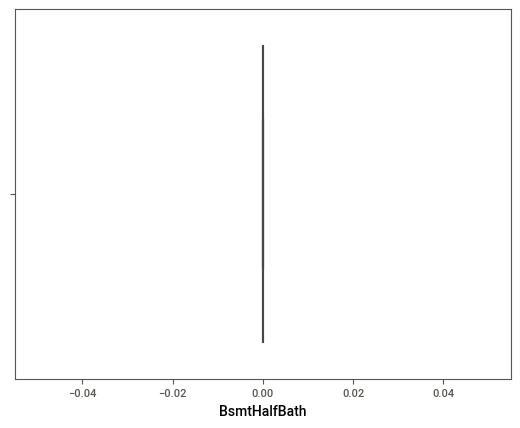

In [323]:
sns.boxplot(x=data['BsmtHalfBath'])

In [324]:
data['BedroomAbvGr'].median()

3.0

In [325]:
data['BedroomAbvGr'].mean()

2.8664383561643834

In [326]:
q1=data['BedroomAbvGr'].quantile(0.25)
q1

2.0

In [327]:
q3=data['BedroomAbvGr'].quantile(0.75)
q3

3.0

In [328]:
iqr=q3-q1
iqr

1.0

In [329]:
lower_limit=q1-1.5*iqr
lower_limit

0.5

In [330]:
upper_limit=q3+1.5*iqr
upper_limit

4.5

In [331]:
data.loc[data['BedroomAbvGr']<lower_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
53            20       RL         68.0   9479.25   Pave      IR1         Low   
189          120       RL         41.0   9478.50   Pave      Reg         Lvl   
634           90       RL         64.0   9478.50   Pave      Reg         Lvl   
1163          90       RL         60.0   9479.25   Pave      Reg         Lvl   
1213          80       RL         69.0  10246.00   Pave      IR1         Lvl   
1270          40       RL         69.0   9479.25   Pave      Reg         Low   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
53      AllPub    Inside       Gtl      Veenker       Norm       Norm   
189     AllPub    Inside       Gtl      StoneBr       Norm       Norm   
634     AllPub    Inside       Gtl      OldTown       Norm       Norm   
1163    AllPub    Inside       Gtl       Sawyer      Feedr       Norm   
1213    AllPub   CulDSac       Gtl       Sawyer       Norm       Norm   
1270    AllPub    Inside       Sev      ClearCr       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
53       1Fam     1Story            9            5       1981          1987   
189    TwnhsE     1Story            8            5       2001          2002   
634    Duplex     SFoyer            6            5       1980          1980   
1163   Duplex     SFoyer            4            4       1969          1969   
1213     1Fam       SLvl            4            5       1965          2001   
1270     1Fam     1Story            7            6       1979          1979   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
53       Gable  WdShngl     WdShing     Wd Shng         0.0        Gd   
189      Gable  CompShg     CemntBd     CmentBd         0.0        Gd   
634      Gable  CompShg     Plywood     Plywood         0.0        TA   
1163     Gable  CompShg     Plywood     Plywood         0.0        TA   
1213     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1270      Shed  WdShake     Plywood     Plywood         0.0        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
53          TA     CBlock       Ex       TA           Gd          GLQ   
189         TA      PConc       Ex       TA           Av          GLQ   
634         TA     CBlock       TA       TA           No          GLQ   
1163        TA     CBlock       Gd       TA           Av          GLQ   
1213        Gd     CBlock       TA       Gd           Av          GLQ   
1270        TA      PConc       Gd       TA           Gd          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
53         383.5          Unf           0       32.0       1842.0    GasA   
189       1153.0          Unf           0      440.0       1593.0    GasA   
634       1056.0          Unf           0        0.0       1056.0    GasA   
1163      1198.0          Unf           0        0.0       1198.0    GasA   
1213       648.0          Unf           0        0.0        648.0    GasA   
1270      1258.0          Unf           0       74.0       1332.0    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
53          Gd          Y      SBrkr      1842         0             0   
189         Ex          Y      SBrkr      1593         0             0   
634         Gd          Y      SBrkr      1056         0             0   
1163        TA          Y      SBrkr      1258         0             0   
1213        Ex          Y      SBrkr       960         0             0   
1270        TA          Y      SBrkr      1332       192             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
53         1842             2             0         0         1             0   
189        1593             1             0         1         1             0   
634        1056             2             0         0

In [332]:
data.loc[data['BedroomAbvGr']<lower_limit,'BedroomAbvGr']=data['BedroomAbvGr'].mean()

In [333]:
data.loc[data['BedroomAbvGr']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
118           60       RL         90.0   9479.25   Pave      Reg         Lvl   
137           90       RL         82.0  11070.00   Pave      Reg         Lvl   
144           90       RM         70.0   9100.00   Pave      Reg         Lvl   
198           75       RM         92.0   9478.50   Pave      Reg         Lvl   
291           50       RL         55.0   9478.50   Pave      Reg         Bnk   
324           80       RL         96.0  11275.00   Pave      Reg         Lvl   
328           75       RL         69.0   9479.25   Pave      IR1         Bnk   
330           90       RL         69.0  10624.00   Pave      IR1         Lvl   
386           50       RL         58.0   8410.00   Pave      Reg         Lvl   
570           90       RL         74.0   9479.25   Pave      IR1         Lvl   
628           60       RL         70.0  11606.00   Pave      IR1         HLS   
635           50       RH         60.0  10896.00   Pave      Reg         Bnk   
789           60       RL         69.0   9479.25   Pave      IR1         Low   
843           90       RL         80.0   8000.00   Pave      Reg         Lvl   
848           50       RL         75.0   9479.25   Pave      IR2         Bnk   
883           75       RL         60.0   9478.50   Pave      Reg         Bnk   
897           90       RL         64.0   9478.50   Pave      Reg         Lvl   
910           90       RL         80.0  11600.00   Pave      Reg         Lvl   
1030          50       RH         69.0   9478.50   Pave      Reg         Lvl   
1031          75       RL        102.0   9479.25   Pave      Reg         Lvl   
1032          60       RL         69.0   9479.25   Pave      IR1         Lvl   
1062          50       RM         85.0   9479.25   Pave      Reg         Lvl   
1068          50       RM         42.0   9478.50   Pave      Reg         Lvl   
1132          70       RM         90.0   9900.00   Pave      Reg         Lvl   
1262          50       RL         69.0  11250.00   Pave      Reg         Lvl   
1328          50       RM         60.0  10440.00   Pave      Reg         Lvl   
1350          90       RL         91.0   9479.25   Pave      Reg         Lvl   
1386          60       RL         80.0   9479.25   Pave      IR1         Lvl   
1387          50       RM         60.0   8520.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
118     AllPub    Corner       Gtl      SawyerW       Norm       Norm   
137     AllPub    Inside       Gtl      Mitchel       Norm       Norm   
144     AllPub    Inside       Gtl       Sawyer       RRAe       Norm   
198     AllPub    Corner       Gtl      OldTown       Norm       Norm   
291     AllPub    Inside       Gtl        SWISU       Norm       Norm   
324     AllPub    Corner       Gtl        NAmes       PosN       Norm   
328     AllPub    Inside       Gtl      BrkSide       PosN       Norm   
330     AllPub    Inside       Gtl        NAmes       Norm       Norm   
386     AllPub       FR2       Gtl      Edwards      Feedr       Norm   
570     AllPub    Inside       Gtl        NAmes       Norm       Norm   
628     AllPub    Inside       Sev        NAmes       Norm       Norm   
635     AllPub    Inside       Gtl        SWISU      Feedr       Norm   
789     AllPub    Inside       Gtl      ClearCr       Norm       Norm   
843     AllPub    Corner       Gtl        NAmes     Artery       Norm   
848     AllPub    Inside       Gtl      ClearCr       Norm       Norm   
883     AllPub    Inside       Gtl        SWISU       Norm       Norm   
897     AllPub    Inside       Gtl      SawyerW      Feedr       Norm   
910     AllPub    Corner       Gtl        NAmes      Feedr       Norm   
1030    AllPub    Inside       Gtl        SWISU       Norm       Norm   
1031    AllPub    Corner       Gtl        SWISU       Norm       Norm   
1032    AllPub    Corner       Gtl      NoRidge       Norm       Norm   

In [334]:
data.loc[data['BedroomAbvGr']>upper_limit,'BedroomAbvGr']=data['BedroomAbvGr'].mean()

<Axes: xlabel='BedroomAbvGr'>

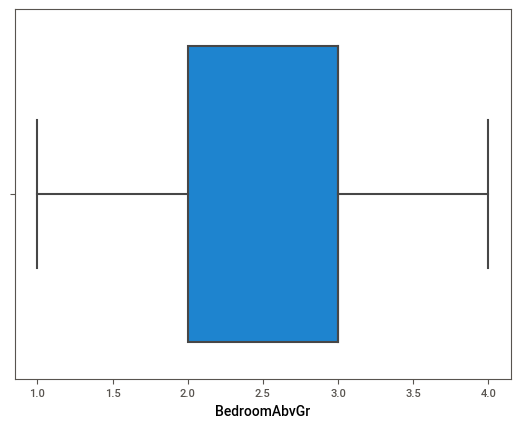

In [335]:
sns.boxplot(x=data['BedroomAbvGr'])

In [336]:
data['KitchenAbvGr'].median()

1.0

In [337]:
data['KitchenAbvGr'].mean()

1.0465753424657533

In [338]:
q1=data['KitchenAbvGr'].quantile(0.25)
q1

1.0

In [339]:
q3=data['KitchenAbvGr'].quantile(0.75)
q3

1.0

In [340]:
iqr=q3-q1
iqr

0.0

In [341]:
lower_limit=q1-1.5*iqr
lower_limit

1.0

In [342]:
upper_limit=q3+1.5*iqr
upper_limit

1.0

In [343]:
data.loc[data['KitchenAbvGr']<lower_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
954          90       RL         35.0   9400.0   Pave      IR1         Lvl   

    Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
954    AllPub   CulDSac       Gtl      Edwards       Norm       Norm   Duplex   

    HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
954     SFoyer            6            5       1975          1975      Flat   

    RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
954  Tar&Grv     WdShing     Plywood       250.0        TA        TA   

    Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
954     CBlock       Gd       Gd           Gd          GLQ       945.0   

    BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
954          Unf           0        0.0        945.0    GasA        TA   

    CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
954          Y      SBrkr       980         0             0        980   

     BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
954             0             0         2         0           4.0   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
954             0          TA             4        Typ           0     Attchd   

     GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
954  1978.506164          Unf           0           0         TA         TA   

    PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
954          Y           0            0              0          0   

     ScreenPorch  PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  \
954            0         0        0      10    2006       WD       AdjLand   

     SalePrice  
954     127500

In [344]:
data.loc[data['KitchenAbvGr']<lower_limit,'KitchenAbvGr']=data['KitchenAbvGr'].median()

In [345]:
data.loc[data['KitchenAbvGr']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
8             50       RM         51.0   9478.5   Pave      Reg         Lvl   
9             50       RL         50.0   9478.5   Pave      Reg         Lvl   
17            90       RL         72.0  10791.0   Pave      Reg         Lvl   
39            90       RL         65.0   9478.5   Pave      Reg         Lvl   
48            50       RM         33.0   9478.5   Pave      Reg         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1391          90       RL         65.0   8944.0   Pave      Reg         Lvl   
1393          50       RM         60.0  10800.0   Pave      Reg         Lvl   
1412          90       RL         60.0   9478.5   Pave      Reg         Lvl   
1416          50       RM         60.0  11340.0   Pave      Reg         Lvl   
1450          90       RL         60.0   9000.0   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
8       AllPub    Inside       Gtl      OldTown     Artery       Norm   
9       AllPub    Corner       Gtl      BrkSide     Artery     Artery   
17      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
39      AllPub    Inside       Gtl      Edwards       Norm       Norm   
48      AllPub    Inside       Gtl      OldTown       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1391    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1393    AllPub    Inside       Gtl      OldTown       Norm       Norm   
1412    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1416    AllPub    Inside       Gtl      OldTown       Norm       Norm   
1450    AllPub       FR2       Gtl        NAmes       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
8        1Fam     1.5Fin            7            5       1931          1950   
9      2fmCon     1.5Unf            5            6       1939          1950   
17     Duplex     1Story            4            5       1967          1967   
39     Duplex     1Story            4            5       1955          1955   
48     2fmCon     2Story            4            5       1920          2008   
...       ...        ...          ...          ...        ...           ...   
1391   Duplex     1Story            5            5       1967          1967   
1393   2fmCon     1.5Fin            6            7       1905          2000   
1412   Duplex     1Story            4            5       1949          1950   
1416   2fmCon     2Story            4            6       1885          1950   
1450   Duplex     2Story            5            5       1974          1974   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
8        Gable  CompShg     BrkFace     Wd Shng         0.0        TA   
9        Gable  CompShg     MetalSd     MetalSd         0.0        TA   
17       Gable  CompShg     MetalSd     MetalSd         0.0        TA   
39       Gable  CompShg     AsbShng     Plywood         0.0        TA   
48       Gable  CompShg     MetalSd     MetalSd         0.0        TA   
...        ...      ...         ...         ...         ...       ...   
1391     Gable  CompShg     Plywood     Plywood         0.0        TA   
1393     Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
1412     Gable  CompShg     BrkFace       Stone         0.0        TA   
1416     Gable  CompShg     VinylSd     AsbShng         0.0        TA   
1450     Gable  CompShg     VinylSd     VinylSd         0.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
8           TA     BrkTil       TA       TA           No          Unf   
9           TA     BrkTil       TA       TA           No          GLQ   
17          TA       Slab       TA       TA           No          Unf   
39          TA      PConc       TA       TA           No      

In [346]:
data.loc[data['KitchenAbvGr']>upper_limit,'KitchenAbvGr']=data['KitchenAbvGr'].median()

<Axes: xlabel='KitchenAbvGr'>

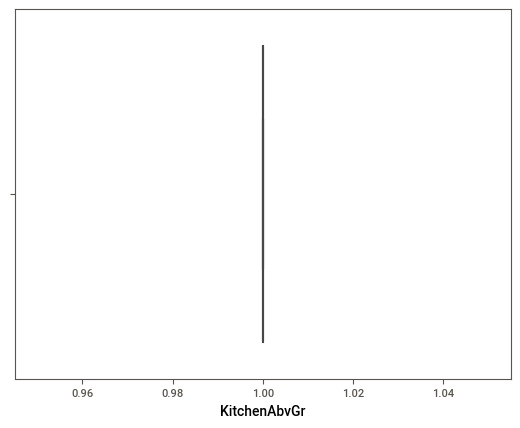

In [347]:
sns.boxplot(x=data['KitchenAbvGr'])

In [348]:
data['TotRmsAbvGrd'].median()

6.0

In [349]:
data['TotRmsAbvGrd'].mean()

6.517808219178082

In [350]:
q1=data['TotRmsAbvGrd'].quantile(0.25)
q1

5.0

In [351]:
q3=data['TotRmsAbvGrd'].quantile(0.75)
q3

7.0

In [352]:
iqr=q3-q1
iqr

2.0

In [353]:
lower_limit=q1-1.5*iqr
lower_limit

2.0

In [354]:
upper_limit=q3+1.5*iqr
upper_limit

10.0

In [355]:
data.loc[data['TotRmsAbvGrd']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [356]:
data.loc[data['TotRmsAbvGrd']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
11            60       RL    85.000000   9479.25   Pave      IR1         Lvl   
118           60       RL    90.000000   9479.25   Pave      Reg         Lvl   
185           75       RM    90.000000   9479.25   Pave      IR2         Lvl   
324           80       RL    96.000000  11275.00   Pave      Reg         Lvl   
523           60       RL    71.394149   9479.25   Pave      IR1         Bnk   
527           60       RL    67.000000   9479.25   Pave      IR1         Lvl   
566           60       RL    77.000000  11198.00   Pave      IR1         Lvl   
635           50       RH    60.000000  10896.00   Pave      Reg         Bnk   
745           60       RL    69.000000   8963.00   Pave      IR1         Lvl   
769           60       RL    47.000000   9479.25   Pave      IR2         HLS   
798           60       RL   104.000000   9479.25   Pave      Reg         Lvl   
803           60       RL   107.000000   9479.25   Pave      Reg         Lvl   
809           75       RM    90.000000   8100.00   Pave      Reg         Lvl   
875           60       FV    75.000000   9000.00   Pave      Reg         Lvl   
897           90       RL    64.000000   9478.50   Pave      Reg         Lvl   
898           20       RL   100.000000   9479.25   Pave      IR1         Lvl   
910           90       RL    80.000000  11600.00   Pave      Reg         Lvl   
961           60       RL    69.000000   9479.25   Pave      IR1         Lvl   
1031          75       RL   102.000000   9479.25   Pave      Reg         Lvl   
1046          60       RL    85.000000   9479.25   Pave      IR1         Lvl   
1142          60       RL    77.000000   9965.00   Pave      Reg         Lvl   
1173          50       RL    71.394149   9479.25   Pave      IR1         Bnk   
1230          90       RL    69.000000   9479.25   Pave      IR1         Lvl   
1268          50       RL    69.000000   9479.25   Pave      IR1         Lvl   
1292          70       RM    60.000000   9478.50   Pave      Reg         Lvl   
1298          60       RL    71.394149   9479.25   Pave      IR3         Bnk   
1350          90       RL    91.000000   9479.25   Pave      Reg         Lvl   
1386          60       RL    80.000000   9479.25   Pave      IR1         Lvl   
1416          50       RM    60.000000  11340.00   Pave      Reg         Lvl   
1440          70       RL    79.000000  11526.00   Pave      IR1         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
11      AllPub    Inside       Gtl      NridgHt       Norm       Norm   
118     AllPub    Corner       Gtl      SawyerW       Norm       Norm   
185     AllPub    Inside       Gtl      OldTown     Artery       Norm   
324     AllPub    Corner       Gtl        NAmes       PosN       Norm   
523     AllPub    Inside       Gtl      Edwards       PosN       PosN   
527     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
566     AllPub    Inside       Gtl      StoneBr       Norm       Norm   
635     AllPub    Inside       Gtl        SWISU      Feedr       Norm   
745     AllPub    Inside       Gtl       NWAmes       Norm       Norm   
769     AllPub   CulDSac       Mod      StoneBr       Norm       Norm   
798     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
803     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
809     AllPub    Corner       Gtl      OldTown       Norm       Norm   
875     AllPub    Inside       Gtl      Somerst       Norm       Norm   
897     AllPub    Inside       Gtl      SawyerW      Feedr       Norm   
898     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
910     AllPub    Corner       Gtl        NAmes      Feedr       Norm   
961     AllPub    Corner       Gtl       NWAmes       PosN       Norm   
1031    AllPub    Corner       Gtl        SWISU       Norm       Norm   
1046    AllPub    Inside       Gtl      StoneBr       Norm       

In [357]:
data.loc[data['TotRmsAbvGrd']>upper_limit,'TotRmsAbvGrd']=data['TotRmsAbvGrd'].median()

<Axes: xlabel='TotRmsAbvGrd'>

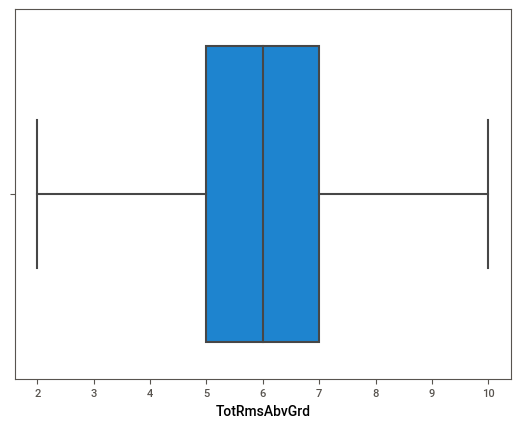

In [358]:
sns.boxplot(x=data['TotRmsAbvGrd'])

In [359]:
data['Fireplaces'].median()

1.0

In [360]:
data['Fireplaces'].mean()

0.613013698630137

In [361]:
q1=data['Fireplaces'].quantile(0.25)
q1

0.0

In [362]:
q3=data['Fireplaces'].quantile(0.75)
q3

1.0

In [363]:
iqr=q3-q1
iqr

1.0

In [364]:
lower_limit=q1-1.5*iqr
lower_limit

-1.5

In [365]:
upper_limit=q3+1.5*iqr
upper_limit

2.5

In [366]:
data.loc[data['Fireplaces']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [367]:
data.loc[data['Fireplaces']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
166           20       RL    69.000000  10708.00   Pave      IR1         Lvl   
309           20       RL    90.000000   9479.25   Pave      IR1         Lvl   
605           60       RL    85.000000   9479.25   Pave      Reg         Lvl   
642           80       RL    75.000000   9479.25   Pave      Reg         Lvl   
1298          60       RL    71.394149   9479.25   Pave      IR3         Bnk   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
166     AllPub    Inside       Gtl      ClearCr       Norm       Norm   
309     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
605     AllPub    Inside       Gtl        NAmes       Norm       Norm   
642     AllPub    Inside       Gtl        NAmes       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
166      1Fam     1Story            5            5       1955          1993   
309      1Fam     1Story            9            5       2003          2004   
605      1Fam     2Story            7            6       1965          1990   
642      1Fam       SLvl            8            7       1972          1995   
1298     1Fam     2Story           10            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
166        Hip  CompShg     Wd Sdng     Wd Sdng    0.000000        Gd   
309      Gable  CompShg     VinylSd     VinylSd    0.000000        Gd   
605      Gable  CompShg     HdBoard     HdBoard  176.000000        TA   
642      Gable  CompShg     Plywood     Wd Sdng    0.000000        Gd   
1298       Hip  ClyTile      Stucco      Stucco  103.685262        Ex   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
166         TA     CBlock       TA       TA           No          LwQ   
309         TA      PConc       Ex       TA           Gd          GLQ   
605         TA     CBlock       TA       TA           No          BLQ   
642         TA     CBlock       Gd       TA           Gd          GLQ   
1298        TA      PConc       Ex       TA           Gd          GLQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
166        379.0          BLQ           0      470.0      1617.00    GasA   
309       1274.0          Unf           0      622.0      1896.00    GasA   
605        454.0          Unf           0      314.0       768.00    GasA   
642       1410.0          Unf           0      542.0      1952.00    GasA   
1298       383.5          Unf           0      466.0       991.75    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
166         Ex          Y      FuseA      1867         0             0   
309         Ex          Y      SBrkr      1944         0             0   
605         TA          Y      SBrkr      1186       800             0   
642         Gd          Y      SBrkr      2000       704             0   
1298        Ex          Y      SBrkr      1087       950             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
166        1867             1             0         1         0           2.0   
309        1944             1             0         2         0           3.0   
605        1986             0             0         2         1           3.0   
642        2704             1             0         2         1           4.0   
1298       1464             2             0         2         1           3.0   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
166              1          TA             7        Typ           3   
309              1          Ex             8        Typ           3   
605              1          TA             7        Typ           3   
642              1          Ex             9        Ty

In [368]:
data.loc[data['Fireplaces']>upper_limit,'Fireplaces']=data['Fireplaces'].median()

<Axes: xlabel='Fireplaces'>

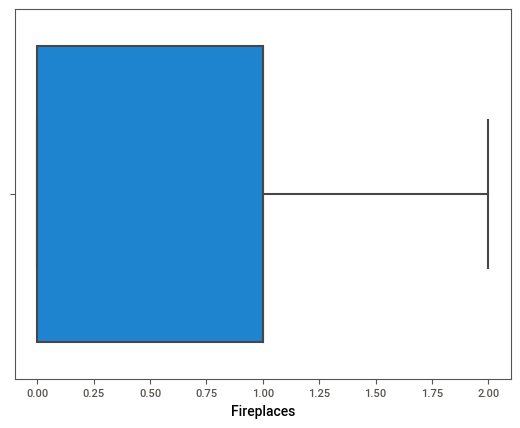

In [369]:
sns.boxplot(x=data['Fireplaces'])

In [370]:
data['GarageYrBlt'].median()

1978.5061638868744

In [371]:
data['GarageYrBlt'].mean()

1978.5061638868744

In [372]:
data['GarageYrBlt'].mode()

0    1978.506164
Name: GarageYrBlt, dtype: float64

In [373]:
q1=data['GarageYrBlt'].quantile(0.25)
q1

1962.0

In [374]:
q3=data['GarageYrBlt'].quantile(0.75)
q3

2001.0

In [375]:
iqr=q3-q1
iqr

39.0

In [376]:
lower_limit=q1-1.5*iqr
lower_limit

1903.5

In [377]:
upper_limit=q3+1.5*iqr
upper_limit

2059.5

In [378]:
data.loc[data['GarageYrBlt']<lower_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
93          50  C (all)         60.0   9478.5   Pave      Reg         Lvl   

   Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
93    AllPub    Corner       Gtl      OldTown       Norm       Norm   2fmCon   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
93     2.5Unf            6            6       1910          1998       Hip   

   RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond  \
93  CompShg     MetalSd     MetalSd         0.0        TA        TA   

   Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
93     BrkTil       TA       Fa           Mn          Rec      1046.0   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
93          Unf           0      168.0       1214.0    GasW        Ex   

   CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
93          N      SBrkr      1260      1031             0       2291   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
93             0             0         2         0           4.0   

    KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
93             1          TA             9        Typ           1     Detchd   

    GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
93       1900.0          Unf           2         506         TA         TA   

   PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
93          Y           0            0              0          0           99   

    PoolArea  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice  
93         0        0      11    2007       WD        Normal     133900

In [379]:
data.loc[data['GarageYrBlt']<lower_limit,'GarageYrBlt']=data['GarageYrBlt'].median()

In [380]:
data.loc[data['GarageYrBlt']>upper_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

<Axes: xlabel='GarageYrBlt'>

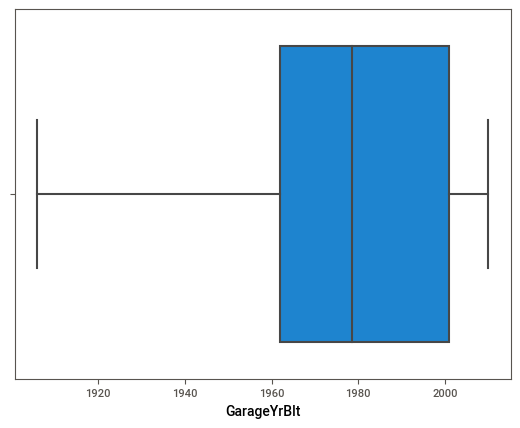

In [381]:
sns.boxplot(x=data['GarageYrBlt'])

In [382]:
data['GarageCars'].median()

2.0

In [383]:
data['GarageCars'].mean()

1.7671232876712328

In [384]:
q1=data['GarageCars'].quantile(0.25)
q1

1.0

In [385]:
q3=data['GarageCars'].quantile(0.75)
q3

2.0

In [386]:
iqr=q3-q1
iqr

1.0

In [387]:
lower_limit=q1-1.5*iqr
lower_limit

-0.5

In [388]:
upper_limit=q3+1.5*iqr
upper_limit

3.5

In [389]:
data.loc[data['GarageCars']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [390]:
data.loc[data['GarageCars']>upper_limit]

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
420           90       RM         78.0  9478.50   Pave      Reg         Lvl   
747           70       RM         65.0  9479.25   Pave      IR1         Lvl   
1190          50       RL         69.0  9479.25   Pave      Reg         Low   
1340          20       RL         70.0  8294.00   Pave      Reg         Lvl   
1350          90       RL         91.0  9479.25   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
420     AllPub    Inside       Gtl      Mitchel       Norm       Norm   
747     AllPub    Corner       Gtl      OldTown       Norm       Norm   
1190    AllPub    Inside       Mod      Mitchel       Norm       Norm   
1340    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1350    AllPub    Inside       Gtl        NAmes     Artery       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
420    Duplex     SFoyer            7            5       1997          1998   
747      1Fam     2Story            7            7       1973          2003   
1190   2fmCon     1Story            4            4       1961          1975   
1340     1Fam     1Story            4            5       1971          1971   
1350   Duplex     2Story            5            5       1969          1969   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
420      Gable  CompShg     VinylSd     VinylSd       200.0        TA   
747    Mansard  CompShg      Stucco      Stucco         0.0        Gd   
1190     Gable  CompShg     MetalSd     MetalSd       149.0        TA   
1340     Gable  CompShg     MetalSd     MetalSd         0.0        TA   
1350     Gable  CompShg     MetalSd     MetalSd       368.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
420         Gd      PConc       Gd       Gd           Gd          GLQ   
747         TA      Stone       TA       Fa           No          Unf   
1190        Gd     CBlock       TA       TA           Av          BLQ   
1340        TA     CBlock       TA       TA           No          Unf   
1350        TA     CBlock       TA       TA           No          LwQ   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
420       1309.0          Unf           0       35.0       1344.0    GasA   
747          0.0          Unf           0     1240.0       1240.0    GasW   
1190      1159.0          Unf           0       90.0       1249.0    GasA   
1340         0.0          Unf           0      858.0        858.0    GasA   
1350       500.0          Unf           0      748.0       1248.0    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
420         Ex          Y      SBrkr      1344         0             0   
747         TA          N      SBrkr      1320      1320             0   
1190        Ex          Y      SBrkr      1622         0             0   
1340        TA          Y      SBrkr       872         0             0   
1350        TA          Y      SBrkr      1338      1296             0   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
420        1344             2             0         2         0      2.000000   
747        2640             0             0         1         1      4.000000   
1190       1622             1             0         1         0      3.000000   
1340        872             0             0         1         0      3.000000   
1350       2634             1             0         2         2      2.878218   

      KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
420              1          TA             8        Typ           0   
747              1          Gd             8        Typ           1   
1190             1          TA             7        Typ           1   
1340             1          TA             5        Typ     

In [391]:
data.loc[data['GarageCars']>upper_limit,'GarageCars']=data['GarageCars'].median()

<Axes: xlabel='GarageCars'>

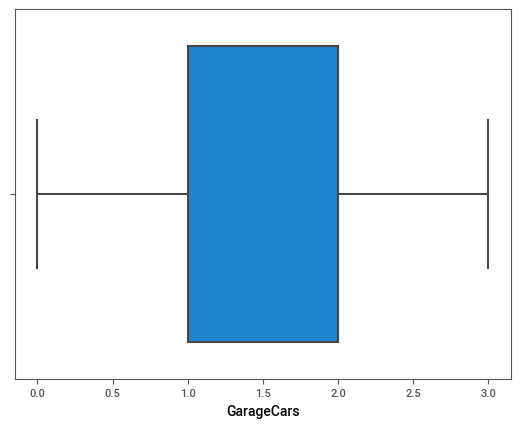

In [392]:
sns.boxplot(x=data['GarageCars'])

In [393]:
data['GarageArea'].median()

480.0

In [394]:
data['GarageArea'].mean()

472.9801369863014

In [395]:
q1=data['GarageArea'].quantile(0.25)
q1

334.5

In [396]:
q3=data['GarageArea'].quantile(0.75)
q3

576.0

In [397]:
iqr=q3-q1
iqr

241.5

In [398]:
lower_limit=q1-1.5*iqr
lower_limit

-27.75

In [399]:
upper_limit=q3+1.5*iqr
upper_limit

938.25

In [400]:
data.loc[data['GarageArea']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [401]:
data.loc[data['GarageArea']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
178           20       RL    63.000000   9479.25   Pave      IR1         Lvl   
224           20       RL   103.000000   9479.25   Pave      Reg         Lvl   
270           60       FV    84.000000  10728.00   Pave      Reg         Lvl   
317           60       FV    75.000000   9000.00   Pave      Reg         Lvl   
408           60       RL    71.394149   9479.25   Pave      Reg         Lvl   
581           20       RL    98.000000   9479.25   Pave      Reg         Lvl   
664           20       RL    49.000000   9479.25   Pave      IR2         Lvl   
718           60       RL    96.000000  10542.00   Pave      Reg         Lvl   
803           60       RL   107.000000   9479.25   Pave      Reg         Lvl   
825           20       RL    71.394149   9479.25   Pave      Reg         Lvl   
1061          30  C (all)    71.394149   9479.25   Grvl      Reg         Low   
1087          60       FV    85.000000  10574.00   Pave      Reg         Lvl   
1142          60       RL    77.000000   9965.00   Pave      Reg         Lvl   
1184          20       RL    50.000000   9479.25   Grvl      Reg         Lvl   
1190          50       RL    69.000000   9479.25   Pave      Reg         Low   
1228         120       RL    65.000000   8769.00   Pave      Reg         Lvl   
1241          20       RL    83.000000   9849.00   Pave      Reg         Lvl   
1268          50       RL    69.000000   9479.25   Pave      IR1         Lvl   
1298          60       RL    71.394149   9479.25   Pave      IR3         Bnk   
1350          90       RL    91.000000   9479.25   Pave      Reg         Lvl   
1417          60       RL    69.000000   9479.25   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
178     AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   
224     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
270     AllPub    Inside       Gtl      Somerst       Norm       Norm   
317     AllPub    Inside       Gtl      Somerst       Norm       Norm   
408     AllPub    Corner       Gtl      NridgHt       Norm       Norm   
581     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
664     AllPub   CulDSac       Gtl      Somerst       RRAn       Norm   
718     AllPub    Inside       Gtl      NoRidge       Norm       Norm   
803     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
825     AllPub    Inside       Gtl      NridgHt       PosN       PosN   
1061    AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
1087    AllPub    Inside       Gtl      Somerst       Norm       Norm   
1142    AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1184    AllPub    Inside       Mod       Timber       Norm       Norm   
1190    AllPub    Inside       Mod      Mitchel       Norm       Norm   
1228    AllPub    Corner       Gtl      NridgHt       Norm       Norm   
1241    AllPub    Inside       Gtl      Somerst       Norm       Norm   
1268    AllPub    Inside       Mod      Crawfor       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   
1350    AllPub    Inside       Gtl        NAmes     Artery       Norm   
1417    AllPub    Inside       Gtl      NoRidge       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
178      1Fam     1Story            9            5       2008          2009   
224      1Fam     1Story           10            5       2003          2003   
270      1Fam     2Story            8            5       2006          2006   
317      1Fam     2Story            8            5       2006          2006   
408      1Fam     2Story            7            5       2006          2006   
581      1Fam     1Story            8            5       2008          2009   
664      1Fam     1Story            8            5       2005          2006   
718   

In [402]:
data.loc[data['GarageArea']>upper_limit,'GarageArea']=data['GarageArea'].median()

<Axes: xlabel='GarageArea'>

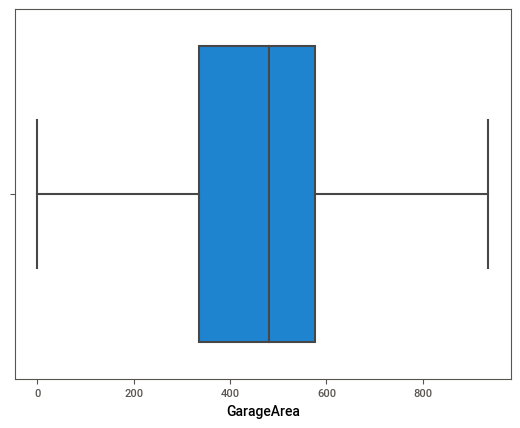

In [403]:
sns.boxplot(x=data['GarageArea'])

In [404]:
data['WoodDeckSF'].median()

0.0

In [405]:
data['WoodDeckSF'].mean()

94.2445205479452

In [406]:
q1=data['WoodDeckSF'].quantile(0.25)
q1

0.0

In [407]:
q3=data['WoodDeckSF'].quantile(0.75)
q3

168.0

In [408]:
iqr=q3-q1
iqr

168.0

In [409]:
lower_limit=q1-1.5*iqr
lower_limit

-252.0

In [410]:
upper_limit=q3+1.5*iqr
upper_limit

420.0

In [411]:
data.loc[data['WoodDeckSF']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [412]:
data.loc[data['WoodDeckSF']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
53            20       RL    68.000000   9479.25   Pave      IR1         Low   
64            60       RL    69.000000   9375.00   Pave      Reg         Lvl   
166           20       RL    69.000000  10708.00   Pave      IR1         Lvl   
169           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
172           50       RL    44.000000   9478.50   Pave      IR1         Lvl   
302           20       RL    71.394149   9479.25   Pave      IR1         Lvl   
335           50       RL    69.000000   9479.25   Grvl      IR1         HLS   
343          120       RL    63.000000   8849.00   Pave      IR1         Lvl   
357          120       RM    44.000000   9478.50   Pave      Reg         Lvl   
480           20       RL    98.000000   9479.25   Pave      IR1         Lvl   
538           20       RL    69.000000  11553.00   Pave      IR1         Lvl   
661           60       RL    52.000000   9479.25   Pave      IR2         Lvl   
674           20       RL    80.000000   9200.00   Pave      Reg         Lvl   
769           60       RL    47.000000   9479.25   Pave      IR2         HLS   
828           60       RL    69.000000   9479.25   Pave      IR2         Low   
848           50       RL    75.000000   9479.25   Pave      IR2         Bnk   
893           20       RL    69.000000   9479.25   Pave      Reg         Lvl   
951           20       RH    60.000000   7800.00   Pave      Reg         Lvl   
961           60       RL    69.000000   9479.25   Pave      IR1         Lvl   
974           70       RL    60.000000  11414.00   Pave      IR1         Lvl   
1044          20       RL    80.000000   9600.00   Pave      Reg         Lvl   
1068          50       RM    42.000000   9478.50   Pave      Reg         Lvl   
1076          50       RL    60.000000  10800.00   Pave      Reg         Lvl   
1130          50       RL    65.000000   7804.00   Pave      Reg         Lvl   
1141          60       RL    69.000000  10304.00   Pave      IR1         Lvl   
1190          50       RL    69.000000   9479.25   Pave      Reg         Low   
1210          60       RL    70.000000  11218.00   Pave      Reg         Lvl   
1312          60       RL    69.000000   9572.00   Pave      IR1         Lvl   
1313          60       RL    71.394149   9479.25   Pave      IR1         Lvl   
1423          80       RL    69.000000   9479.25   Pave      IR1         Lvl   
1440          70       RL    79.000000  11526.00   Pave      IR1         Bnk   
1459          20       RL    75.000000   9937.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
53      AllPub    Inside       Gtl      Veenker       Norm       Norm   
64      AllPub    Inside       Gtl      CollgCr       Norm       Norm   
166     AllPub    Inside       Gtl      ClearCr       Norm       Norm   
169     AllPub    Corner       Gtl       Timber       Norm       Norm   
172     AllPub    Inside       Gtl      StoneBr       Norm       Norm   
302     AllPub    Corner       Gtl      CollgCr       Norm       Norm   
335     AllPub    Corner       Sev       Timber       Norm       Norm   
343     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
357     AllPub    Inside       Gtl      MeadowV       Norm       Norm   
480     AllPub       FR2       Gtl      NridgHt       Norm       Norm   
538     AllPub    Inside       Gtl       Sawyer       Norm       Norm   
661     AllPub   CulDSac       Gtl      NoRidge       Norm       Norm   
674     AllPub    Inside       Gtl        NAmes       Norm       Norm   
769     AllPub   CulDSac       Mod      StoneBr       Norm       Norm   
828     AllPub   CulDSac       Sev      ClearCr       Norm       Norm   
848     AllPub    Inside       Gtl      ClearCr       Norm       Norm   
893     AllPub    Inside       Gtl       Sawyer       PosN       Norm   
951     AllPub    Corner       Gtl      SawyerW    

In [413]:
data.loc[data['WoodDeckSF']>upper_limit,'WoodDeckSF']=data['WoodDeckSF'].mean()

<Axes: xlabel='WoodDeckSF'>

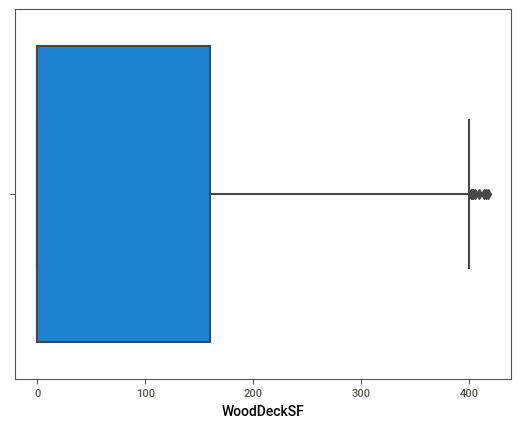

In [414]:
sns.boxplot(x=data['WoodDeckSF'])

In [415]:
data['OpenPorchSF'].median()

25.0

In [416]:
data['OpenPorchSF'].mean()

46.66027397260274

In [417]:
q1=data['OpenPorchSF'].quantile(0.25)
q1

0.0

In [418]:
q3=data['OpenPorchSF'].quantile(0.75)
q3

68.0

In [419]:
iqr=q3-q1
iqr

68.0

In [420]:
lower_limit=q1-1.5*iqr
lower_limit

-102.0

In [421]:
upper_limit=q3+1.5*iqr
upper_limit

170.0

In [422]:
data.loc[data['OpenPorchSF']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [423]:
data.loc[data['OpenPorchSF']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
7             60       RL         69.0  10382.00   Pave      IR1         Lvl   
14            20       RL         69.0  10920.00   Pave      IR1         Lvl   
28            20       RL         47.0   9479.25   Pave      IR1         Lvl   
81           120       RM         32.0   9478.50   Pave      Reg         Lvl   
87            50       FV         40.0   9478.50   Pave      Reg         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1336          90       RL         87.0   9246.00   Pave      IR1         Lvl   
1354          60       RL         69.0  10316.00   Pave      IR1         Lvl   
1369          20       RL         48.0  10635.00   Pave      IR2         Lvl   
1374          60       FV         85.0  10625.00   Pave      Reg         Lvl   
1423          80       RL         69.0   9479.25   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
7       AllPub    Corner       Gtl       NWAmes       PosN       Norm   
14      AllPub    Corner       Gtl        NAmes       Norm       Norm   
28      AllPub   CulDSac       Gtl        NAmes       Norm       Norm   
81      AllPub       FR2       Gtl      Mitchel       Norm       Norm   
87      AllPub    Corner       Gtl      Somerst       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1336    AllPub    Inside       Gtl       NWAmes      Feedr       Norm   
1354    AllPub    Inside       Gtl      CollgCr       Norm       Norm   
1369    AllPub       FR2       Gtl      CollgCr       Norm       Norm   
1374    AllPub    Inside       Gtl      Somerst       Norm       Norm   
1423    AllPub   CulDSac       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
7        1Fam     2Story            7            6       1973          1973   
14       1Fam     1Story            6            5       1960          1960   
28       1Fam     1Story            5            6       1957          1997   
81     TwnhsE     1Story            6            5       1998          1998   
87     TwnhsE     2Story            6            5       2009          2009   
...       ...        ...          ...          ...        ...           ...   
1336   Duplex     1Story            5            5       1973          1973   
1354     1Fam     2Story            7            5       2000          2000   
1369     1Fam     1Story            8            5       2003          2003   
1374     1Fam     2Story            7            5       2005          2005   
1423     1Fam       SLvl            6            7       1966          1966   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
7        Gable  CompShg     HdBoard     HdBoard  240.000000        TA   
14         Hip  CompShg     MetalSd     MetalSd  212.000000        TA   
28       Gable  CompShg     MetalSd     MetalSd    0.000000        TA   
81         Hip  CompShg     VinylSd     VinylSd  103.685262        TA   
87       Gable  CompShg     VinylSd     VinylSd   76.000000        Gd   
...        ...      ...         ...         ...         ...       ...   
1336     Gable  CompShg     Plywood     Plywood  103.685262        TA   
1354     Gable  CompShg     VinylSd     VinylSd    0.000000        Gd   
1369       Hip  CompShg     VinylSd     VinylSd  171.000000        Gd   
1374     Gable  CompShg     CemntBd     CmentBd    0.000000        Gd   
1423      Flat  Tar&Grv     Plywood     Plywood    0.000000        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
7           TA     CBlock       Gd       TA           Mn          ALQ   
14          TA     CBlock       TA       TA           No          BLQ   
28          TA     CBlock       TA       TA           Gd          BLQ   
81          Gd      PConc       Ex       Gd       

In [424]:
data.loc[data['OpenPorchSF']>upper_limit,'OpenPorchSF']=data['OpenPorchSF'].median()

<Axes: xlabel='OpenPorchSF'>

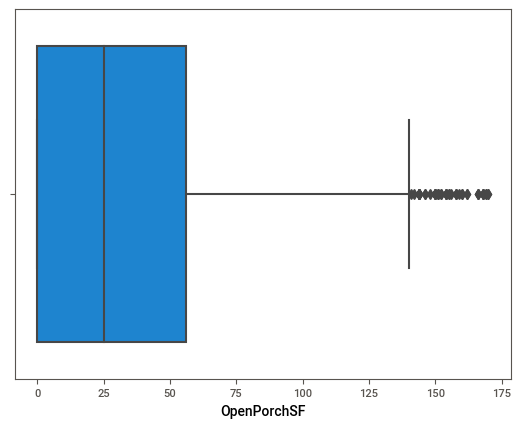

In [425]:
sns.boxplot(x=data['OpenPorchSF'])

In [426]:
data['EnclosedPorch'].median()

0.0

In [427]:
data['EnclosedPorch'].mean()

21.954109589041096

In [428]:
q1=data['EnclosedPorch'].quantile(0.25)
q1

0.0

In [429]:
q3=data['EnclosedPorch'].quantile(0.75)
q3

0.0

In [430]:
iqr=q3-q1
iqr

0.0

In [431]:
lower_limit=q1-1.5*iqr
lower_limit

0.0

In [432]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [433]:
data.loc[data['EnclosedPorch']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
3             70       RL         60.0   9550.00   Pave      IR1         Lvl   
7             60       RL         69.0  10382.00   Pave      IR1         Lvl   
8             50       RM         51.0   9478.50   Pave      Reg         Lvl   
14            20       RL         69.0  10920.00   Pave      IR1         Lvl   
21            45       RM         57.0   9478.50   Pave      Reg         Bnk   
...          ...      ...          ...       ...    ...      ...         ...   
1429          20       RL         69.0   9479.25   Pave      IR1         Lvl   
1438          20       RM         90.0   9478.50   Pave      Reg         Lvl   
1439          60       RL         80.0  11584.00   Pave      Reg         Lvl   
1445          85       RL         70.0   8400.00   Pave      Reg         Lvl   
1458          20       RL         68.0   9717.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
3       AllPub    Corner       Gtl      Crawfor       Norm       Norm   
7       AllPub    Corner       Gtl       NWAmes       PosN       Norm   
8       AllPub    Inside       Gtl      OldTown     Artery       Norm   
14      AllPub    Corner       Gtl        NAmes       Norm       Norm   
21      AllPub    Inside       Gtl       IDOTRR       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1429    AllPub    Corner       Gtl       NWAmes       Norm       Norm   
1438    AllPub    Inside       Gtl      OldTown     Artery       Norm   
1439    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1445    AllPub    Inside       Gtl       Sawyer       Norm       Norm   
1458    AllPub    Inside       Gtl        NAmes       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
3        1Fam     2Story            7            5       1915          1970   
7        1Fam     2Story            7            6       1973          1973   
8        1Fam     1.5Fin            7            5       1931          1950   
14       1Fam     1Story            6            5       1960          1960   
21       1Fam     1.5Unf            7            7       1930          1950   
...       ...        ...          ...          ...        ...           ...   
1429     1Fam     1Story            6            7       1981          1981   
1438     1Fam     1Story            6            7       1957          1996   
1439     1Fam       SLvl            7            6       1979          1979   
1445     1Fam     SFoyer            6            5       1966          1966   
1458     1Fam     1Story            5            6       1950          1996   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
3        Gable  CompShg     Wd Sdng     Wd Shng         0.0        TA   
7        Gable  CompShg     HdBoard     HdBoard       240.0        TA   
8        Gable  CompShg     BrkFace     Wd Shng         0.0        TA   
14         Hip  CompShg     MetalSd     MetalSd       212.0        TA   
21       Gable  CompShg     Wd Sdng     Wd Sdng         0.0        TA   
...        ...      ...         ...         ...         ...       ...   
1429     Gable  CompShg     MetalSd     MetalSd       310.0        Gd   
1438     Gable  CompShg     MetalSd     MetalSd         0.0        TA   
1439       Hip  CompShg     HdBoard     HdBoard        96.0        TA   
1445     Gable  CompShg     VinylSd     VinylSd         0.0        TA   
1458       Hip  CompShg     MetalSd     MetalSd         0.0        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
3           TA     BrkTil       TA       Gd           No          ALQ   
7           TA     CBlock       Gd       TA           Mn          ALQ   
8           TA     BrkTil       TA       TA           No          Unf   
14          TA     CBlock       TA       TA       

In [434]:
data.loc[data['EnclosedPorch']>upper_limit,'EnclosedPorch']=data['EnclosedPorch'].median()

<Axes: xlabel='EnclosedPorch'>

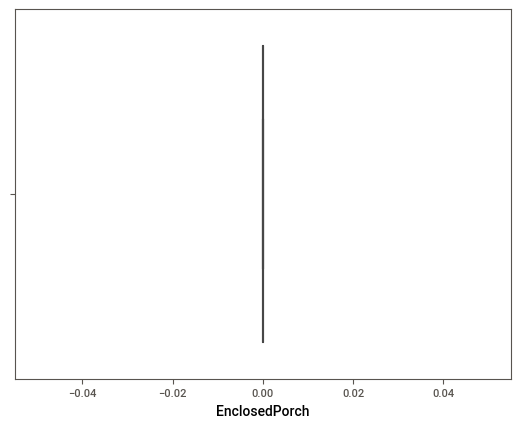

In [435]:
sns.boxplot(x=data['EnclosedPorch'])

In [436]:
data['3SsnPorch'].median()

0.0

In [437]:
data['3SsnPorch'].mean()

3.4095890410958902

In [438]:
q1=data['3SsnPorch'].quantile(0.25)
q1

0.0

In [439]:
q3=data['3SsnPorch'].quantile(0.75)
q3

0.0

In [440]:
iqr=q3-q1
iqr

0.0

In [441]:
lower_limit=q1-1.5*iqr
lower_limit

0.0

In [442]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [443]:
data.loc[data['3SsnPorch']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
5             50       RL    85.000000   9479.25   Pave      IR1         Lvl   
55            20       RL   100.000000  10175.00   Pave      IR1         Lvl   
120           80       RL    69.000000   9479.25   Pave      IR1         Low   
129           20       RL    69.000000   8973.00   Pave      Reg         Lvl   
159           60       RL    71.394149   9479.25   Pave      IR1         HLS   
182           20       RL    60.000000   9060.00   Pave      Reg         Lvl   
187           50       RL    60.000000  10410.00   Pave      Reg         Lvl   
205           20       RL    99.000000   9479.25   Pave      Reg         Lvl   
237           60       RL    69.000000   9453.00   Pave      IR1         Lvl   
258           60       RL    80.000000   9479.25   Pave      Reg         Lvl   
280           60       RL    82.000000  11287.00   Pave      Reg         Lvl   
546           50       RL    70.000000   8737.00   Pave      IR1         Bnk   
704           20       RL    70.000000   8400.00   Pave      Reg         Lvl   
726           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
744          120       RL    41.000000   9478.50   Pave      IR1         HLS   
889           20       RL    71.394149   9479.25   Pave      Reg         Lvl   
922           20       RL    65.000000  10237.00   Pave      Reg         Lvl   
941           60       RL    69.000000   8755.00   Pave      IR1         Lvl   
1080          20       RL    80.000000  11040.00   Pave      Reg         Lvl   
1156          80       RL    85.000000   9350.00   Pave      Reg         Lvl   
1161          20       RL    69.000000   9479.25   Pave      IR1         Low   
1181         120       RM    64.000000   9478.50   Pave      IR1         HLS   
1346          20       RL    69.000000   9479.25   Pave      IR2         Lvl   
1437          20       RL    96.000000   9479.25   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
5       AllPub    Inside       Gtl      Mitchel       Norm       Norm   
55      AllPub    Inside       Gtl        NAmes       Norm       Norm   
120     AllPub   CulDSac       Sev      ClearCr       Norm       Norm   
129     AllPub    Inside       Gtl        NAmes       Norm       Norm   
159     AllPub    Corner       Gtl      Gilbert       Norm       Norm   
182     AllPub    Inside       Gtl      Edwards     Artery       Norm   
187     AllPub    Inside       Gtl      OldTown       Norm       Norm   
205     AllPub    Corner       Gtl      Gilbert       Norm       Norm   
237     AllPub   CulDSac       Gtl      SawyerW       RRNe       Norm   
258     AllPub    Inside       Gtl      CollgCr       Norm       Norm   
280     AllPub    Inside       Gtl      SawyerW       Norm       Norm   
546     AllPub    Inside       Gtl      BrkSide       Norm       Norm   
704     AllPub    Inside       Gtl      CollgCr       Norm       Norm   
726     AllPub    Corner       Gtl      Crawfor       Norm       Norm   
744     AllPub    Inside       Gtl      StoneBr       Norm       Norm   
889     AllPub    Inside       Gtl        NAmes      Feedr       Norm   
922     AllPub    Inside       Gtl      Gilbert       RRAn       Norm   
941     AllPub       FR2       Gtl      Gilbert       RRNn       Norm   
1080    AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1156    AllPub    Inside       Gtl        NAmes       Norm       Norm   
1161    AllPub   CulDSac       Gtl      Crawfor       PosN       Norm   
1181    AllPub    Inside       Mod      Crawfor       Norm       Norm   
1346    AllPub   CulDSac       Gtl       NWAmes       PosN       Norm   
1437    AllPub       FR2       Gtl      NridgHt       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
5        1Fam     1.5Fin            5            5       1993          1995   
55       1Fam     1St

In [444]:
data.loc[data['3SsnPorch']>upper_limit,'3SsnPorch']=data['3SsnPorch'].median()

<Axes: xlabel='3SsnPorch'>

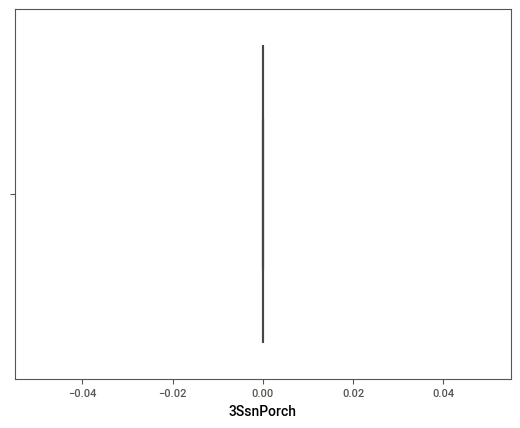

In [445]:
sns.boxplot(x=data['3SsnPorch'])

In [446]:
data['ScreenPorch'].median()

0.0

In [447]:
data['ScreenPorch'].mean()

15.060958904109588

In [448]:
q1=data['ScreenPorch'].quantile(0.25)
q1

0.0

In [449]:
q3=data['ScreenPorch'].quantile(0.75)
q3

0.0

In [450]:
iqr=q3-q1
iqr

0.0

In [451]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [452]:
data.loc[data['ScreenPorch']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
12            20       RL         69.0   9479.25   Pave      IR2         Lvl   
46            50       RL         48.0   9479.25   Pave      IR1         Lvl   
72            60       RL         74.0  10141.00   Pave      IR1         Lvl   
80            60       RL        100.0   9479.25   Pave      Reg         Lvl   
93            50  C (all)         60.0   9478.50   Pave      Reg         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1408          70       RM         60.0   7740.00   Pave      Reg         Lvl   
1414          50       RL         64.0   9479.25   Pave      Reg         Bnk   
1420          60       RL         90.0   9479.25   Pave      Reg         Lvl   
1421         120       RL         53.0   9478.50   Pave      Reg         Lvl   
1443          30       RL         69.0   8854.00   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
12      AllPub    Inside       Gtl       Sawyer       Norm       Norm   
46      AllPub   CulDSac       Gtl      Mitchel       Norm       Norm   
72      AllPub    Corner       Gtl      Gilbert       Norm       Norm   
80      AllPub    Corner       Gtl        NAmes       Norm       Norm   
93      AllPub    Corner       Gtl      OldTown       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1408    AllPub    Inside       Gtl      OldTown       Norm       Norm   
1414    AllPub    Inside       Gtl      BrkSide       Norm       Norm   
1420    AllPub    Corner       Gtl       NWAmes       Norm       Norm   
1421    AllPub    Inside       Gtl      NPkVill       Norm       Norm   
1443    AllPub    Inside       Gtl      BrkSide       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
12       1Fam     1Story            5            6       1962          1962   
46       1Fam     1.5Fin            7            5       2003          2003   
72       1Fam     2Story            7            5       1998          1998   
80       1Fam     2Story            6            6       1968          1968   
93     2fmCon     2.5Unf            6            6       1910          1998   
...       ...        ...          ...          ...        ...           ...   
1408     1Fam     2Story            4            7       1910          1950   
1414     1Fam     1.5Fin            6            7       1923          2000   
1420     1Fam     2Story            6            6       1968          1968   
1421   TwnhsE     1Story            6            5       1977          1977   
1443     1Fam     1.5Unf            6            6       1916          1950   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
12         Hip  CompShg     HdBoard     Plywood    0.000000        TA   
46       Gable  CompShg     VinylSd     VinylSd    0.000000        Gd   
72       Gable  CompShg     VinylSd     VinylSd   40.000000        TA   
80       Gable  CompShg     VinylSd     VinylSd  103.685262        TA   
93         Hip  CompShg     MetalSd     MetalSd    0.000000        TA   
...        ...      ...         ...         ...         ...       ...   
1408     Gable  CompShg     VinylSd     VinylSd    0.000000        TA   
1414   Gambrel  CompShg     Wd Sdng     Wd Sdng    0.000000        TA   
1420     Gable  CompShg     HdBoard     HdBoard  103.685262        TA   
1421     Gable  CompShg     Plywood     Plywood    0.000000        TA   
1443     Gable  CompShg     Wd Sdng     Wd Sdng    0.000000        TA   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
12          TA     CBlock       TA       TA           No          ALQ   
46          TA      PConc       Ex       TA           No          GLQ   
72          TA      PConc       Gd       TA           No          Unf   
80          Gd     CBlock       Gd       TA       

In [453]:
data.loc[data['ScreenPorch']>upper_limit,'ScreenPorch']=data['ScreenPorch'].median()

<Axes: xlabel='ScreenPorch'>

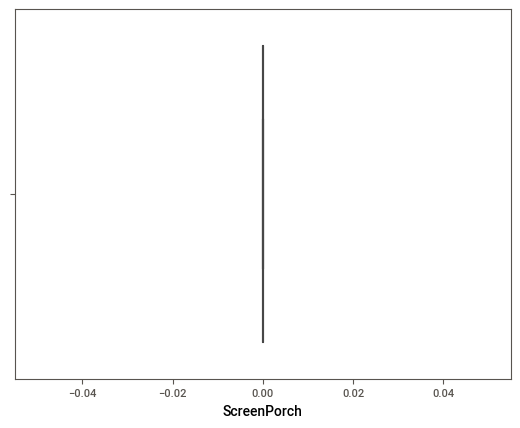

In [454]:
sns.boxplot(x=data['ScreenPorch'])

In [455]:
data['PoolArea'].median()

0.0

In [456]:
data['PoolArea'].mean()

2.758904109589041

In [457]:
q1=data['PoolArea'].quantile(0.25)
q1

0.0

In [458]:
q3=data['PoolArea'].quantile(0.75)
q3

0.0

In [459]:
lower_limit=q1-1.5*iqr
lower_limit

0.0

In [460]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [461]:
data.loc[data['PoolArea']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
197           75       RL    71.394149   9479.25   Pave      Reg         Lvl   
810           20       RL    78.000000  10140.00   Pave      Reg         Lvl   
1170          80       RL    76.000000   9880.00   Pave      Reg         Lvl   
1182          60       RL    71.394149   9479.25   Pave      IR1         Lvl   
1298          60       RL    71.394149   9479.25   Pave      IR3         Bnk   
1386          60       RL    80.000000   9479.25   Pave      IR1         Lvl   
1423          80       RL    69.000000   9479.25   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
197     AllPub    Corner       Gtl        NAmes     Artery       Norm   
810     AllPub    Inside       Gtl       NWAmes       Norm       Norm   
1170    AllPub    Inside       Gtl      Mitchel       Norm       Norm   
1182    AllPub    Corner       Gtl      NoRidge       Norm       Norm   
1298    AllPub    Corner       Gtl      Edwards      Feedr       Norm   
1386    AllPub    Inside       Gtl       NWAmes       RRAn       Norm   
1423    AllPub   CulDSac       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
197      1Fam     2Story            8            4       1918          1990   
810      1Fam     1Story            6            6       1974          1999   
1170     1Fam       SLvl            6            6       1977          1977   
1182     1Fam     2Story           10            5       1996          1996   
1298     1Fam     2Story           10            5       2008          2008   
1386     1Fam     2Story            7            5       1978          1978   
1423     1Fam       SLvl            6            7       1966          1966   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
197      Gable  CompShg      Stucco      Stucco    0.000000        Gd   
810        Hip  CompShg     HdBoard     HdBoard   99.000000        TA   
1170     Gable  CompShg     Plywood     Plywood    0.000000        TA   
1182       Hip  CompShg     Wd Sdng     ImStucc    0.000000        Gd   
1298       Hip  ClyTile      Stucco      Stucco  103.685262        Ex   
1386     Gable  CompShg     Plywood     Plywood  184.000000        TA   
1423      Flat  Tar&Grv     Plywood     Plywood    0.000000        Gd   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
197         Gd      PConc       TA       TA           No          GLQ   
810         TA     CBlock       TA       TA           No          ALQ   
1170        TA     CBlock       TA       TA           Av          ALQ   
1182        TA      PConc       Ex       TA           Av          GLQ   
1298        TA      PConc       Ex       TA           Gd          GLQ   
1386        TA     CBlock       Gd       TA           No          BLQ   
1423        Gd     CBlock       Gd       TA           Av          Unf   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating  \
197       1036.0          LwQ           0      140.0      1360.00    GasA   
810        663.0          LwQ           0        0.0      1040.00    GasA   
1170       522.0          Unf           0      574.0      1096.00    GasA   
1182       383.5          Unf           0      300.0       991.75    GasA   
1298       383.5          Unf           0      466.0       991.75    GasA   
1386       790.0          LwQ           0      133.0      1392.00    GasA   
1423         0.0          Unf           0      697.0       697.00    GasA   

     HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
197         Gd          Y      SBrkr      1360      1360             0   
810         Fa          Y      SBrkr      1309         0             0   
1170        TA          Y      SBrkr      1118         0             0   
1182        Ex          Y      SBrkr      1087         0        

In [462]:
data.loc[data['PoolArea']>upper_limit,'PoolArea']=data['PoolArea'].median()

<Axes: xlabel='PoolArea'>

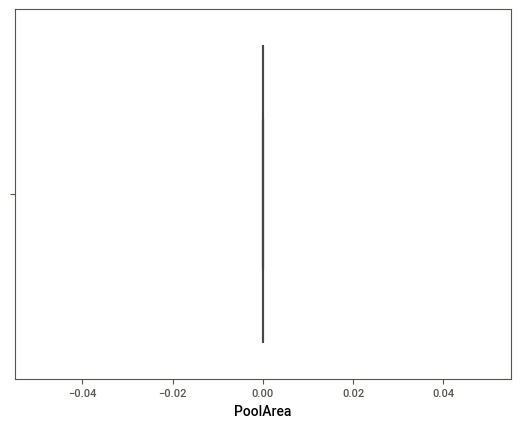

In [463]:
sns.boxplot(x=data['PoolArea'])

In [464]:
data['MiscVal'].median()

0.0

In [465]:
data['MiscVal'].mean()

43.489041095890414

In [466]:
q1=data['MiscVal'].quantile(0.25)
q1

0.0

In [467]:
q3=data['MiscVal'].quantile(0.75)
q3

0.0

In [468]:
iqr=q3-q1
iqr

0.0

In [469]:
lower_limit=q1-1.5*iqr
lower_limit

0.0

In [470]:
upper_limit=q3+1.5*iqr
upper_limit

0.0

In [471]:
data.loc[data['MiscVal']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
5             50       RL    85.000000   9479.25   Pave      IR1         Lvl   
7             60       RL    69.000000  10382.00   Pave      IR1         Lvl   
16            20       RL    69.000000  11241.00   Pave      IR1         Lvl   
17            90       RL    72.000000  10791.00   Pave      Reg         Lvl   
51            50       RM    52.000000   9478.50   Pave      Reg         Lvl   
84            80       RL    69.000000   8530.00   Pave      IR1         Lvl   
95            60       RL    69.000000   9765.00   Pave      IR2         Lvl   
98            30       RL    85.000000  10625.00   Pave      Reg         Lvl   
99            20       RL    77.000000   9320.00   Pave      IR1         Lvl   
106           30       RM    60.000000  10800.00   Pave      Reg         Lvl   
214           60       RL    69.000000  10900.00   Pave      IR1         Lvl   
249           50       RL    69.000000   9479.25   Pave      IR2         Low   
250           30       RL    55.000000   9478.50   Pave      IR1         Lvl   
335           50       RL    69.000000   9479.25   Grvl      IR1         HLS   
338           20       RL    91.000000   9479.25   Pave      Reg         Lvl   
346           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
392           20       RL    69.000000   8339.00   Pave      IR1         Lvl   
439           50       RL    67.000000   9479.25   Pave      Reg         Lvl   
499           20       RL    70.000000   7535.00   Pave      IR1         Lvl   
502           20       RL    70.000000   9170.00   Pave      Reg         Lvl   
510           20       RL    75.000000   9479.25   Pave      Reg         Lvl   
539           20       RL    69.000000  11423.00   Pave      Reg         Lvl   
589           40       RM    50.000000   9100.00   Pave      Reg         Lvl   
611           80       RL    69.000000  10395.00   Pave      IR1         Lvl   
626           20       RL    69.000000   9479.25   Pave      IR1         Lvl   
634           90       RL    64.000000   9478.50   Pave      Reg         Lvl   
705           50       RM    70.000000   9478.50   Pave      Reg         Lvl   
725           20       RL    60.000000   9478.50   Pave      Reg         Lvl   
733           20       RL    80.000000  10000.00   Pave      Reg         Lvl   
760           20       RL    70.000000   9100.00   Pave      Reg         Lvl   
766           60       RL    80.000000  10421.00   Pave      Reg         Lvl   
767           50       RL    75.000000   9479.25   Pave      IR1         Lvl   
786           50       RM    60.000000  10800.00   Pave      Reg         Lvl   
794           60       RL    69.000000  10832.00   Pave      IR1         Lvl   
800           60       RL    79.000000   9479.25   Pave      IR1         HLS   
812           20  C (all)    66.000000   8712.00   Grvl      Reg         Bnk   
813           20       RL    75.000000   9750.00   Pave      Reg         Lvl   
867           20       RL    85.000000   9478.50   Pave      Reg         Lvl   
878           85       RL    88.000000   9479.25   Pave      IR1         Lvl   
890           50       RL    60.000000   8064.00   Pave      Reg         Lvl   
912           30       RM    51.000000   9478.50   Pave      Reg         Lvl   
953           60       RL    69.000000  11075.00   Pave      IR1         Lvl   
1061          30  C (all)    71.394149   9479.25   Grvl      Reg         Low   
1076          50       RL    60.000000  10800.00   Pave      Reg         Lvl   
1083          20       RL    80.000000   8800.00   Pave      Reg         Lvl   
1171          20       RL    76.000000   9120.00   Pave      Reg         Lvl   
1210          60       RL    70.000000  11218.00   Pave      Reg         Lvl   
1230          90       RL    69.000000   9479.25   Pave      IR1         Lvl   
1252          20       RL    62.000000   9858.00   Pave      Reg         Lvl   
1328  

In [472]:
data.loc[data['MiscVal']>upper_limit,'MiscVal']=data['MiscVal'].median()

<Axes: xlabel='MiscVal'>

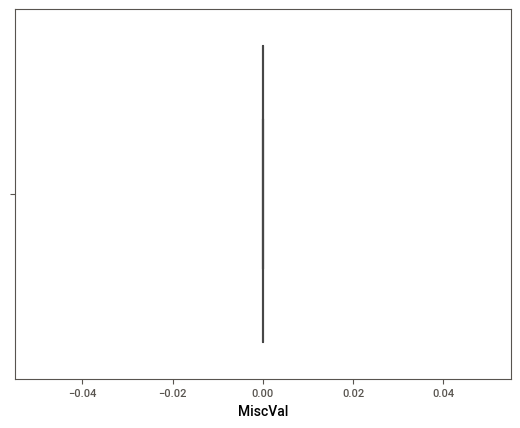

In [473]:
sns.boxplot(x=data['MiscVal'])

In [474]:
data['SalePrice'].median()

163000.0

In [475]:
data['SalePrice'].mean()

180921.19589041095

In [476]:
q1=data['SalePrice'].quantile(0.25)
q1

129975.0

In [477]:
q3=data['SalePrice'].quantile(0.75)
q3

214000.0

In [478]:
iqr=q3-q1
iqr

84025.0

In [479]:
lower_limit=q1-1.5*iqr
lower_limit

3937.5

In [480]:
upper_limit=q3+1.5*iqr
upper_limit

340037.5

In [481]:
data.loc[data['SalePrice']<lower_limit]

Empty DataFrame
Columns: [MSSubClass, MSZoning, LotFrontage, LotArea, Street, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

In [482]:
data.loc[data['SalePrice']>upper_limit]

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
11            60       RL         85.0   9479.25   Pave      IR1         Lvl   
53            20       RL         68.0   9479.25   Pave      IR1         Low   
58            60       RL         66.0   9479.25   Pave      IR2         HLS   
112           60       RL         77.0   9965.00   Pave      Reg         Lvl   
151           20       RL        107.0   9479.25   Pave      Reg         Lvl   
...          ...      ...          ...       ...    ...      ...         ...   
1268          50       RL         69.0   9479.25   Pave      IR1         Lvl   
1353          50       RL         56.0   9479.25   Pave      IR1         Lvl   
1373          20       RL         69.0  11400.00   Pave      Reg         Lvl   
1388          20       RL         42.0   9479.25   Pave      IR1         HLS   
1437          20       RL         96.0   9479.25   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope Neighborhood Condition1 Condition2  \
11      AllPub    Inside       Gtl      NridgHt       Norm       Norm   
53      AllPub    Inside       Gtl      Veenker       Norm       Norm   
58      AllPub   CulDSac       Gtl      StoneBr       Norm       Norm   
112     AllPub    Inside       Gtl      CollgCr       Norm       Norm   
151     AllPub    Inside       Gtl      NridgHt       Norm       Norm   
...        ...       ...       ...          ...        ...        ...   
1268    AllPub    Inside       Mod      Crawfor       Norm       Norm   
1353    AllPub   CulDSac       Gtl      NoRidge       Norm       Norm   
1373    AllPub    Inside       Gtl      NoRidge       Norm       Norm   
1388    AllPub   CulDSac       Gtl      Gilbert       Norm       Norm   
1437    AllPub       FR2       Gtl      NridgHt       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
11       1Fam     2Story            9            5       2005          2006   
53       1Fam     1Story            9            5       1981          1987   
58       1Fam     2Story           10            5       2006          2006   
112      1Fam     2Story            7            5       2007          2007   
151      1Fam     1Story            8            5       2007          2008   
...       ...        ...          ...          ...        ...           ...   
1268     1Fam     1.5Fin            8            5       1935          1997   
1353     1Fam     1.5Fin            8            5       1995          1996   
1373     1Fam     1Story           10            5       2001          2002   
1388     1Fam     1Story            9            5       2006          2007   
1437     1Fam     1Story            8            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual  \
11         Hip  CompShg     WdShing     Wd Shng  286.000000        Ex   
53       Gable  WdShngl     WdShing     Wd Shng    0.000000        Gd   
58         Hip  CompShg     VinylSd     VinylSd  103.685262        Ex   
112      Gable  CompShg     VinylSd     VinylSd  220.000000        Gd   
151        Hip  CompShg     VinylSd     VinylSd  103.685262        Gd   
...        ...      ...         ...         ...         ...       ...   
1268     Gable  CompShg      Stucco      Stucco  103.685262        TA   
1353       Hip  CompShg     VinylSd     VinylSd  103.685262        Gd   
1373       Hip  CompShg     VinylSd     VinylSd  103.685262        Ex   
1388     Gable  CompShg     VinylSd     VinylSd  160.000000        Ex   
1437       Hip  CompShg     VinylSd     VinylSd  103.685262        Ex   

     ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
11          TA      PConc       Ex       TA           No          GLQ   
53          TA     CBlock       Ex       TA           Gd          GLQ   
58          TA      PConc       Ex       TA           Gd          Unf   
112         TA      PConc       Ex       TA       

In [483]:
data.loc[data['SalePrice']>upper_limit,'SalePrice']=data['SalePrice'].median()

In [484]:
# scaling
data.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL         65.0   8450.00   Pave      Reg         Lvl   
1          20       RL         80.0   9600.00   Pave      Reg         Lvl   
2          60       RL         68.0  11250.00   Pave      IR1         Lvl   
3          70       RL         60.0   9550.00   Pave      IR1         Lvl   
4          60       RL         84.0   9479.25   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            5       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd       196.0        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd         0.0        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd       162.0        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng         0.0        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd       350.0        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ       706.0          Unf   
1       Gd       TA           Gd          ALQ       978.0          Unf   
2       Gd       TA           Mn          GLQ       486.0          Unf   
3       TA       Gd           No          ALQ       216.0          Unf   
4       Gd       TA           Av          GLQ       655.0          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0           0      150.0        856.0    GasA        Ex          Y      SBrkr   
1           0      284.0       1262.0    GasA        Ex          Y      SBrkr   
2           0      434.0        920.0    GasA        Ex          Y      SBrkr   
3           0      540.0        756.0    GasA        Gd          Y      SBrkr   
4           0      490.0       1145.0    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             0   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1           3.0             1          Gd             8   
1         2         0           3.0             1          TA             6   
2         2         1           3.0             1          Gd             6   
3         1         0           3.0             1          Gd             7   
4         2         1           4.0             1          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd       2003.0          RFn           2   
1        Typ           1     Attchd       1976.0          RFn           2   
2       

In [485]:
## scaling data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() #Object Creation
data[[ 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea','GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']]=scale.fit_transform(data[[ 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea','GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']])

In [486]:
data.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL    -0.282804 -1.346672   Pave      Reg         Lvl   
1          20       RL     0.800089  0.133695   Pave      Reg         Lvl   
2          60       RL    -0.066225  2.257701   Pave      IR1         Lvl   
3          70       RL    -0.643768  0.069332   Pave      IR1         Lvl   
4          60       RL     1.088860 -0.021743   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story     0.652641    -0.534267   1.060436      0.878668     Gable   
1     1Story    -0.077517    -0.534267   0.145062     -0.429577     Gable   
2     2Story     0.652641    -0.534267   0.992630      0.830215     Gable   
3     2Story     0.652641    -0.534267  -1.923005     -0.720298     Gable   
4     2Story     1.382798    -0.534267   0.958727      0.733308     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    1.230379        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd   -0.674047        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    0.900020        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng   -0.674047        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    2.726714        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ    0.644729          Unf   
1       Gd       TA           Gd          ALQ    1.287800          Unf   
2       Gd       TA           Mn          GLQ    0.124597          Unf   
3       TA       Gd           No          ALQ   -0.513745          Unf   
4       Gd       TA           Av          GLQ    0.524153          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0         0.0  -0.971954    -0.589607    GasA        Ex          Y      SBrkr   
1         0.0  -0.637815     0.602001    GasA        Ex          Y      SBrkr   
2         0.0  -0.263779    -0.401768    GasA        Ex          Y      SBrkr   
3         0.0   0.000541    -0.883107    GasA        Gd          Y      SBrkr   
4         0.0  -0.124138     0.258606    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.835181  1.178779           0.0   0.524793             1             0   
1  0.348826 -0.796244           0.0  -0.482008             0             0   
2 -0.648539  1.206531           0.0   0.695590             1             0   
3 -0.528972  0.952137           0.0   0.540524             1             0   
4  0.007622  1.639001           0.0   1.621487             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1           3.0             1          Gd             8   
1         2         0           3.0             1          TA             6   
2         2         1           3.0             1          Gd             6   
3         1         0           3.0             1          Gd             7   
4         2         1           4.0             1          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd     1.022676          RFn    0.325876   
1        Typ           1     Attchd    -0.107119          RFn    0.325876   
2       

In [487]:
# ENCODING
# LABEL ENCODING

from sklearn.preprocessing import LabelEncoder

lc = LabelEncoder()

In [488]:
data1 = data.copy()

In [489]:
data1.head()

MSSubClass MSZoning  LotFrontage   LotArea Street LotShape LandContour  \
0          60       RL    -0.282804 -1.346672   Pave      Reg         Lvl   
1          20       RL     0.800089  0.133695   Pave      Reg         Lvl   
2          60       RL    -0.066225  2.257701   Pave      IR1         Lvl   
3          70       RL    -0.643768  0.069332   Pave      IR1         Lvl   
4          60       RL     1.088860 -0.021743   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story     0.652641    -0.534267   1.060436      0.878668     Gable   
1     1Story    -0.077517    -0.534267   0.145062     -0.429577     Gable   
2     2Story     0.652641    -0.534267   0.992630      0.830215     Gable   
3     2Story     0.652641    -0.534267  -1.923005     -0.720298     Gable   
4     2Story     1.382798    -0.534267   0.958727      0.733308     Gable   

  RoofMatl Exterior1st Exterior2nd  MasVnrArea ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd    1.230379        Gd        TA      PConc   
1  CompShg     MetalSd     MetalSd   -0.674047        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd    0.900020        Gd        TA      PConc   
3  CompShg     Wd Sdng     Wd Shng   -0.674047        TA        TA     BrkTil   
4  CompShg     VinylSd     VinylSd    2.726714        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
0       Gd       TA           No          GLQ    0.644729          Unf   
1       Gd       TA           Gd          ALQ    1.287800          Unf   
2       Gd       TA           Mn          GLQ    0.124597          Unf   
3       TA       Gd           No          ALQ   -0.513745          Unf   
4       Gd       TA           Av          GLQ    0.524153          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0         0.0  -0.971954    -0.589607    GasA        Ex          Y      SBrkr   
1         0.0  -0.637815     0.602001    GasA        Ex          Y      SBrkr   
2         0.0  -0.263779    -0.401768    GasA        Ex          Y      SBrkr   
3         0.0   0.000541    -0.883107    GasA        Gd          Y      SBrkr   
4         0.0  -0.124138     0.258606    GasA        Ex          Y      SBrkr   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.835181  1.178779           0.0   0.524793             1             0   
1  0.348826 -0.796244           0.0  -0.482008             0             0   
2 -0.648539  1.206531           0.0   0.695590             1             0   
3 -0.528972  0.952137           0.0   0.540524             1             0   
4  0.007622  1.639001           0.0   1.621487             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd  \
0         2         1           3.0             1          Gd             8   
1         2         0           3.0             1          TA             6   
2         2         1           3.0             1          Gd             6   
3         1         0           3.0             1          Gd             7   
4         2         1           4.0             1          Gd             9   

  Functional  Fireplaces GarageType  GarageYrBlt GarageFinish  GarageCars  \
0        Typ           0     Attchd     1.022676          RFn    0.325876   
1        Typ           1     Attchd    -0.107119          RFn    0.325876   
2       

In [490]:
cate_data.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [491]:
cate_data.shape

(1460, 37)

In [492]:
data1['MSZoning'] = lc.fit_transform(data1['MSZoning'])
data1['Street'] = lc.fit_transform(data1['Street'])
data1['LotShape'] = lc.fit_transform(data1['LotShape'])
data1['LandContour'] = lc.fit_transform(data1['LandContour'])
data1['Utilities'] = lc.fit_transform(data1['Utilities'])
data1['LotConfig'] = lc.fit_transform(data1['LotConfig'])
data1['LandSlope'] = lc.fit_transform(data1['LandSlope'])
data1['Neighborhood'] = lc.fit_transform(data1['Neighborhood'])
data1['Condition1'] = lc.fit_transform(data1['Condition1'])
data1['Condition2'] = lc.fit_transform(data1['Condition2'])
data1['BldgType'] = lc.fit_transform(data1['BldgType'])
data1['HouseStyle'] = lc.fit_transform(data1['HouseStyle'])
data1['RoofStyle'] = lc.fit_transform(data1['RoofStyle'])
data1['RoofMatl'] = lc.fit_transform(data1['RoofMatl'])
data1['Exterior1st'] = lc.fit_transform(data1['Exterior1st'])
data1['Exterior2nd'] = lc.fit_transform(data1['Exterior2nd'])
data1['ExterQual'] = lc.fit_transform(data1['ExterQual'])
data1['ExterCond'] = lc.fit_transform(data1['ExterCond'])
data1['Foundation'] = lc.fit_transform(data1['Foundation'])
data1['BsmtFinType1'] = lc.fit_transform(data1['BsmtFinType1'])
data1['BsmtFinType2'] = lc.fit_transform(data1['BsmtFinType2'])
data1['Heating'] = lc.fit_transform(data1['Heating'])
data1['HeatingQC'] = lc.fit_transform(data1['HeatingQC'])
data1['CentralAir'] = lc.fit_transform(data1['CentralAir'])
data1['Electrical'] = lc.fit_transform(data1['Electrical'])
data1['KitchenQual'] = lc.fit_transform(data1['KitchenQual'])
data1['Functional'] = lc.fit_transform(data1['Functional'])
data1['GarageType'] = lc.fit_transform(data1['GarageType'])
data1['GarageFinish'] = lc.fit_transform(data1['GarageFinish'])
data1['GarageQual'] = lc.fit_transform(data1['GarageQual'])
data1['GarageCond'] = lc.fit_transform(data1['GarageCond'])
data1['PavedDrive'] = lc.fit_transform(data1['PavedDrive'])
data1['SaleType'] = lc.fit_transform(data1['SaleType'])
data1['SaleCondition'] = lc.fit_transform(data1['SaleCondition'])

In [493]:
data1.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0          60         3    -0.282804 -1.346672       1         3            3   
1          20         3     0.800089  0.133695       1         3            3   
2          60         3    -0.066225  2.257701       1         0            3   
3          70         3    -0.643768  0.069332       1         0            3   
4          60         3     1.088860 -0.021743       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5     0.652641    -0.534267   1.060436      0.878668   
1         0           2    -0.077517    -0.534267   0.145062     -0.429577   
2         0           5     0.652641    -0.534267   0.992630      0.830215   
3         0           5     0.652641    -0.534267  -1.923005     -0.720298   
4         0           5     1.382798    -0.534267   0.958727      0.733308   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  \
0          1         1           12           13    1.230379          2   
1          1         1            8            8   -0.674047          3   
2          1         1           12           13    0.900020          2   
3          1         1           13           15   -0.674047          3   
4          1         1           12           13    2.726714          2   

   ExterCond  Foundation BsmtQual BsmtCond BsmtExposure  BsmtFinType1  \
0          4           2       Gd       TA           No             2   
1          4           1       Gd       TA           Gd             0   
2          4           2       Gd       TA           Mn             2   
3          4           0       TA       Gd           No             0   
4          4           2       Gd       TA           Av             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0    0.644729             5         0.0  -0.971954    -0.589607        1   
1    1.287800             5         0.0  -0.637815     0.602001        1   
2    0.124597             5         0.0  -0.263779    -0.401768        1   
3   -0.513745             5         0.0   0.000541    -0.883107        1   
4    0.524153             5         0.0  -0.124138     0.258606        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           4 -0.835181  1.178779           0.0   
1          0           1           4  0.348826 -0.796244           0.0   
2          0           1           4 -0.648539  1.206531           0.0   
3          2           1           4 -0.528972  0.952137           0.0   
4          0           1           4  0.007622  1.639001           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.524793             1             0         2         1           3.0   
1  -0.482008             0             0         2         0           3.0   
2   0.695590             1             0         2         1           3.0   
3   0.540524             1             0         1         0           3.0   
4   1.621487             1             0         2         1           4.0   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7       

In [494]:
data1.shape

(1460, 74)

In [495]:
data1["BsmtQual"].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [496]:
data.BsmtQual.value_counts()

BsmtQual
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

# one hat encoding

In [497]:
data1.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0          60         3    -0.282804 -1.346672       1         3            3   
1          20         3     0.800089  0.133695       1         3            3   
2          60         3    -0.066225  2.257701       1         0            3   
3          70         3    -0.643768  0.069332       1         0            3   
4          60         3     1.088860 -0.021743       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5     0.652641    -0.534267   1.060436      0.878668   
1         0           2    -0.077517    -0.534267   0.145062     -0.429577   
2         0           5     0.652641    -0.534267   0.992630      0.830215   
3         0           5     0.652641    -0.534267  -1.923005     -0.720298   
4         0           5     1.382798    -0.534267   0.958727      0.733308   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  \
0          1         1           12           13    1.230379          2   
1          1         1            8            8   -0.674047          3   
2          1         1           12           13    0.900020          2   
3          1         1           13           15   -0.674047          3   
4          1         1           12           13    2.726714          2   

   ExterCond  Foundation BsmtQual BsmtCond BsmtExposure  BsmtFinType1  \
0          4           2       Gd       TA           No             2   
1          4           1       Gd       TA           Gd             0   
2          4           2       Gd       TA           Mn             2   
3          4           0       TA       Gd           No             0   
4          4           2       Gd       TA           Av             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0    0.644729             5         0.0  -0.971954    -0.589607        1   
1    1.287800             5         0.0  -0.637815     0.602001        1   
2    0.124597             5         0.0  -0.263779    -0.401768        1   
3   -0.513745             5         0.0   0.000541    -0.883107        1   
4    0.524153             5         0.0  -0.124138     0.258606        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           4 -0.835181  1.178779           0.0   
1          0           1           4  0.348826 -0.796244           0.0   
2          0           1           4 -0.648539  1.206531           0.0   
3          2           1           4 -0.528972  0.952137           0.0   
4          0           1           4  0.007622  1.639001           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   0.524793             1             0         2         1           3.0   
1  -0.482008             0             0         2         0           3.0   
2   0.695590             1             0         2         1           3.0   
3   0.540524             1             0         1         0           3.0   
4   1.621487             1             0         2         1           4.0   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7       

In [498]:
df1 = pd.get_dummies(data1['BsmtQual'],dtype='int',prefix ='BsmtQual', drop_first=True)
data1 = pd.concat([data1,df1],axis=1).drop('BsmtQual',axis=1)

In [499]:
df1 = pd.get_dummies(data1['BsmtCond'],dtype='int',prefix ='BsmtCond', drop_first=True)
data1 = pd.concat([data1,df1],axis=1).drop('BsmtCond',axis=1)

In [500]:
df1 = pd.get_dummies(data1['BsmtExposure'],dtype='int',prefix ='BsmtExposure', drop_first=True)
data1 = pd.concat([data1,df1],axis=1).drop('BsmtExposure',axis=1)

In [501]:
data1.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  LandContour  \
0          60         3    -0.282804 -1.346672       1         3            3   
1          20         3     0.800089  0.133695       1         3            3   
2          60         3    -0.066225  2.257701       1         0            3   
3          70         3    -0.643768  0.069332       1         0            3   
4          60         3     1.088860 -0.021743       1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5     0.652641    -0.534267   1.060436      0.878668   
1         0           2    -0.077517    -0.534267   0.145062     -0.429577   
2         0           5     0.652641    -0.534267   0.992630      0.830215   
3         0           5     0.652641    -0.534267  -1.923005     -0.720298   
4         0           5     1.382798    -0.534267   0.958727      0.733308   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  \
0          1         1           12           13    1.230379          2   
1          1         1            8            8   -0.674047          3   
2          1         1           12           13    0.900020          2   
3          1         1           13           15   -0.674047          3   
4          1         1           12           13    2.726714          2   

   ExterCond  Foundation  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0          4           2             2    0.644729             5         0.0   
1          4           1             0    1.287800             5         0.0   
2          4           2             2    0.124597             5         0.0   
3          4           0             0   -0.513745             5         0.0   
4          4           2             2    0.524153             5         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0  -0.971954    -0.589607        1          0           1           4   
1  -0.637815     0.602001        1          0           1           4   
2  -0.263779    -0.401768        1          0           1           4   
3   0.000541    -0.883107        1          2           1           4   
4  -0.124138     0.258606        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0 -0.835181  1.178779           0.0   0.524793             1             0   
1  0.348826 -0.796244           0.0  -0.482008             0             0   
2 -0.648539  1.206531           0.0   0.695590             1             0   
3 -0.528972  0.952137           0.0   0.540524             1             0   
4  0.007622  1.639001           0.0   1.621487             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1           3.0             1            2             8   
1         2         0           3.0             1            3             6   
2         2         1           3.0             1            2             6   
3         1         0           3.0             1            2             7   
4         2         1           4.0             1            2             9   

   Functional  Fireplaces  GarageType  GarageYrBlt  GarageFinish  GarageCars  \
0           6           0           1     1.022676             1    0.325876   
1           6           1           1    -0.107119             1    0.325876   
2           6           1    

In [502]:
# save the preprocessed data to the csv file
data1.to_csv("SVM-----PROJECT2222222.csv")

In [503]:
pwd

'C:\\Users\\ssisi'

In [504]:
new_data=pd.read_csv("SVM-----PROJECT2222222.csv")

In [505]:
new_data.head()

Unnamed: 0  MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
0           0          60         3    -0.282804 -1.346672       1         3   
1           1          20         3     0.800089  0.133695       1         3   
2           2          60         3    -0.066225  2.257701       1         0   
3           3          70         3    -0.643768  0.069332       1         0   
4           4          60         3     1.088860 -0.021743       1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5     0.652641    -0.534267   1.060436   
1           2         0           2    -0.077517    -0.534267   0.145062   
2           2         0           5     0.652641    -0.534267   0.992630   
3           2         0           5     0.652641    -0.534267  -1.923005   
4           2         0           5     1.382798    -0.534267   0.958727   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  \
0      0.878668          1         1           12           13    1.230379   
1     -0.429577          1         1            8            8   -0.674047   
2      0.830215          1         1           12           13    0.900020   
3     -0.720298          1         1           13           15   -0.674047   
4      0.733308          1         1           12           13    2.726714   

   ExterQual  ExterCond  Foundation  BsmtFinType1  BsmtFinSF1  BsmtFinType2  \
0          2          4           2             2    0.644729             5   
1          3          4           1             0    1.287800             5   
2          2          4           2             2    0.124597             5   
3          3          4           0             0   -0.513745             5   
4          2          4           2             2    0.524153             5   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  \
0         0.0  -0.971954    -0.589607        1          0           1   
1         0.0  -0.637815     0.602001        1          0           1   
2         0.0  -0.263779    -0.401768        1          0           1   
3         0.0   0.000541    -0.883107        1          2           1   
4         0.0  -0.124138     0.258606        1          0           1   

   Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0           4 -0.835181  1.178779           0.0   0.524793             1   
1           4  0.348826 -0.796244           0.0  -0.482008             0   
2           4 -0.648539  1.206531           0.0   0.695590             1   
3           4 -0.528972  0.952137           0.0   0.540524             1   
4           4  0.007622  1.639001           0.0   1.621487             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0             0         2         1           3.0             1            2   
1             0         2         0           3.0             1            3   
2             0         2         1           3.0             1            2   
3             0         1         0           3.0             1            2   
4             0         2         1           4.0             1            2   

   TotRmsAbvGrd  Functional  Fireplaces  GarageType  GarageYrBlt  \
0             8           6           0           1     1.022676   
1             6           6           1           1    -0.107119   
2             6           6           1           1     0.938988   
3        

In [506]:
y=['Unnamed: 0']
new_data.drop(y,axis=1,inplace=True)# Removing redundant columns

# feature selections

In [507]:
new_data.corr()

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass         1.000000  0.044591    -0.228109 -0.023957 -0.003689   
MSZoning           0.044591  1.000000    -0.115452  0.014231  0.087654   
LotFrontage       -0.228109 -0.115452     1.000000  0.188205  0.003645   
LotArea           -0.023957  0.014231     0.188205  1.000000  0.025853   
Street            -0.003689  0.087654     0.003645  0.025853  1.000000   
...                     ...       ...          ...       ...       ...   
BsmtCond_Po       -0.024187  0.027624    -0.011811 -0.000126  0.002379   
BsmtCond_TA       -0.029351 -0.003170     0.094320  0.009083 -0.018516   
BsmtExposure_Gd    0.041850  0.030584     0.097669  0.047124 -0.090827   
BsmtExposure_Mn   -0.015029 -0.037494     0.030593  0.057747  0.018695   
BsmtExposure_No   -0.108282  0.038288    -0.109491 -0.090785  0.070450   

                 LotShape  LandContour  Utilities  LotConfig  LandSlope  \
MSSubClass       0.000505    -0.012909  -0.026397   0.034354  -0.019640   
MSZoning         0.061887    -0.017854  -0.001192  -0.009895  -0.022055   
LotFrontage     -0.084462     0.045022   0.000156  -0.100076   0.002915   
LotArea         -0.101544     0.004462  -0.000569  -0.089865   0.026849   
Street          -0.010224     0.115995   0.001682   0.013960  -0.179360   
...                   ...          ...        ...        ...        ...   
BsmtCond_Po     -0.011633    -0.014523  -0.000970  -0.023271   0.125765   
BsmtCond_TA      0.004670     0.014801   0.007546   0.041487  -0.018819   
BsmtExposure_Gd -0.135216    -0.121300  -0.008322   0.003554   0.314847   
BsmtExposure_Mn -0.047917    -0.005858  -0.007619  -0.060098  -0.010220   
BsmtExposure_No  0.160374     0.063447   0.018010   0.035262  -0.195307   

                 Neighborhood  Condition1  Condition2  BldgType  HouseStyle  \
MSSubClass          -0.018281   -0.006604   -0.001466  0.578155    0.378664   
MSZoning            -0.249679   -0.027874    0.044606  0.005690   -0.105315   
LotFrontage          0.101375   -0.009655   -0.032353 -0.324248    0.151863   
LotArea              0.052562    0.033550   -0.006742 -0.037843    0.040952   
Street              -0.011561   -0.071657    0.002039 -0.018243    0.023704   
...                       ...         ...         ...       ...         ...   
BsmtCond_Po         -0.026192   -0.001344   -0.001176 -0.015248   -0.020128   
BsmtCond_TA          0.024468   -0.007325    0.029026  0.024134    0.000399   
BsmtExposure_Gd      0.015910    0.013056    0.008233  0.019642    0.083016   
BsmtExposure_Mn      0.016283   -0.001740   -0.038812 -0.030303   -0.043254   
BsmtExposure_No      0.028765   -0.022340    0.016171 -0.030261   -0.158924   

                 OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
MSSubClass          0.159099    -0.113781   0.100362      0.096634  -0.106445   
MSZoning           -0.161841     0.132219  -0.296172     -0.174728  -0.000301   
LotFrontage         0.220888    -0.052191   0.173742      0.067863   0.154112   
LotArea             0.128331    -0.027300   0.032276      0.043095   0.050255   
Street              0.059701     0.048124   0.022623      0.065465  -0.019732   
...                      ...          ...        ...           ...        ...   
BsmtCond_Po        -0.016392    -0.019788  -0.063688     -0.062569  -0.018204   
BsmtCond_TA         0.014827    -0.005273   0.088979     -0.001626   0.002931   
BsmtExposure_Gd     0.207470    -0.044434   0.146248      0.107360   0.048382   
BsmtExposure_Mn     0.031496     0.018959  -0.033427      0.001398   0.000700   
BsmtExposure_No    -0.256195     0.070628  -0.262657     -0.197721  -0.023866   

                 RoofMatl  Exterior1st  Exterior2nd  MasVnrArea  ExterQual  \
MSSubClass      -0.009026    -0.014392    -0.027864    0.033588  -0.092807   
MSZoning         0.005133    -0.008558     0.006963   -0.006183   0.200536   
LotFrontage      0.077960    -0.015831    -0.017423    0.242614  -0.162

In [508]:
y=['MSZoning','Street','LandContour','Utilities','LandSlope','Condition1','Condition2','BsmtFinSF2','LowQualFinSF',
  'BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal',]

In [509]:
new_data.drop(y,axis=1,inplace=True)

In [510]:
y1=['BldgType']

In [511]:
new_data.drop(y1,axis=1,inplace=True)

<Axes: >

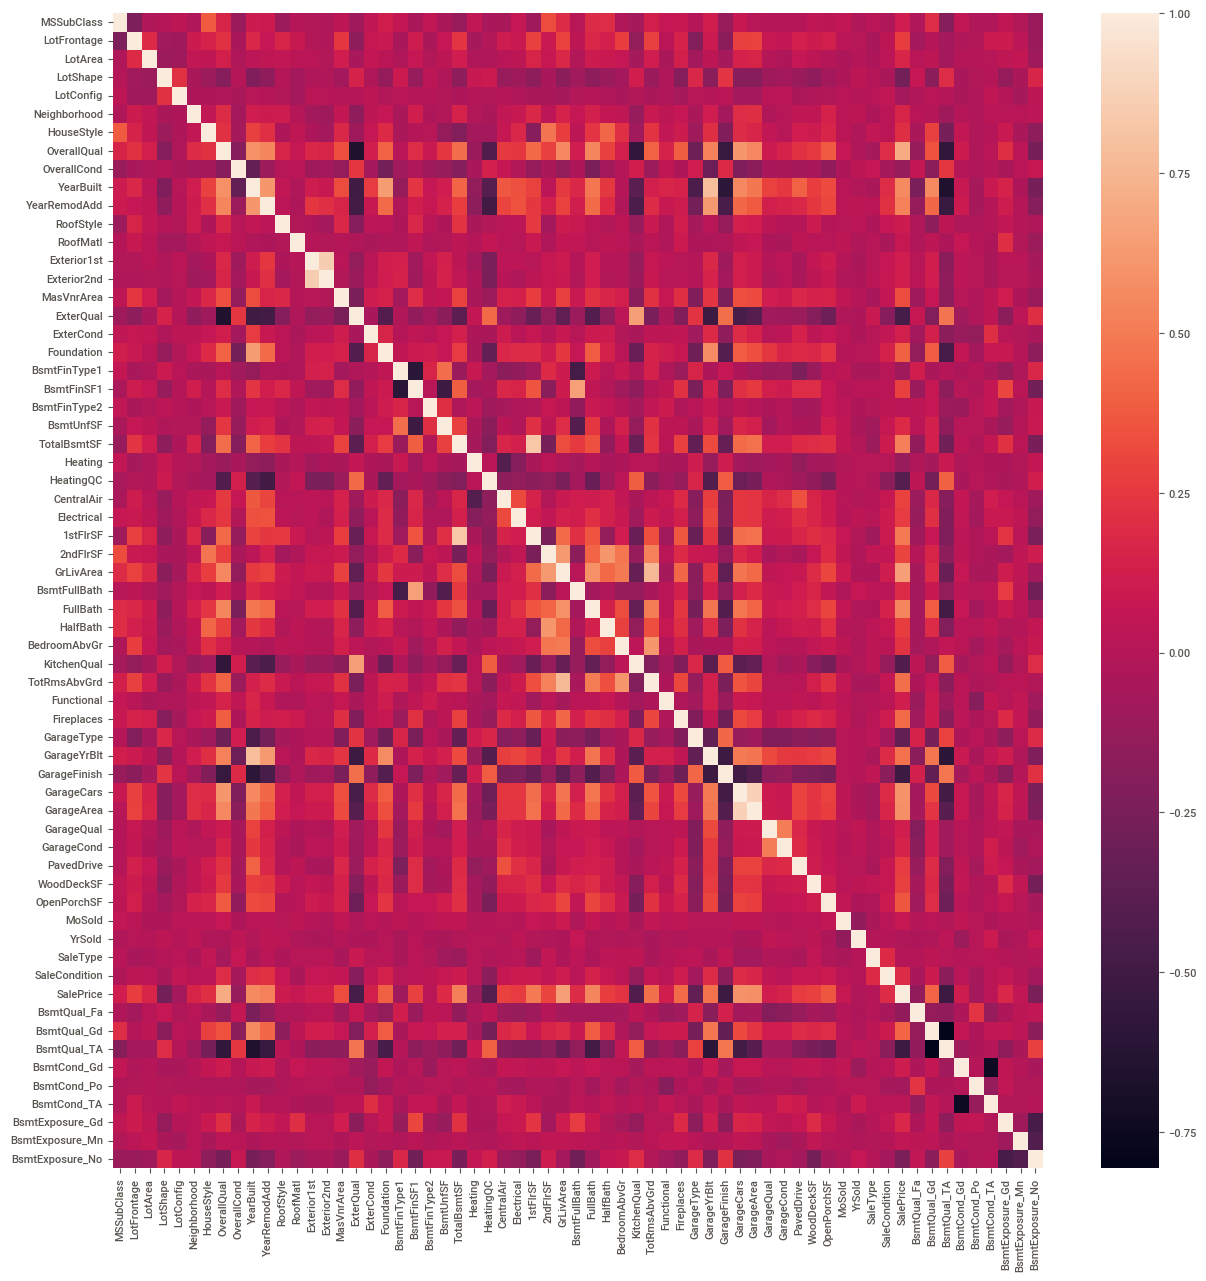

In [512]:
plt.figure(figsize=(15,15))
sns.heatmap(new_data.corr())

In [513]:
corr_matrix = new_data.corr()

In [514]:
columns1 = corr_matrix.sort_values("SalePrice",ascending=False).head(25).index

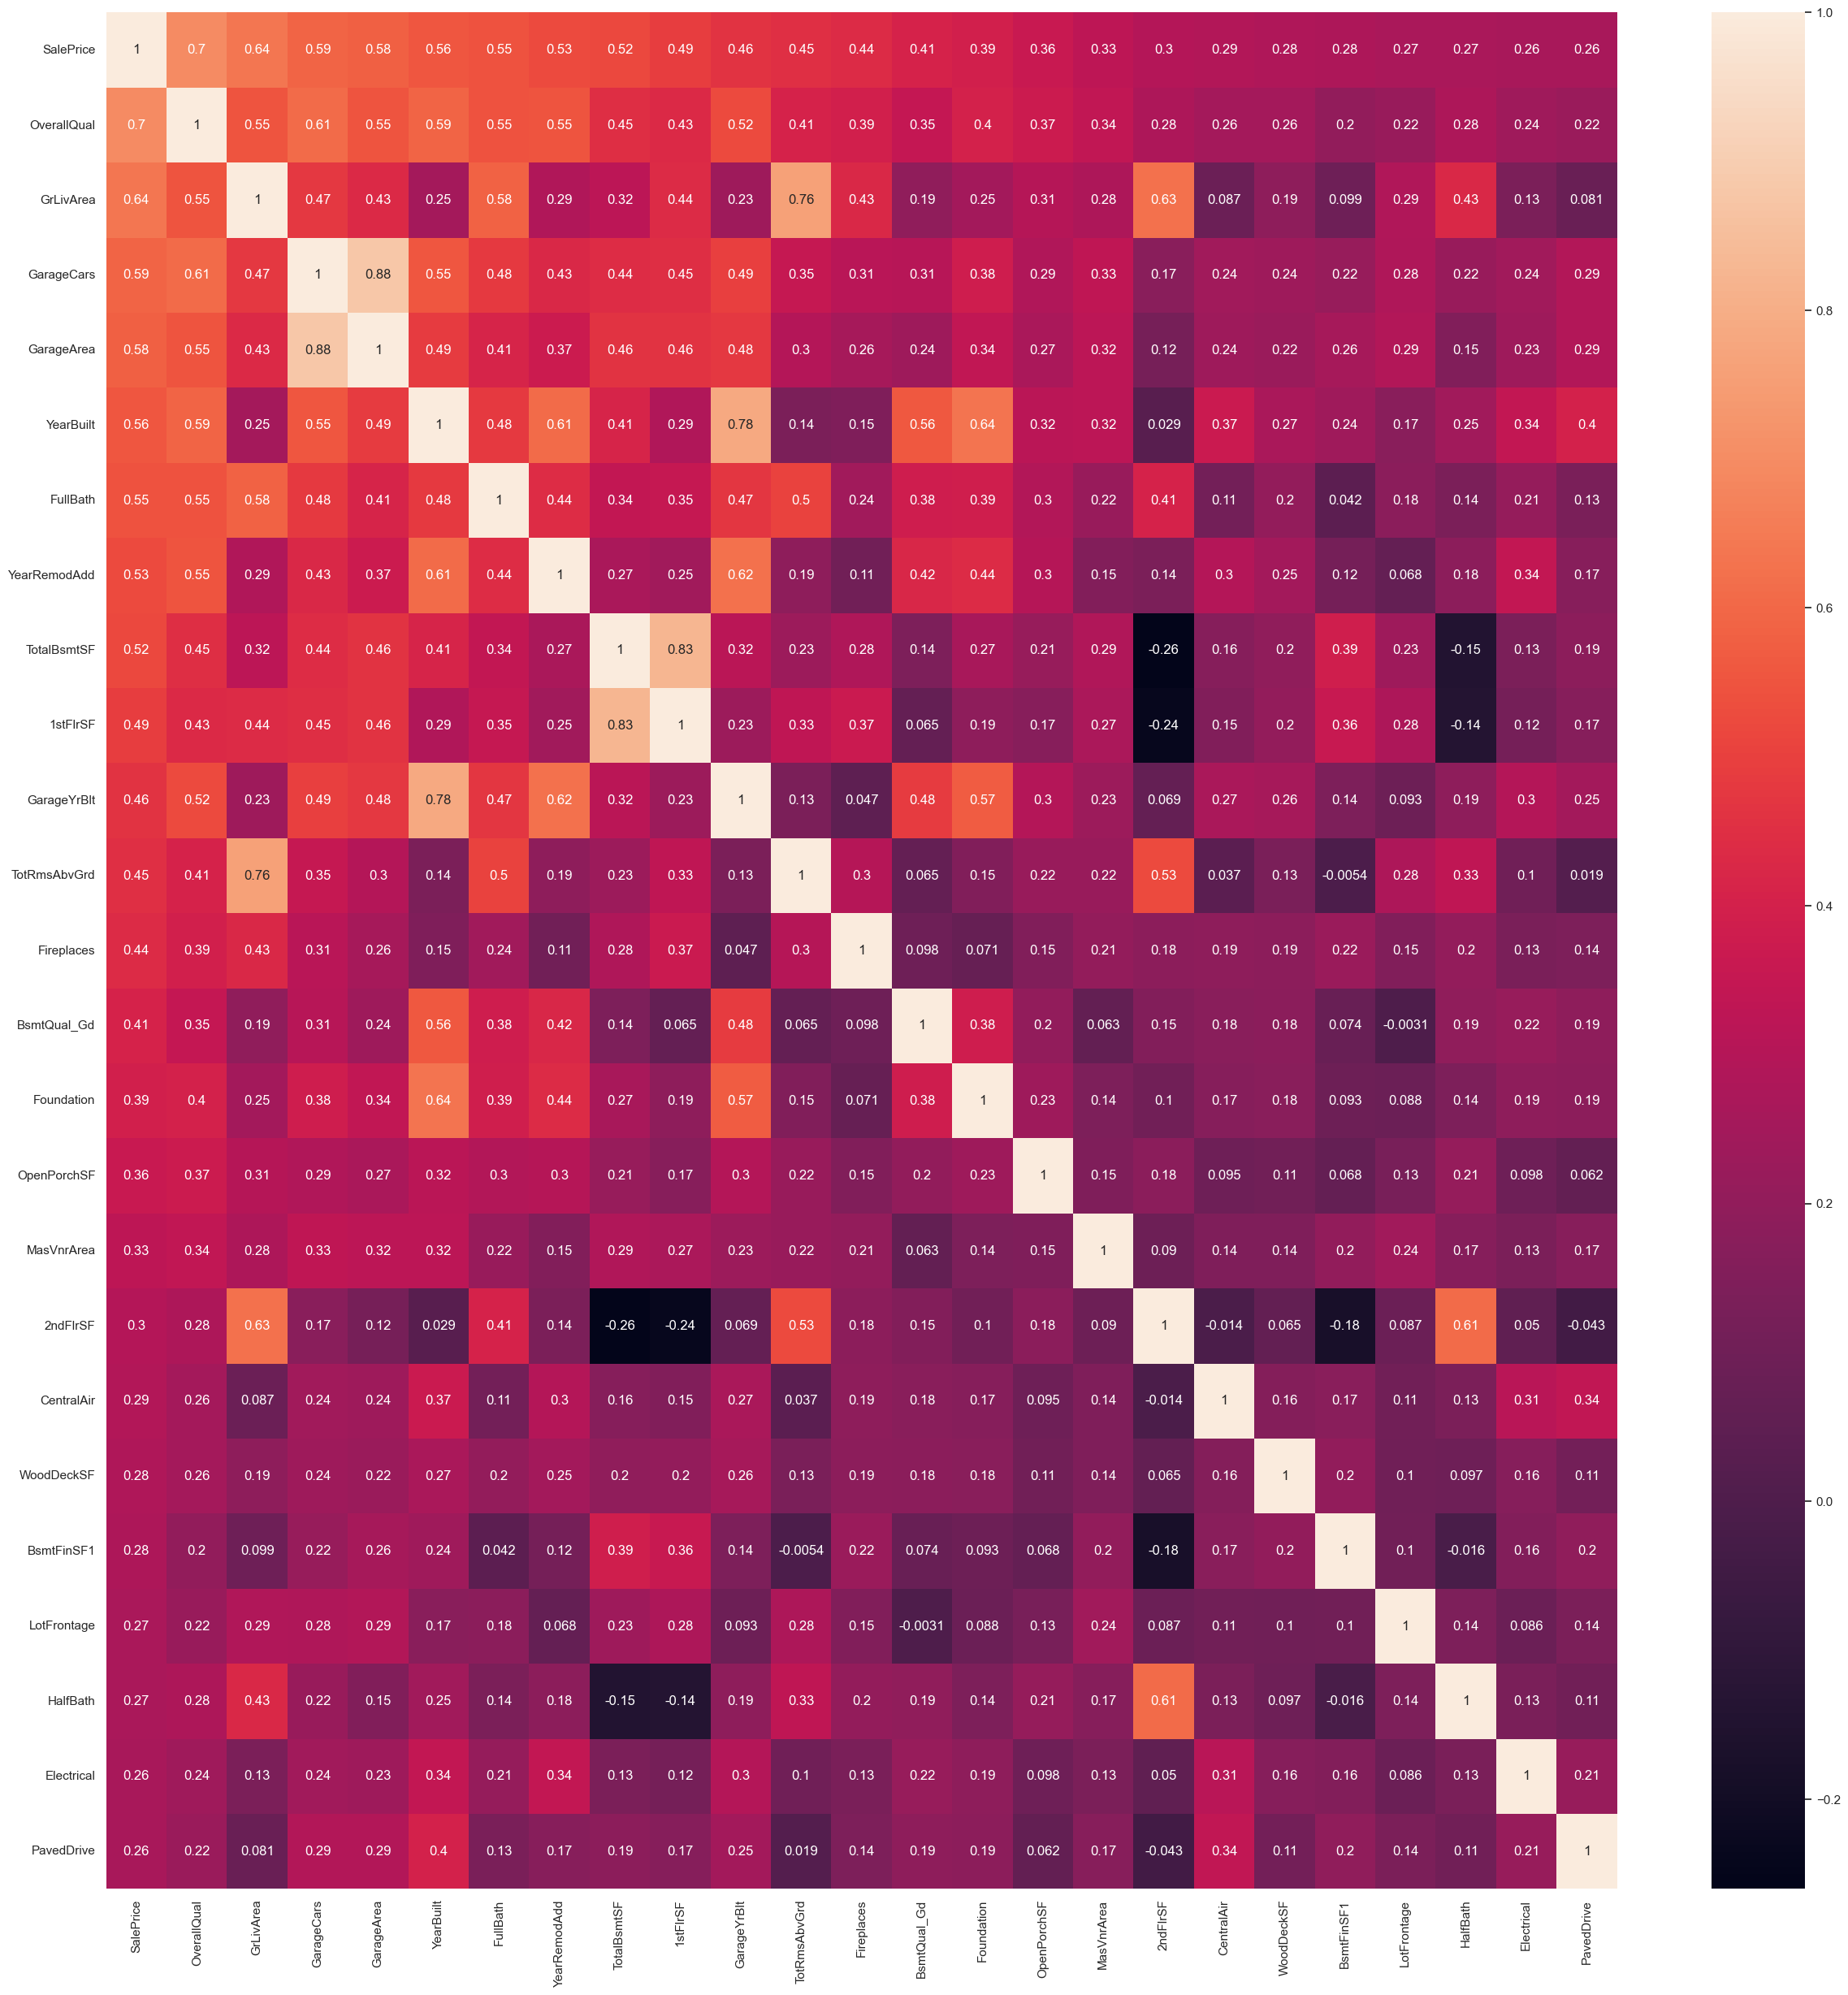

In [515]:
corr_matrix_20 = new_data[columns1].corr()
plt.figure(figsize=(30,30))
sns.set(font_scale=1)
sns.heatmap(corr_matrix_20,annot=True)
plt.show()

In [516]:
def correlation(dataset,threhold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threhold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    print(col_corr)

In [517]:
correlation(new_data,0.70)

{'1stFlrSF', 'GarageYrBlt', 'BsmtQual_TA', 'TotRmsAbvGrd', 'BsmtCond_TA', 'Exterior2nd', 'GarageArea'}


In [518]:
y6=['GarageArea', 'TotRmsAbvGrd', 'GarageYrBlt', '1stFlrSF', 'BsmtQual_TA', 'Exterior2nd']

In [519]:
new_data.drop(y6,axis=1,inplace=True)

In [520]:
## There is no relationship among the numerical data 

In [521]:
new_data.describe() ## no constant features
# Check SD.

MSSubClass   LotFrontage       LotArea     LotShape    LotConfig  \
count  1460.000000  1.460000e+03  1.460000e+03  1460.000000  1460.000000   
mean     48.383562  1.703356e-17 -8.431612e-16     1.942466     3.019178   
std      28.160234  1.000343e+00  1.000343e+00     1.409156     1.622634   
min      20.000000 -2.665167e+00 -2.524530e+00     0.000000     0.000000   
25%      20.000000 -6.437681e-01 -3.268513e-02     0.000000     2.000000   
50%      50.000000  5.967372e-03 -2.222601e-02     3.000000     4.000000   
75%      60.000000  4.391244e-01  4.967696e-03     3.000000     4.000000   
max     120.000000  2.749295e+00  2.740430e+00     3.000000     4.000000   

       Neighborhood   HouseStyle   OverallQual   OverallCond     YearBuilt  \
count   1460.000000  1460.000000  1.460000e+03  1.460000e+03  1.460000e+03   
mean      12.251370     3.038356  2.968706e-16  3.333711e-16  1.233716e-15   
std        6.013735     1.911305  1.000343e+00  1.000343e+00  1.000343e+00   
min        0.000000     0.000000 -2.998147e+00 -1.823571e+00 -2.940086e+00   
25%        7.000000     2.000000 -8.076742e-01 -5.342666e-01 -6.007981e-01   
50%       12.000000     2.000000 -7.751672e-02 -5.342666e-01  4.335369e-02   
75%       17.000000     5.000000  6.526407e-01  7.550379e-01  9.587273e-01   
max       24.000000     7.000000  2.843113e+00  2.044342e+00  1.297755e+00   

       YearRemodAdd    RoofStyle     RoofMatl  Exterior1st    MasVnrArea  \
count  1.460000e+03  1460.000000  1460.000000  1460.000000  1.460000e+03   
mean   4.499293e-15     1.410274     1.075342     9.624658 -1.168015e-16   
std    1.000343e+00     0.834998     0.599127     3.197659  1.000343e+00   
min   -1.689368e+00     0.000000     0.000000     0.000000 -6.740471e-01   
25%   -8.656586e-01     1.000000     1.000000     8.000000 -6.740471e-01   
50%    4.425864e-01     1.000000     1.000000    12.000000 -6.740471e-01   
75%    9.271216e-01     1.000000     1.000000    12.000000  3.558978e-01   
max    1.217843e+00     5.000000     7.000000    14.000000  3.309702e+00   

         ExterQual    ExterCond   Foundation  BsmtFinType1    BsmtFinSF1  \
count  1460.000000  1460.000000  1460.000000   1460.000000  1.460000e+03   
mean      2.539726     3.733562     1.396575      2.789726 -5.353404e-17   
std       0.693995     0.731807     0.722394      1.837550  1.000343e+00   
min       0.000000     0.000000     0.000000      0.000000 -1.024419e+00   
25%       2.000000     4.000000     1.000000      1.000000 -1.024419e+00   
50%       3.000000     4.000000     1.000000      2.000000 -1.183274e-01   
75%       3.000000     4.000000     2.000000      5.000000  6.364538e-01   
max       3.000000     4.000000     5.000000      5.000000  3.153179e+00   

       BsmtFinType2     BsmtUnfSF   TotalBsmtSF      Heating    HeatingQC  \
count   1460.000000  1.460000e+03  1.460000e+03  1460.000000  1460.000000   
mean       4.715753  4.136721e-17 -7.543433e-17     1.036301     1.538356   
std        0.925252  1.000343e+00  1.000343e+00     0.295124     1.739524   
min        0.000000 -1.345991e+00 -2.793788e+00     0.000000     0.000000   
25%        5.000000 -7.899233e-01 -7.070071e-01     1.000000     0.000000   
50%        5.000000 -1.571782e-01 -1.915486e-01     1.000000     0.000000   
75%        5.000000  5.971289e-01  6.093381e-01     1.000000     4.000000   
max        5.000000  2.843218e+00  2.903037e+00     5.000000     4.000000   

        CentralAir   Electrical      2ndFlrSF     GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000  1.460000e+03  1.460000e+03   1460.000000   
mean      0.934932     3.682192 -3.710882e-17 -1.204516e-16      0.423288   
std       0.246731     1.051301  1.000343e+00  1.000343e+00      0.514631   
min       0.000000     0.000000 -7.962441e-01 -2.567524e+00      0.000000   
25%       1.000000     4.000000 -7.962441e-01 -7.797781e-01      0.000000   
50%       1.000000     4.000000 -7.962441e-01 -2.804844e-02      0.000000   
75%       1.00000

# model creation

In [522]:
# split the data into x and y
x = new_data.drop(columns= 'SalePrice',axis=1)
y = new_data['SalePrice']

In [523]:
x.head()

MSSubClass  LotFrontage   LotArea  LotShape  LotConfig  Neighborhood  \
0          60    -0.282804 -1.346672         3          4             5   
1          20     0.800089  0.133695         3          2            24   
2          60    -0.066225  2.257701         0          4             5   
3          70    -0.643768  0.069332         0          0             6   
4          60     1.088860 -0.021743         0          2            15   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5     0.652641    -0.534267   1.060436      0.878668          1   
1           2    -0.077517    -0.534267   0.145062     -0.429577          1   
2           5     0.652641    -0.534267   0.992630      0.830215          1   
3           5     0.652641    -0.534267  -1.923005     -0.720298          1   
4           5     1.382798    -0.534267   0.958727      0.733308          1   

   RoofMatl  Exterior1st  MasVnrArea  ExterQual  ExterCond  Foundation  \
0         1           12    1.230379          2          4           2   
1         1            8   -0.674047          3          4           1   
2         1           12    0.900020          2          4           2   
3         1           13   -0.674047          3          4           0   
4         1           12    2.726714          2          4           2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  \
0             2    0.644729             5  -0.971954    -0.589607        1   
1             0    1.287800             5  -0.637815     0.602001        1   
2             2    0.124597             5  -0.263779    -0.401768        1   
3             0   -0.513745             5   0.000541    -0.883107        1   
4             2    0.524153             5  -0.124138     0.258606        1   

   HeatingQC  CentralAir  Electrical  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          0           1           4  1.178779   0.524793             1   
1          0           1           4 -0.796244  -0.482008             0   
2          0           1           4  1.206531   0.695590             1   
3          2           1           4  0.952137   0.540524             1   
4          0           1           4  1.639001   1.621487             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  Functional  Fireplaces  \
0         2         1           3.0            2           6           0   
1         2         0           3.0            3           6           1   
2         2         1           3.0            2           6           1   
3         1         0           3.0            2           6           1   
4         2         1           4.0            2           6           1   

   GarageType  GarageFinish  GarageCars  GarageQual  GarageCond  PavedDrive  \
0           1             1    0.325876           4           4           2   
1           1             1    0.325876           4           4           2   
2           1             1    0.325876           4           4           2   
3           5             2    1.685242           4           4           2   
4           1             1    1.685242           4           4           2   

   WoodDeckSF  OpenPorchSF  MoSold  YrSold  SaleType  SaleCondition  \
0   -0.800451     0.604457       2    2008         8              4   
1    2.016873    -0.811305       5    2007         8              4   
2   -0.800451     0.163482       9    2008         8              4   
3   -0.800451     0.001017       2    2006         8              0   
4    1.014738     1.138269      12    2008         8              4   

   BsmtQual_Fa  BsmtQual_Gd  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0            0            1            0            0            1   
1            0            1            0            0            1   
2            0            1            0            0            1   
3            0            0            1            0            0   
4  

In [524]:
y.head()

0    0.665182
1    0.199480
2    0.923906
3   -0.516322
4    1.380984
Name: SalePrice, dtype: float64

In [604]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state=1200,test_size=0.25)#test_size=0.25

# linear regression

In [605]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split


In [606]:
# implement the model
# initializatin
model = LinearRegression()

# train the model
model.fit(x_train,y_train)

LinearRegression()

In [607]:
# Define the grid of hyperparameters to search
param_grid = {
    'fit_intercept': [True, False],
}

In [608]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [609]:
#test the model / getting prediction
y_pred = model.predict(x_test)
y_pred

array([ 1.50274808e+00, -4.57980731e-01, -7.25843663e-01,  5.03723560e-01,
       -1.07234335e+00,  1.16725559e+00,  2.96542204e-01, -9.65258400e-01,
        4.90809773e-01, -1.31808541e+00, -1.22553712e+00,  4.56736586e-02,
       -5.97963950e-01,  1.04119068e+00, -1.00924936e+00,  1.14423735e+00,
       -1.18821411e-01, -1.12819920e+00, -1.27146793e+00, -7.78652643e-01,
        5.67741426e-01, -2.65250688e-01,  2.18363793e-01, -4.77663670e-02,
       -1.26795289e+00,  1.29933648e+00, -6.27120733e-01,  1.56399298e-01,
        2.26146040e-01,  6.74878511e-01,  4.55230881e-01, -1.41870450e-01,
       -7.21953826e-01, -3.69198075e-01, -8.11649222e-01,  1.59465642e+00,
        7.60131495e-01,  3.65664432e-01, -9.79964950e-01,  2.36116168e-01,
        9.38603479e-01,  5.50058044e-01, -1.13309953e+00, -1.40660785e-01,
        1.00580567e+00,  5.07589477e-01,  6.76538150e-01,  1.49145167e+00,
        3.47963031e-01,  7.39324288e-01, -1.68700567e-03,  8.71780578e-01,
       -6.50327475e-01,  

In [610]:
# Erros / loss functions 
# Error = Actual - predicted value
# MSE
# MAE 
# RMSE
# takes 2 parameters y_test, y_pred

In [611]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [612]:
mse = mean_squared_error(y_test,y_pred)
mse

0.32049604166486556

In [613]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.4002862241862219

In [614]:
rmse = np.sqrt(mse)
rmse

0.5661236982010783

In [615]:
r2_score_LR=r2_score(y_test,y_pred)
r2_score_LR


0.7041265411587663

In [616]:
## calculation of adjusted r2 score
adjusted_r2_LR = 1-((1-0.7001187675018625)*(44845-1)/(44845-7-1))
adjusted_r2_LR

0.7000719497257516

In [538]:
#Conclusion
# 70% is the r2 score
# this signifies, the over all perfomance of the model is good
# 70% of the records are predicted correctly
# 3% of data is predicted wrong

# SVM for regression

## model creation

In [539]:
new_data.head()

MSSubClass  LotFrontage   LotArea  LotShape  LotConfig  Neighborhood  \
0          60    -0.282804 -1.346672         3          4             5   
1          20     0.800089  0.133695         3          2            24   
2          60    -0.066225  2.257701         0          4             5   
3          70    -0.643768  0.069332         0          0             6   
4          60     1.088860 -0.021743         0          2            15   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5     0.652641    -0.534267   1.060436      0.878668          1   
1           2    -0.077517    -0.534267   0.145062     -0.429577          1   
2           5     0.652641    -0.534267   0.992630      0.830215          1   
3           5     0.652641    -0.534267  -1.923005     -0.720298          1   
4           5     1.382798    -0.534267   0.958727      0.733308          1   

   RoofMatl  Exterior1st  MasVnrArea  ExterQual  ExterCond  Foundation  \
0         1           12    1.230379          2          4           2   
1         1            8   -0.674047          3          4           1   
2         1           12    0.900020          2          4           2   
3         1           13   -0.674047          3          4           0   
4         1           12    2.726714          2          4           2   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtUnfSF  TotalBsmtSF  Heating  \
0             2    0.644729             5  -0.971954    -0.589607        1   
1             0    1.287800             5  -0.637815     0.602001        1   
2             2    0.124597             5  -0.263779    -0.401768        1   
3             0   -0.513745             5   0.000541    -0.883107        1   
4             2    0.524153             5  -0.124138     0.258606        1   

   HeatingQC  CentralAir  Electrical  2ndFlrSF  GrLivArea  BsmtFullBath  \
0          0           1           4  1.178779   0.524793             1   
1          0           1           4 -0.796244  -0.482008             0   
2          0           1           4  1.206531   0.695590             1   
3          2           1           4  0.952137   0.540524             1   
4          0           1           4  1.639001   1.621487             1   

   FullBath  HalfBath  BedroomAbvGr  KitchenQual  Functional  Fireplaces  \
0         2         1           3.0            2           6           0   
1         2         0           3.0            3           6           1   
2         2         1           3.0            2           6           1   
3         1         0           3.0            2           6           1   
4         2         1           4.0            2           6           1   

   GarageType  GarageFinish  GarageCars  GarageQual  GarageCond  PavedDrive  \
0           1             1    0.325876           4           4           2   
1           1             1    0.325876           4           4           2   
2           1             1    0.325876           4           4           2   
3           5             2    1.685242           4           4           2   
4           1             1    1.685242           4           4           2   

   WoodDeckSF  OpenPorchSF  MoSold  YrSold  SaleType  SaleCondition  \
0   -0.800451     0.604457       2    2008         8              4   
1    2.016873    -0.811305       5    2007         8              4   
2   -0.800451     0.163482       9    2008         8              4   
3   -0.800451     0.001017       2    2006         8              0   
4    1.014738     1.138269      12    2008         8              4   

   SalePrice  BsmtQual_Fa  BsmtQual_Gd  BsmtCond_Gd  BsmtCond_Po  BsmtCond_TA  \
0   0.665182            0            1            0            0            1   
1   0.199480            0            1            0            0            1   
2   0.923906            0            1            0            0            1   
3  -0.516322            0    

In [540]:
## defining X and y
# split the data into x and y
x = new_data.drop(columns= 'SalePrice',axis=1)
y = new_data['SalePrice']

In [541]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state=42)

In [542]:
y_train.value_counts()

SalePrice
-0.119612    49
-0.516322    14
-0.602563    13
-1.033769    12
 0.346090    12
             ..
 0.775571     1
 0.068393     1
-0.319692     1
 0.112980     1
 0.345228     1
Name: count, Length: 505, dtype: int64

In [543]:
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [544]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state=42)

In [545]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [546]:
# Initialize and train the Support Vector Regression model
svm_regressor = SVR(kernel='rbf', C=100, gamma='scale')
svm_regressor.fit(x_train_scaled, y_train)

SVR(C=100)

In [547]:
# Make predictions on the test set
y_pred = svm_regressor.predict(x_test_scaled)

In [548]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

0.3345620643693275

In [549]:
#test the model / getting prediction
y_pred = model.predict(x_test)
y_pred

array([-5.41929951e-01,  1.79428478e+00, -9.67811528e-01,  2.94362677e-01,
        9.64206307e-01, -1.13309953e+00,  8.47562291e-01, -5.94795960e-02,
       -1.18017783e+00, -7.19461652e-01, -3.54485068e-01, -9.04848377e-01,
       -1.56276610e+00,  6.29605310e-01,  1.83940215e-01, -4.97487176e-01,
        5.07589477e-01, -4.73672313e-01, -9.61662356e-01,  7.02908020e-01,
       -2.83141527e-01,  2.50510454e-01,  4.50429012e-02, -5.21466155e-01,
        4.82872876e-01, -8.88307884e-02,  3.41547941e-01, -1.26636126e+00,
        4.25345394e-01,  4.15298623e-01, -6.25224044e-01,  1.17279572e+00,
       -6.76967344e-02, -1.01660874e+00,  1.28771892e+00, -3.69198075e-01,
       -3.77021233e-01,  5.87960961e-01,  2.03265365e+00, -1.14347361e+00,
       -8.15606022e-01,  1.14423735e+00, -9.02575552e-01,  1.14315404e+00,
       -8.85621153e-01, -3.44522271e-01, -1.22553712e+00, -7.44946897e-01,
        1.61442650e+00, -6.25260246e-01, -9.00978996e-01,  4.33895099e-01,
       -6.20031343e-01,  

In [550]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [551]:
mse = mean_squared_error(y_test,y_pred)
mse

0.281956623884079

In [552]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.36903907541200215

In [553]:
rmse = np.sqrt(mse)
rmse

0.5309958793475511

In [554]:
r2_score_SVM=r2_score(y_test,y_pred)
r2_score_SVM

0.7245247059027871

In [555]:
adjusted_r2_SVR = 1-((1-0.7262949116493103)*(44845-1)/(44845-7-1))
adjusted_r2_SVR

0.7262521805205895

# KNN for regression

In [556]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression

In [557]:
# Initialize and train the KNN Regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(x_train, y_train)


KNeighborsRegressor()

In [558]:
# Make predictions on the test set
y_pred = knn_regressor.predict(x_test)

In [559]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

0.4933453829445842

In [560]:
#test the model / getting prediction
y_pred = model.predict(x_test)
y_pred

array([-5.41929951e-01,  1.79428478e+00, -9.67811528e-01,  2.94362677e-01,
        9.64206307e-01, -1.13309953e+00,  8.47562291e-01, -5.94795960e-02,
       -1.18017783e+00, -7.19461652e-01, -3.54485068e-01, -9.04848377e-01,
       -1.56276610e+00,  6.29605310e-01,  1.83940215e-01, -4.97487176e-01,
        5.07589477e-01, -4.73672313e-01, -9.61662356e-01,  7.02908020e-01,
       -2.83141527e-01,  2.50510454e-01,  4.50429012e-02, -5.21466155e-01,
        4.82872876e-01, -8.88307884e-02,  3.41547941e-01, -1.26636126e+00,
        4.25345394e-01,  4.15298623e-01, -6.25224044e-01,  1.17279572e+00,
       -6.76967344e-02, -1.01660874e+00,  1.28771892e+00, -3.69198075e-01,
       -3.77021233e-01,  5.87960961e-01,  2.03265365e+00, -1.14347361e+00,
       -8.15606022e-01,  1.14423735e+00, -9.02575552e-01,  1.14315404e+00,
       -8.85621153e-01, -3.44522271e-01, -1.22553712e+00, -7.44946897e-01,
        1.61442650e+00, -6.25260246e-01, -9.00978996e-01,  4.33895099e-01,
       -6.20031343e-01,  

In [561]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.36903907541200215

In [562]:
rmse = np.sqrt(mse)
rmse

0.7023854945431207

In [563]:
r2_score_KR=r2_score(y_test,y_pred)
r2_score_KR

0.7245247059027871

In [564]:
adjusted_r2_KN= 1-((1-0.7262949116493103)*(44845-1)/(44845-7-1))
adjusted_r2_KN

0.7262521805205895

# decision random tree for regression

In [565]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression

In [566]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y,random_state=42)

In [567]:
# Initialize and train the Decision Tree Regression model
tree_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [568]:
# Make predictions on the test set
y_pred = tree_regressor.predict(x_test)

In [569]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mse

0.3242577731986719

In [570]:
#test the model / getting prediction
y_pred = model.predict(x_test)
y_pred

array([-5.41929951e-01,  1.79428478e+00, -9.67811528e-01,  2.94362677e-01,
        9.64206307e-01, -1.13309953e+00,  8.47562291e-01, -5.94795960e-02,
       -1.18017783e+00, -7.19461652e-01, -3.54485068e-01, -9.04848377e-01,
       -1.56276610e+00,  6.29605310e-01,  1.83940215e-01, -4.97487176e-01,
        5.07589477e-01, -4.73672313e-01, -9.61662356e-01,  7.02908020e-01,
       -2.83141527e-01,  2.50510454e-01,  4.50429012e-02, -5.21466155e-01,
        4.82872876e-01, -8.88307884e-02,  3.41547941e-01, -1.26636126e+00,
        4.25345394e-01,  4.15298623e-01, -6.25224044e-01,  1.17279572e+00,
       -6.76967344e-02, -1.01660874e+00,  1.28771892e+00, -3.69198075e-01,
       -3.77021233e-01,  5.87960961e-01,  2.03265365e+00, -1.14347361e+00,
       -8.15606022e-01,  1.14423735e+00, -9.02575552e-01,  1.14315404e+00,
       -8.85621153e-01, -3.44522271e-01, -1.22553712e+00, -7.44946897e-01,
        1.61442650e+00, -6.25260246e-01, -9.00978996e-01,  4.33895099e-01,
       -6.20031343e-01,  

In [571]:
mae = mean_absolute_error(y_test,y_pred)
mae

0.36903907541200215

In [572]:
rmse = np.sqrt(mse)
rmse

0.5694363644856832

In [573]:
r2_score_DTR=r2_score(y_test,y_pred)
r2_score_DTR

0.7245247059027871

In [574]:
adjusted_r2_DTR= 1-((1-0.7262949116493103)*(44845-1)/(44845-7-1))
adjusted_r2_DTR

0.7262521805205895

# GRADIENT BOOSTING REGRESSION

In [575]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [576]:
y_gr=gr.predict(x_test)

In [577]:
r2_score_gb = r2_score(y_test,y_gr)
r2_score_gb

0.7589329214247335

In [578]:
## calculation of adjusted r2 score
gb_adjusted_r2 = 1-((1-r2_score_gb)*(44845-1)/(44845-7-1))
gb_adjusted_r2

0.7588952857767189

# RANDOM FOREST REGRESSION

In [579]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [580]:
y_rf = rf.predict(x_test)

In [581]:
r2_score_rf = r2_score(y_test,y_rf)
r2_score_rf

0.7607956567238456

In [582]:
## calculation of adjusted r2 score
rf_adjusted_r2 = 1-((1-r2_score_rf)*(44845-1)/(44845-7-1))
rf_adjusted_r2

0.7607583118880419

# XBG REGRESSION

In [583]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [584]:
y_pred_xgbr = xgbr.predict(x_test)

In [585]:
r2_score_xgbr = r2_score(y_test,y_pred_xgbr)
r2_score_xgbr

0.7356242192572383

In [586]:
## calculation of adjusted r2 score
xgbr_adjusted_r2 = 1-((1-r2_score_xgbr)*(44845-1)/(44845-7-1))
xgbr_adjusted_r2

0.7355829446299171

In [587]:
output={"Model":["LinearRegression","XBGRegression","DecisionTressRegression","RandomForestRegression","GradientBoostingRegression",'KNeighborsRegression','SVR'],
       "R2_Score":[r2_score_LR,r2_score_xgbr,r2_score_DTR,r2_score_rf,r2_score_gb,r2_score_KR,r2_score_SVM],
        "Adjusted_R2_Score":[adjusted_r2_LR,xgbr_adjusted_r2,adjusted_r2_DTR,rf_adjusted_r2,gb_adjusted_r2,adjusted_r2_KN,adjusted_r2_SVR]}

In [588]:
final_output= pd.DataFrame(output)

In [589]:
final_output.to_csv("final_output.csv")

In [590]:
final_output

Model  R2_Score  Adjusted_R2_Score
0            LinearRegression  0.704127           0.700072
1               XBGRegression  0.735624           0.735583
2     DecisionTressRegression  0.724525           0.726252
3      RandomForestRegression  0.760796           0.760758
4  GradientBoostingRegression  0.758933           0.758895
5        KNeighborsRegression  0.724525           0.726252
6                         SVR  0.724525           0.726252

# Predictive Modeling:
* Build a predictive model to estimate sale prices based on property characteristics.

* Evaluate the model's performance and identify factors that contribute most to accurate predictions.

* Use the model to forecast future sale prices or assess the potential impact of changes in property features.